# Solving the stochastic growth model with irreversible investment, using the bc-MC-PEA

This notebook solves an optimal growth model with irreversible investment.


## This version

* Log-Log model
* Treat the irreversible‐investment multiplier $\mu_t$​ as an additional state (residual) to be solved for.
* Gradient-descent approach, with ADAM
  
---
---

## I. Model: Optimal Growth Model with Irreversible Investment

The planner’s problem is to choose consumption $\{c_t\}$ and next period’s capital $\{k_{t+1}\}$ to maximize expected utility,

\begin{equation}
\max_{\{c_t,k_{t+1}\}_{t=0}^\infty} \; E_0 \sum_{t=0}^\infty \beta^t \frac{c_t^{1-\sigma}-1}{1-\sigma}
\end{equation}

subject to the resource constraint:
\begin{equation}
k_{t+1} = z_t k_t^\alpha - c_t + (1-\delta)k_t,
\end{equation}
constraint on investment:
\begin{equation}
k_{t+1} \geq (1-\delta)k_t,
\end{equation}
the law of motion for TFP:
\begin{equation}
\log(z_{t+1}) = \rho \log(z_t) + \varepsilon_{t+1},
\end{equation}

The associated FOCs are:
\begin{equation}
\begin{split}
c_t^{-\sigma} - \mu_t &= \beta E_t \left\{ c_{t+1}^{-\sigma} \left[\alpha z_{t+1} k_{t+1}^{\alpha-1} + 1-\delta \right] - \mu_{t+1} (1 - \ \delta)\right\}, \\
\end{split}
\end{equation}

\begin{equation}
\mu_t ( k_{t+1} - (1-\delta)k_t) = 0
\end{equation}

\begin{equation}
\mu_t \geq 0
\end{equation}


#### Expectation Function $E_t[\phi_{t+1}]$:
$$
\phi_{t+1} \equiv \beta  \Big( c_{t+1}^{-\sigma} \left[\alpha z_{t+1} k_{t+1}^{\alpha-1} + 1-\delta \right] - \mu_{t+1} (1 - \ \delta).
\Big)$$
As in the standard case, a parametric approximation is used. For example, one may posit the following log-log model:
\begin{equation}
\begin{split}
\log(E_t[\phi_{t+1}]) & = \theta_0 + \theta_1 \log k_t + \theta_2 \log z_t + \theta_3 \left(\log k_t\right)^2 + \theta_4 \left(\log z_t\right)^2 + \theta_5 \log k_t \cdot \log z_t \\
& = \boldsymbol{s}_t' \boldsymbol{\theta}
\end{split}
\end{equation}

#### Implied consumption

Under the assumption that the constraint does not bind:

\begin{equation}
\tilde{c}_t = \exp(\boldsymbol{s}_t' \boldsymbol{\theta})^{-1/\sigma}
\end{equation}

Consumption choice $\tilde{c}_t$ implies a savings choice: $\tilde{k}_{t+1} = z_t k_t^\alpha - \tilde{c}_t + (1-\delta)k_t$. Two cases can occur:

1. If $\tilde{k}_{t+1} \geq (1-\delta)k_t$, then the irreversible investment constraint does not bind:

\begin{equation}
\begin{split}
c_t & = \tilde{c}_t \\
k_{t+1} &= \tilde{k}_{t+1} \\
\mu_t & = 0
\end{split}
\end{equation}

2. If $\tilde{k}_{t+1} < (1-\delta)k_t$, then the irreversible investment constraint binds and we recover $c_t$ from the budget constraint:
\begin{equation}
\begin{split}
c_t & = z_t k_t^\alpha \\
k_{t+1} & = (1-\delta)k_t \\
\mu_t & > 0
\end{split}
\end{equation}

In case 2, the value of the lagrange multiplier is then:

\begin{equation}
\begin{split}
\mu_t & = c_t^{-\sigma} - \beta E_t \left\{ c_{t+1}^{-\sigma} \left[\alpha z_{t+1} k_{t+1}^{\alpha-1} + 1-\delta \right] - \mu_{t+1} (1 - \ \delta)\right\} \\
& \approx c_t^{-\sigma} - \exp(\boldsymbol{s}_t' \boldsymbol{\theta})
\end{split}
\end{equation}

provided that $\exp(\boldsymbol{s}_t' \boldsymbol{\theta})$ approximates correctly the conditional expectation.

### Accuracy

#### Euler equation error

unit-less Euler equation error (EEE):

\begin{equation}
\begin{split}
    EEE & = 1 - \frac{1}{c_t} \Big( \beta E_t \left\{ c_{t+1}^{-\sigma} \left[\alpha z_{t+1} k_{t+1}^{\alpha-1} + 1-\delta \right]  -\mu_{t+1} (1 - \ \delta) \right\} + \mu_t \Big)^{-1/\sigma}
\end{split}
\end{equation}

#### mean square integration error of the OLS forecast

mean square integration error (MSIE) is given by:

\begin{equation}
    E\Big[\big(\boldsymbol{s}_m' \boldsymbol{\theta^{*}} - \boldsymbol{s}_m' \boldsymbol{\theta^{(n)}}\big)^{2} \Big] = \frac{\sigma_{g,\varepsilon}^2 k}{N(M-k-1)}, \quad \text{for } M > k+1
\end{equation}

where, by assumption, the true value for the conditional expectation is given by $E_t[\phi_{t+1}] = \boldsymbol{s}_m' \boldsymbol{\theta^{*}}$.

In practice, $\boldsymbol{\theta^{*}}$ is unknow, and instead I calculate $E_t[\phi_{t+1}]$ very accurately, using a Gaussian quadrature for the integral with respect to the innovation variable.


---

## II. Computations


### Roadmap

<div style="background-color: #f0f0f0; padding: 10px;">    
    
#### Subsection 1


#### Subsection 2

</div>

### II. A. Load libraries, functions and types

In [1]:
on_Colab = True #True
import time, os

def is_chaospy_installed():
    try:
        import chaospy
        return True
    except ModuleNotFoundError:
        return False

# Usage
if is_chaospy_installed():
    print("chaospy is installed.")
else:
    print("chaospy is not installed.")

# Install deps on Colab
if (on_Colab == True) & (is_chaospy_installed() == False):
    print("Installing packages...")
    %shell pip install -v quantecon interpolation chaospy --user
    #Restart runtime
    print("Runtime is now restarting...")
    print("You can ignore the error message [Your session crashed for an unknown reason.]")
    time.sleep(0.5)
    os._exit(0)  # restart
    # torch torchcontrib torch-optimizer
else:
    print("Packages already installed")

chaospy is installed.
Packages already installed


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

import random
import scipy.stats
import chaospy  ## for quadrature
from itertools import product
import os
import re
import subprocess
import shutil

import time
import pandas as pd
import numpy as np
from math import sqrt
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import matplotlib.ticker as mticker

import seaborn as sns; sns.set()
from tqdm import tqdm as tqdm
import datetime
from typing import Tuple
class Vector: pass
from scipy.stats import norm

import torch
from torch import nn
from torch.utils.data import DataLoader, Subset, Dataset, TensorDataset
from torch.nn.utils import clip_grad_norm_

# To create copies of NN
import copy
import matplotlib.ticker as mtick
# To use sparse kronecker product
from scipy import sparse

import itertools
# Interpolations
from scipy.interpolate import LinearNDInterpolator
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from scipy.interpolate import RegularGridInterpolator

# Regressions
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan
lowess = sm.nonparametric.lowess

import quantecon as qe
from interpolation import interp
from quantecon.optimize import brentq
from numba import njit
#from numba.experimental import jitclass
#import copy # Not used so far

import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import MaxNLocator

import platform,socket,re,uuid,json,psutil,logging, cpuinfo, shutil

from scipy.stats import chi2

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


In [3]:
# Store parameters
class MyParams():
    """
    Store parameters and options.
    """
    def __init__(self, N, M, lr, optimizer, nb_epochs, order_gauss,
                 beta, alpha, gamma, delta, std_tfp, rho_tfp,
                 regression_two_steps, feasible_GLS, effective_sample_size,
                 gradient_descent_approach, lr_algorithm, use_scheduler,
                 nb_gd_steps_same_data,
                 center_dep_var, normalize_dep_var, multiplier_normalization, log_dep_var):
        # Model parameters
        self.beta = beta # Discount factor (patience)
        self.alpha = alpha # Capital share in production
        self.gamma = gamma # CRRA coefficient
        self.one_min_gamma = 1 - gamma #pre-compute
        # depreciation rate capital
        self.delta = delta
        # Standard deviation exo random variables
        self.std_tfp = std_tfp #0.01
        # Mean value exo random variables
        self.mean_tfp = 1.0
        # Persistence params
        self.rho_tfp = rho_tfp # Persistence log TFP values
        # Non stochastic steady state calculations
        self.kss = ((1 - self.beta * (1 - self.delta)) / (self.alpha * self.beta)) ** (1 / (self.alpha - 1))
        # take log of kss:
        self.log_kss = np.log(self.kss)
        self.std_k = 0 #std. dev capital
        self.css = self.kss**self.alpha - self.delta*self.kss
        self.std_c = 0 #std. dev consumption
        self.zss = 1
        self.std_z = 0
        self.tol_c = 1e-3 #to prevent negative consumption
        # Dependent variable in level or log
        self.formula = ""
        # Options for OLS regression
        self.center_dep_var = center_dep_var #True #False #Remove mean
        self.normalize_dep_var = normalize_dep_var #True #False #divide by multiplier_normalization * std. dev
        self.multiplier_normalization = multiplier_normalization #number of standard deviations when normalizing
        self.log_dep_var = log_dep_var #Dependent variable in log
        ## Store inverses, useful when working with normalized vars
        self.inv_den_k    = 0.0
        self.inv_den_logk = 0.0
        self.inv_den_a    = 0.0
        ## Convert the three previous options to an int
        ### Centered Dep var.
        if (self.center_dep_var == True):
            # Normalized dep. vars
            if (self.normalize_dep_var == True):
                if (self.log_dep_var == True):
                    # ( log(k) - log(mean_k) )/ 2 * stdev (log_mean_k)
                    self.type_x1_x2 = 0
                else:
                    # ( k - mean_k )/ 2 * stdev (mean_k)
                    self.type_x1_x2 = 1
            # Non normalized dep. vars
            else:
                if (self.log_dep_var == True):
                    # log(k) - log(mean_k)
                    self.type_x1_x2 = 2
                else:
                    # k - mean_k
                    self.type_x1_x2 = 3
        # Non centered dep. vars
        else:
            # Normalized dep. vars
            if (self.normalize_dep_var == True):
                if (self.log_dep_var == True):
                    # ( log(k) )/ 2 * stdev (log_mean_k)
                    self.type_x1_x2 = 4
                else:
                    # ( k )/ 2 * stdev (mean_k)
                    self.type_x1_x2 = 5
            # Non normalized dep. vars
            else:
                if (self.log_dep_var == True):
                    # log(k)
                    self.type_x1_x2 = 6
                else:
                    # k
                    self.type_x1_x2 = 7
        self.nb_expl_vars = 10   # including constant
        if self.nb_expl_vars not in (4, 6, 10):
            raise ValueError( f"nb_expl_vars must be one of (4, 6, 10); got {self.nb_expl_vars}"  )
        self.basis = 2          # 1: monomial, 2: Chebyshev
        if self.basis not in (1, 2):
            raise ValueError( f"basis must be either 1 (monomial) or 2 (Chebyshev); got {self.basis}" )
        self.regression_two_steps = regression_two_steps #Use the two-step regression described in appendix (approximation to full GLS)
        self.feasible_GLS = feasible_GLS #
        # NOT IMPLEMENTED HERE
        if (self.regression_two_steps == True):
            raise RuntimeError("regression_two_steps NOT available")
        if (self.feasible_GLS == True):
            raise RuntimeError("feasible_GLS NOT available")
        # Correction for serial correlation in dependent variables
        self.effective_sample_size = effective_sample_size
        self.gradient_descent_approach = gradient_descent_approach
        self.nb_shocks = 1
        ## State: Distribution of wealth + TFP (no persistence depreciation shocks)
        self.dim_state = 2
        ## Input for neural net
        self.dim_input = 2
        self.dim_output = 1
        # Nb agents:
        self.nb_agents = 1 #One representative household
        # Functions
        ## Utility
        if self.gamma != 1:
            self.u = lambda c: (1/self.one_min_gamma)*(c**(self.one_min_gamma) - 1)
        else:
            self.u = lambda c: torch.log(c)
        self.u_prime =  lambda c: c**(-self.gamma)
        self.u_prime_inv =  lambda c: c**(-(1/self.gamma))
        # bc-MC hyperparameters
        self.N = N #number of iid shocks used for each value of the state vector
        self.M = M #number of iid realization of the state vector
        self.MN = int(M*N)
        # To keep constant the number of function evaluations
        self.T = int((M*N)/2) #number
        self.distribution_shocks = "Normal" #"Normal" #Lognormal
        # Learning parameters
        self.lr = lr
        self.lr_algorithm = lr_algorithm #
        # "constant", "safe", "best_constant", or "best"
        list_lr_algorithm_valid = ["constant", "safe", "best_constant", "best"]
        if self.lr_algorithm not in list_lr_algorithm_valid:
            raise RuntimeError(f"lr_algorithm: {self.lr_algorithm} not available.")
        self.optimizer = optimizer #"Adam" #default: #Adam or SGD or SWA
        # Check choices
        list_valid = ["SGD", "Adam"]
        if self.optimizer not in list_valid:
            raise RuntimeError(f"Optimizer: {self.optimizer} not available.")
        self.use_scheduler = use_scheduler #If true, use a scheduler for the learning rate
        self.nb_epochs = nb_epochs
        self.nb_gd_steps_same_data = nb_gd_steps_same_data #number of gradient descent steps, holding constant the data
        # GAUSSIAN QUADRATURE
        ## INNOVATION VECTOR
        strr = "chaospy.Normal(0, self.std_tfp)"
        self.distrib = eval('chaospy.J({})'.format(strr))
        self.order_gauss = order_gauss
        nodes, weights = chaospy.generate_quadrature(self.order_gauss, self.distrib, rule = "gaussian", sparse=True) #dist(self.order_gauss, self.distrib, rule = "gaussian", sp=True)
        self.nodes = nodes
        self.nodes_flat =  self.nodes.flatten() #make 1d array
        self.weights = weights
        self.weights_torch = torch.tensor(weights)
        self.nodes_torch = torch.tensor(np.transpose(self.nodes)) #column=dim. Row=observation
        # Save the number of points for the guassian quadrature:
        self.N_gaussian = len(self.weights_torch)
        # Implied number of points for the current space (T=MN/2 <-> M = 2T/N)
        self.M_gaussian = int((2*self.T)/self.N_gaussian)
        self.MN_gaussian = self.N_gaussian*self.M_gaussian
        # Repeat nodes to match the number of function evaluations for the expectation
        self.nodes_torch_repeated = self.nodes_torch.repeat(self.M_gaussian, 1)


def show_params(params, limited=True):
    """
    Function to display parameter values
    """
    print("learning rate: {}".format(params.lr))
    print("lr_algorithm: {}".format(params.lr_algorithm))
    print("optimizer_chosen: {}".format(params.optimizer))
    print("use_scheduler: {}".format(params.use_scheduler))

    print("M: {}".format(params.M))
    print("N: {}".format(params.N))
    print("MN: {}".format(params.MN))
    print("T: {}".format(params.T))

    print("center_dep_var: {}".format(params.center_dep_var)) # Data centered?
    print("normalize_dep_var: {}".format(params.normalize_dep_var)) # Data normalized ? (divided by stdev)
    print("log_dep_var: {}".format(params.log_dep_var)) # Data normalized ? (divided by stdev)
    print("type_x1_x2: {}".format(params.type_x1_x2))

    print("nb_expl_vars: {}".format(params.nb_expl_vars))
    print("basis: {}".format(params.basis))
    print("regression_two_steps: {}".format(params.regression_two_steps))
    print("feasible_GLS: {}".format(params.feasible_GLS))
    print("effective_sample_size: {}".format(params.effective_sample_size))
    print("gradient_descent_approach: {}".format(params.gradient_descent_approach))
    print("nb_gd_steps_same_data: {}".format(params.nb_gd_steps_same_data))



In [4]:
info_cpu = cpuinfo.get_cpu_info()
for (name) in info_cpu:
  print(f"{name}: ", info_cpu[name])

same_machine = True #ensure same machine
machine_desired = "Intel(R) Xeon(R) CPU @ 2.20GHz"
machine_desired = "AMD EPYC 7B12"

print(f"Machine is: {info_cpu['brand_raw']}")

if (on_Colab == True) and (same_machine == True):
    if info_cpu['brand_raw'] != machine_desired:
      print(f"However, you selected: {machine_desired}. RESTARTING VM")
      print("You can ignore the error message [Your session crashed for an unknown reason.]")
      time.sleep(0.5)
      os._exit(0)  # restart
    else:
      print(f"Found desired machine: {machine_desired}")

python_version:  3.11.13.final.0 (64 bit)
cpuinfo_version:  [9, 0, 0]
cpuinfo_version_string:  9.0.0
arch:  X86_64
bits:  64
count:  8
arch_string_raw:  x86_64
vendor_id_raw:  AuthenticAMD
brand_raw:  AMD EPYC 7B12
hz_advertised_friendly:  2.2500 GHz
hz_actual_friendly:  2.2500 GHz
hz_advertised:  [2249998000, 0]
hz_actual:  [2249998000, 0]
model:  49
family:  23
flags:  ['3dnowext', '3dnowprefetch', 'abm', 'adx', 'aes', 'apic', 'arat', 'avx', 'avx2', 'bmi1', 'bmi2', 'clflush', 'clflushopt', 'clwb', 'clzero', 'cmov', 'cmp_legacy', 'constant_tsc', 'cpuid', 'cr8_legacy', 'cx16', 'cx8', 'de', 'extd_apicid', 'f16c', 'fma', 'fpu', 'fsgsbase', 'fxsr', 'fxsr_opt', 'ht', 'hypervisor', 'ibpb', 'ibrs', 'lahf_lm', 'lm', 'mca', 'mce', 'misalignsse', 'mmx', 'mmxext', 'movbe', 'msr', 'mtrr', 'nonstop_tsc', 'nopl', 'npt', 'nrip_save', 'nx', 'osvw', 'osxsave', 'pae', 'pat', 'pclmulqdq', 'pdpe1gb', 'pge', 'pni', 'popcnt', 'pse', 'pse36', 'rdpid', 'rdrand', 'rdrnd', 'rdseed', 'rdtscp', 'rep_good', 'sep'

In [5]:
current_wd = os.getcwd()
print(current_wd)
output_extension = "irreversible_investment_SGD_Colab_4"
output_folder = output_extension + "/"
print(output_folder)

# Create folder if does not exist:
if not os.path.exists(output_folder):
    # If it doesn't exist, create it
    os.makedirs(output_folder)

# Create folder to save models
output_folder_models = output_folder + '/models/'
if not os.path.exists(output_folder_models):
    # If it doesn't exist, create it
    os.makedirs(output_folder_models)

if on_Colab == True:
    # Mount gdrive
    from google.colab import drive
    drive.mount('/gdrive')
    # For final save
    g_drive_path = '/gdrive/My Drive/bc_MC_PEA/7.irreversible_investment_SGD/'
    # Small test
    with open(g_drive_path + 'fooHello.txt', 'w') as f:
        f.write('Hello Google Drive!')

    # Autosave every 60 seconds
    %autosave 60


# If on Colab, install Octave and Matlab
if on_Colab == True:
    # Step 1: Install Octave
    !apt-get install -y octave
    !octave --version

    # Step 2: Install Dynare (this might take a bit of time)
    !apt-get install -y dynare



/content
irreversible_investment_SGD_Colab_4/
Mounted at /gdrive


Autosaving every 60 seconds
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  aglfn default-jre-headless epstool fonts-droid-fallback fonts-freefont-otf
  fonts-noto-mono fonts-urw-base35 ghostscript gnuplot-data gnuplot-qt gsfonts
  imagemagick-6-common info install-info libamd2 libauthen-sasl-perl libbtf1
  libcamd2 libccolamd2 libcholmod3 libclone-perl libcolamd2 libcombblas1.16.0
  libcxsparse3 libdata-dump-perl libemf1 libencode-locale-perl libevdev2
  libfftw3-double3 libfftw3-long3 libfftw3-mpi3 libfftw3-single3
  libfile-listing-perl libfltk-gl1.3 libfltk1.3 libfont-afm-perl libglpk40
  libglu1-mesa libgraphicsmagick++-q16-12 libgraphicsmagick-q16-3 libgs9
  libgs9-common libgudev-1.0-0 libhdf5-openmpi-103-1 libhtml-form-perl
  libhtml-format-perl libhtml-parser-perl libhtml-tagset-perl
  libhtml-tree-perl libhttp-cookies-perl libhttp-daemon-perl libhttp-date-perl
  libhttp-mes

In [6]:
# Load functions
plot_scale = 0.75
plt.rcParams["figure.figsize"] = (plot_scale*16, plot_scale*9)
# Controlling fontsizes
SMALL_SIZE = 12
MEDIUM_SIZE = SMALL_SIZE + 2
BIGGER_SIZE =  SMALL_SIZE + 4
plt.rcParams['legend.fontsize'] = MEDIUM_SIZE
dpi_chosen=600 #control the quality of .png
linewidth_chosen = 2

In [7]:
M_chosen = 200 #200 #200 #100 #Nb draws state vector
N_chosen = 2 #Nb draws innovation vector for each realization of the state vector
lr_chosen = 1e-2 #1e-4 #4 #1e-4 #3 #5 #1e-3 #default: 1e-4 #3 #Learning rate
nb_epochs_chosen = 50 #Number of gradient descent steps
order_gauss_chosen = 5 #number of Gaussian nodes for integration wrt to innovation vector
optimizer_chosen = "Adam" #SGD" #"Adam" #"NAdam" # default: "Adam"
lr_algorithm = "constant" #"best" #Can be "constant", "safe", "best_constant", or "best"
use_scheduler_chosen = False

# Parametrization RBC
beta_chosen = 0.96 #0.95 #discount factor
alpha_chosen = 0.36 #production params
std_tfp_chosen = 0.014 #25 #025 #125 #0.125 #0.01 #0.125 #std tfp. High value for constraint to bind
gamma_chosen = 1.0 #CRRA parameter
rho_chosen = 0.92 #persistence TFP
delta_chosen = 0.1 #0.1 #depreciation rate

# Parametrization Collard, irreversible
beta_chosen = 0.95 #0.95 #discount factor
alpha_chosen = 0.3 #production params
std_tfp_chosen = 0.14 #25 #025 #125 #0.125 #0.01 #0.125 #std tfp. High value for constraint to bind
gamma_chosen = 1.0 #CRRA parameter
rho_chosen = 0.8 #persistence TFP
delta_chosen = 0.1 #0.1 #0.1 #depreciation rate

# Options
regression_two_steps_chosen = False
feasible_GLS_chosen = False
effective_sample_size_chosen = True #Use the (1 + rho**2)/ (1 - rho**2) correction term
gradient_descent_approach_chosen = False #OLS if False, Gradient-based if True
nb_gd_steps_same_data_chosen = 10 #number of gradient descent steps, using same data

## Options on dependent vars
center_dep_var_chosen = True
normalize_dep_var_chosen = True
multiplier_normalization_chosen = 2
log_dep_var_chosen = True

params = MyParams(N_chosen, M_chosen, lr_chosen, optimizer_chosen,
                  nb_epochs_chosen, order_gauss_chosen,
                  beta_chosen, alpha_chosen, gamma_chosen, delta_chosen,
                  std_tfp_chosen, rho_chosen,
                  regression_two_steps_chosen,
                  feasible_GLS_chosen, effective_sample_size_chosen,
                  gradient_descent_approach_chosen,
                  lr_algorithm, use_scheduler_chosen,
                  nb_gd_steps_same_data_chosen,
                 center_dep_var_chosen, normalize_dep_var_chosen, multiplier_normalization_chosen, log_dep_var_chosen)

show_params(params)

learning rate: 0.01
lr_algorithm: constant
optimizer_chosen: Adam
use_scheduler: False
M: 200
N: 2
MN: 400
T: 200
center_dep_var: True
normalize_dep_var: True
log_dep_var: True
type_x1_x2: 0
nb_expl_vars: 10
basis: 2
regression_two_steps: False
feasible_GLS: False
effective_sample_size: True
gradient_descent_approach: False
nb_gd_steps_same_data: 10


### II.B. Model WITHOUT constraint

Solve model without constraint, to have a starting point. The FOC is:

The associated FOCs are:
\begin{equation}
\begin{split}
c_t^{-\sigma} & = \beta E_t \left\{ c_{t+1}^{-\sigma} \left[\alpha z_{t+1} k_{t+1}^{\alpha-1} + 1-\delta \right] \right\}, \\
\end{split}
\end{equation}

#### II.B.1. 1st order solution using Dynare. Ignore constraint.

In [8]:
fname = "neogrowth.mod"
dirpath = os.getcwd()  # Get the current working directory
fpath = os.path.join(dirpath, fname)

if on_Colab == True:
  dirpath = output_folder  # Get the current working directory
  fpath = os.path.join(dirpath, fname)
  with open(output_folder + 'fooColab.txt', 'w') as f:
    f.write('Hello Google Drive!')

file_content_1 = """
% optimal_growth.mod
% Dynare file for the standard optimal growth model (first-order approximation)

var k c z;
varexo eps;

parameters beta gamma alpha delta rho sigma_eps;

% Parameter values
beta      = {beta};
gamma     = {gamma};      % CRRA coefficient
alpha     = {alpha};
delta     = {delta};
rho       = {rho_tfp};
sigma_eps = {std_tfp};

model;
% Euler equation (after substituting the marginal utility condition)
c^(-gamma) = beta * c(+1)^(-gamma) * ( alpha * z(+1) * k^(alpha-1) + 1 - delta );

% Resource constraint (law of motion for capital)
k = z * k(-1)^alpha - c + (1-delta)*k(-1);

% Technology process (AR(1) in logs)
log(z) = rho*log(z(-1)) + eps;

end;

initval;
% Initial guesses for the steady state
k   = ((alpha*beta)/(1 - beta*(1-delta)))^(1/(1-alpha));
c   = ((alpha*beta)/(1 - beta*(1-delta)))^(alpha/(1-alpha)) - delta*(((alpha*beta)/(1 - beta*(1-delta)))^(alpha/(1-alpha)));
z   = 1;
eps = 0;
end;

steady;
check;

shocks;
var eps = sigma_eps^2;
end;

% IRF
stoch_simul(order=1, irf=100);

% SIMULATED SERIES
stoch_simul(periods=50000);
""".format(beta = params.beta, alpha = params.alpha,  gamma = params.gamma,
           delta = params.delta, std_tfp = params.std_tfp, rho_tfp = params.rho_tfp)

file_content = file_content_1
# Concat stings
# Write the content to the file
with open(fpath, "w") as file:
    file.write(file_content)

root_path = ""
if on_Colab == False:
    # Run the shell script locally.
    print("Calculating linearized model using Dynare")
    result = subprocess.run(['./solve_neogrowth.sh'], capture_output=True, text=True)
    # Print the output of the script
    print(result.stdout)
    print(result.stderr)
# Desgined to run on Google Colab
else:
    print("Calculating linearized model using Octave Dynare")
    root_path = output_folder

    # Now modify the .m file to include cd at top (before running)
    with open(g_drive_path + 'solve_neogrowth_octave.m', 'r') as file:
        lines = file.readlines()

    # Insert cd command at top (right after patches if any)
    lines.insert(0, f"cd '{output_folder}';\n")

    with open('solve_neogrowth_octave_2.m', 'w') as file:
        file.writelines(lines)

    # Now run it
    !octave solve_neogrowth_octave_2.m


Calculating linearized model using Octave Dynare
octave: X11 DISPLAY environment variable not set
octave: disabling GUI features
If you are under Debian or Ubuntu, you can install it through your package manager, with 'apt install x13as'.
If you are under Windows or macOS, this probably means that you did not install the dseries toolbox through an official package.
Starting Dynare (version 5.0).
Calling Dynare with arguments: noclearall
Starting preprocessing of the model file ...
Found 3 equation(s).
Evaluating expressions...done
Computing static model derivatives (order 1).
Computing dynamic model derivatives (order 2).
Processing outputs ...
done
Preprocessing completed.


STEADY-STATE RESULTS:

k 		 2.62575
c 		 1.07333
z 		 1

EIGENVALUES:
         Modulus             Real        Imaginary

             0.8              0.8                0
           0.838            0.838                0
           1.256            1.256                0
       2.819e+17       -2.819e+17       

In [9]:
# Function to ceate x1
@njit
def create_x1_jit(
    k: float,
    mode: int,              # 0..7
    mean_k: float,
    std_k: float,
    mean_log_k: float,
    std_log_k: float,
    m: float
):
    """
    Return x1 according to integer mode (a is zero-mean):

      0: (log k - mean_log_k)/(m*std_log_k),
      1: (k - mean_k)/(m*std_k),
      2: (log k - mean_log_k),
      3: (k - mean_k),
      4: (log k)/(m*std_log_k),
      5: (k)/(m*std_k),
      6: log k,
      7: k,
    """
    logk = np.log(k)

    if mode == 0:
        den_logk = m * std_log_k
        x1 = (logk - mean_log_k) / den_logk
    elif mode == 1:
        den_k    = m * std_k
        x1 = (k - mean_k) / den_k
    elif mode == 2:
        x1 = (logk - mean_log_k)
    elif mode == 3:
        x1 = (k - mean_k)
    elif mode == 4:
        den_logk = m * std_log_k
        x1 = logk / den_logk
    elif mode == 5:
        den_k    = m * std_k
        x1 = k / den_k
    elif mode == 6:
        x1 = logk
    elif mode == 7:
        x1 = k
    else:
        # fallback: treat as log/raw
        x1 = logk

    return x1

@njit
def create_x2_jit(
    a: float,
    mode: int,              # 0..7
    std_a: float,
    m: float
):
    """
    Return x2 according to integer mode (a is zero-mean):

      0:  a/(m*std_a)
      1:  a/(m*std_a)
      2:  a
      3:  a
      4:  a/(m*std_a)
      5:  a/(m*std_a)
      6:  a
      7:  a
    """
    # denominators:
    if mode == 0:
        den_a    = m * std_a
        x2 = a / den_a
    elif mode == 1:
        den_a    = m * std_a
        x2 = a / den_a
    elif mode == 2:
        x2 = a
    elif mode == 3:
        x2 = a
    elif mode == 4:
        den_a    = m * std_a
        x2 = a / den_a
    elif mode == 5:
        den_a    = m * std_a
        x2 = a / den_a
    elif mode == 6:
        x2 = a
    elif mode == 7:
        x2 = a
    else:
        # fallback: treat as log/raw
        x2 = a

    return x2

# Function to ceate x1 and x2, used in the regression
@njit
def create_x1_x2_jit(
    k: float,
    a: float,
    mode: int,              # 0..7
    mean_k: float,
    std_k: float,
    mean_log_k: float,
    std_log_k: float,
    std_a: float,
    m: float
):
    """
    Return (x1, x2) according to integer mode (a is zero-mean):

      0: (log k - mean_log_k)/(m*std_log_k),   a/(m*std_a)
      1: (k - mean_k)/(m*std_k),               a/(m*std_a)
      2: (log k - mean_log_k),                 a
      3: (k - mean_k),                         a
      4: (log k)/(m*std_log_k),                a/(m*std_a)
      5: (k)/(m*std_k),                        a/(m*std_a)
      6: log k,                                a
      7: k,                                    a
    """
    x1 = create_x1_jit(k, mode, mean_k, std_k, mean_log_k, std_log_k, m)
    x2 = create_x2_jit(a, mode, std_a, m)

    return x1, x2



@njit
def create_x1_x2_batch(
    k_arr: np.ndarray,
    a_arr: np.ndarray,
    mode: int,
    mean_k: float,
    std_k: float,
    mean_log_k: float,
    std_log_k: float,
    std_a: float,
    m: float):
    """
    Vectorized wrapper for create_x1_x2_jit over arrays k_arr, a_arr.

    Parameters
    ----------
    k_arr, a_arr : float64[:]
        State arrays (must be 1-D, float64, contiguous).
    mode : int
        Transform code in {0..7}.
    mean_k, std_k, mean_log_k, std_log_k, std_a, m : float
        Statistics and normalization multiplier.

    Returns
    -------
    (x1, x2) : tuple of float64[:]
        Transformed features.
    """
    n = k_arr.shape[0]
    x1 = np.empty(n, dtype=np.float64)
    x2 = np.empty(n, dtype=np.float64)
    for i in range(n):
        xi1, xi2 = create_x1_x2_jit(
            k_arr[i], a_arr[i], mode,
            mean_k, std_k, mean_log_k, std_log_k, std_a, m
        )
        x1[i] = xi1
        x2[i] = xi2
    return x1, x2


# Faster versions, where 1/ (m * stdev is) is pre-calculated
#-----------------------------------------------------------
# ---- x1 only (uses precomputed inverses) -------------------------------
@njit
def create_x1_fast_jit(
    k: float,
    mode: int,                 # 0..7
    mean_k: float,
    inv_den_k: float,          # 1/(m*std_k)
    mean_log_k: float,
    inv_den_logk: float        # 1/(m*std_log_k)
) -> float:
    """
    x1 modes:
      0: (log k - mean_log_k) * inv_den_logk
      1: (k - mean_k) * inv_den_k
      2: (log k - mean_log_k)
      3: (k - mean_k)
      4:  log k * inv_den_logk
      5:  k * inv_den_k
      6:  log k
      7:  k
    Assumes k>0 and inverses > 0 (validate once upstream).
    """
    if   mode == 0: return (np.log(k) - mean_log_k) * inv_den_logk
    elif mode == 1: return (k - mean_k) * inv_den_k
    elif mode == 2: return  np.log(k) - mean_log_k
    elif mode == 3: return  k - mean_k
    elif mode == 4: return  np.log(k) * inv_den_logk
    elif mode == 5: return  k * inv_den_k
    elif mode == 6: return  np.log(k)
    elif mode == 7: return  k
    else:           return  np.log(k)   # fallback

# ---- x2 only (a is zero-mean) -----------------------------------------
@njit
def create_x2_fast_jit(
    a: float,
    mode: int,                 # 0..7
    inv_den_a: float           # 1/(m*std_a)
) -> float:
    """
    x2 modes (a is zero-mean):
      normalized: 0,1,4,5 → a * inv_den_a
      raw       : 2,3,6,7 → a
    """
    if mode == 0 or mode == 1 or mode == 4 or mode == 5:
        return a * inv_den_a
    return a


@njit
def create_x1_x2_fast_jit(
    k: float,
    a: float,
    mode: int,                 # 0..7
    mean_k: float,
    inv_den_k: float,
    mean_log_k: float,
    inv_den_logk: float,
    inv_den_a: float
):
    """
    Returns (x1, x2) using the fast variants above.
    """
    x1 = create_x1_fast_jit(k, mode, mean_k, inv_den_k, mean_log_k, inv_den_logk)
    x2 = create_x2_fast_jit(a, mode, inv_den_a)
    return x1, x2

@njit
def create_x1_x2_batch_fast(
    k_arr: np.ndarray,
    a_arr: np.ndarray,
    mode: int,
    mean_k: float,
    inv_den_k: float,       # 1/(m*std_k)
    mean_log_k: float,
    inv_den_logk: float,    # 1/(m*std_log_k)
    inv_den_a: float        # 1/(m*std_a)
):
    n = k_arr.shape[0]
    x1 = np.empty(n, dtype=np.float64)
    x2 = np.empty(n, dtype=np.float64)
    for i in range(n):
        xi1, xi2 = create_x1_x2_fast_jit(
            k_arr[i], a_arr[i], mode,
            mean_k, inv_den_k,
            mean_log_k, inv_den_logk,
            inv_den_a
        )
        x1[i] = xi1
        x2[i] = xi2
    return x1, x2

  Variable  MeanValue
0        k    2.80368
1        c    1.11063
2        z    1.01919
             k         c         z
0      2.49443  0.995207  0.843225
1      2.49373  1.029550  0.971857
2      2.45133  1.005590  0.921800
3      2.48612  1.036100  1.005670
4      2.58609  1.082710  1.089010
...        ...       ...       ...
49995  2.63105  1.044140  0.895067
49996  2.56844  1.036660  0.925521
49997  2.73110  1.141380  1.176080
49998  2.76882  1.122660  1.060340
49999  2.81345  1.137810  1.075140

[50000 rows x 3 columns]


/tmp/ipython-input-918713241.py:58: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


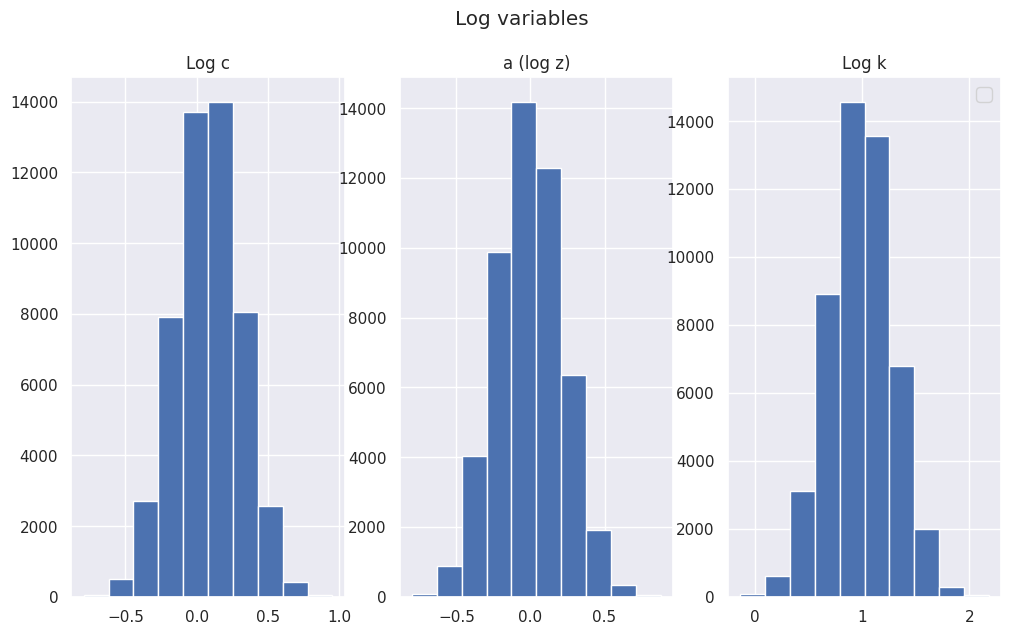

/tmp/ipython-input-918713241.py:71: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


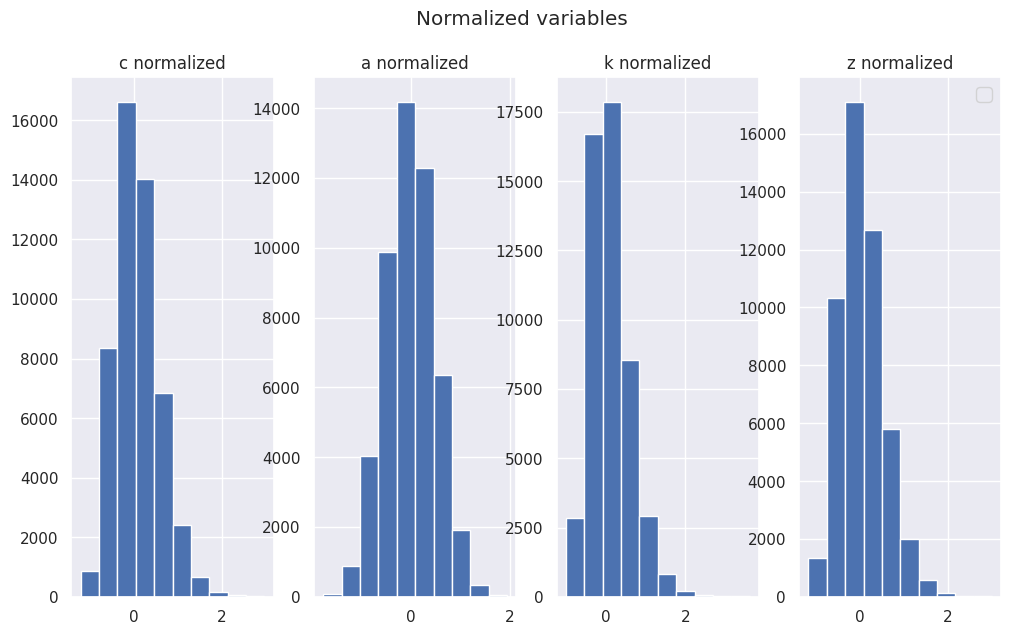

         k         z         a  k_demeaned  a_demeaned  z_demeaned  \
0  2.49443  0.843225 -0.170521   -0.131316   -0.170521   -0.156775   
1  2.49373  0.971857 -0.028547   -0.132016   -0.028547   -0.028143   
2  2.45133  0.921800 -0.081427   -0.174416   -0.081427   -0.078200   
3  2.48612  1.005670  0.005654   -0.139626    0.005654    0.005670   
4  2.58609  1.089010  0.085269   -0.039656    0.085269    0.089010   

   k_normalized  a_normalized  z_normalized  cond_exp  cond_exp_2  cond_exp_3  \
0     -0.076425     -0.378083     -0.335821  0.972367    0.963069    0.408245   
1     -0.076833     -0.063294     -0.060284  0.989717    1.049073    0.420777   
2     -0.101510     -0.180541     -0.167509  0.971439    0.982330    0.408129   
3     -0.081262      0.012536      0.012145  0.937091    1.005970    0.398713   
4     -0.023080      0.189060      0.190664  0.896667    1.051128    0.390324   

   cond_exp_4  cond_exp_5  cond_exp_6  cond_exp_7        x1        x2  
0    1.043672    2.4

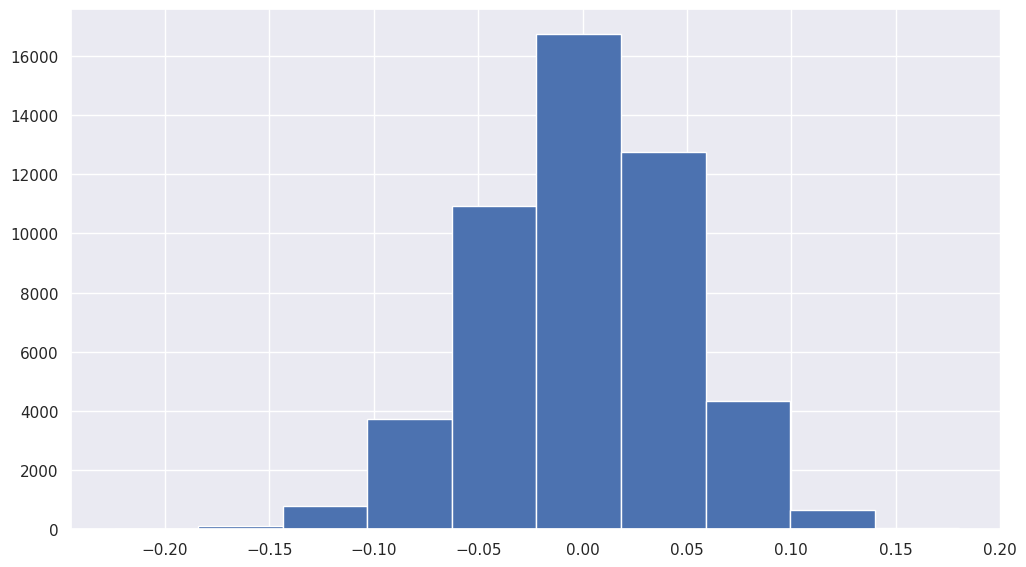


 Condition number: 77.30047097104251 

Intercept                 -0.080909
x1                        -0.363503
x2                        -0.120677
x1:x2                      0.017351
I(x1 ** 2 - 1)            -0.003267
I(x2 ** 2 - 1)            -0.007731
I(4 * x1 ** 3 - 3 * x1)    0.002592
I(4 * x2 ** 3 - 3 * x2)    0.001085
I((x1 ** 2 - 1) * x2)     -0.004387
I(x1 * (x2 ** 2 - 1))     -0.007046
dtype: float64
[-0.08090944 -0.36350296 -0.12067701  0.01735131 -0.00326675 -0.00773098
  0.00259208  0.00108524 -0.00438695 -0.00704603]


In [10]:
#Load simulated data and fit linear model
SS_values = pd.read_csv(root_path + "output/Linearization/SS_values.csv")
print(SS_values)

Sim_series = pd.read_csv(root_path + "output/Linearization/Sim_series.csv")
print(Sim_series)

# Load the data
Sim_series = pd.read_csv(root_path + "output/Linearization/Sim_series.csv")

## Simulate realization conditional expectation
Sim_series['c_plus_1'] = Sim_series['c'].shift(-1)
Sim_series['z_plus_1'] = Sim_series['z'].shift(-1)
Sim_series['k_plus_1'] = Sim_series['k'].shift(-1)
Sim_series['cond_exp'] = params.beta  * (Sim_series['c_plus_1']**(-params.gamma)) * ( params.alpha * Sim_series['z_plus_1'] * Sim_series['k_plus_1']**(params.alpha - 1) + 1 - params.delta )
# Production
Sim_series['cash'] = Sim_series['z'] * Sim_series['k']**params.alpha + (1 - params.delta)*Sim_series['k'] - Sim_series['c']

# Log tfp
Sim_series['a'] = np.log(Sim_series['z'])

# Centered vars
## Use non-stochastic SS a good proxy for mean value
Sim_series['c_demeaned'] = Sim_series['c'] - params.css
Sim_series['a_demeaned'] = Sim_series['a'] # mean is already 0
Sim_series['z_demeaned'] = Sim_series['z'] - params.zss
Sim_series['k_demeaned'] = Sim_series['k'] - params.kss

# Normalize vars:
params.std_c = np.std(Sim_series['c'])
params.std_a = np.std(Sim_series['a'])
params.std_z = np.std(Sim_series['z'])
params.std_k = np.std(Sim_series['k'])

# Std dev of logs:
params.std_log_c = np.std(np.log(Sim_series['c']))
params.std_log_z = np.std(np.log(Sim_series['z']))
params.std_log_k = np.std(np.log(Sim_series['k']))

# Update values
params.inv_den_k    = 1.0 / (params.multiplier_normalization * params.std_k)
params.inv_den_logk = 1.0 / (params.multiplier_normalization * params.std_log_k)
params.inv_den_a    = 1.0 / (params.multiplier_normalization * params.std_a)

Sim_series['c_normalized'] = Sim_series['c_demeaned']/( params.multiplier_normalization * params.std_c )
Sim_series['a_normalized'] = Sim_series['a_demeaned']/( params.multiplier_normalization * params.std_a )
Sim_series['z_normalized'] = Sim_series['z_demeaned']/( params.multiplier_normalization * params.std_z )
Sim_series['k_normalized'] = Sim_series['k_demeaned']/( params.multiplier_normalization * params.std_k )

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.suptitle('Log variables')
ax1.hist(np.log(Sim_series['c']))
ax1.set_title("Log c")
ax2.hist(Sim_series['a'])
ax2.set_title("a (log z)")
ax3.hist(np.log(Sim_series['k']))
ax3.set_title("Log k")
plt.legend()
plt.show()

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)
fig.suptitle('Normalized variables')
ax1.hist(Sim_series['c_normalized'])
ax1.set_title("c normalized")
ax2.hist(Sim_series['a_normalized'])
ax2.set_title("a normalized")
ax3.hist(Sim_series['k_normalized'])
ax3.set_title("k normalized")
ax4.hist(Sim_series['z_normalized'])
ax4.set_title("z normalized")
plt.legend()
plt.show()

# Transformed version of the conditional expectation
## Euler: 1 = E_t(...)
## c_t = E_t(c_t * (...))
Sim_series['cond_exp_2'] = Sim_series['c'] * params.beta  * ( (Sim_series['c_plus_1']/Sim_series['c'])**(-params.gamma) ) * ( params.alpha * Sim_series['z_plus_1'] * Sim_series['k_plus_1']**(params.alpha - 1) + 1 - params.delta )

## c_t/cash_t = E_t(c_t/cash_ * (...))
Sim_series['cond_exp_3'] = (Sim_series['c']/Sim_series['cash']) * params.beta  * ((Sim_series['c_plus_1']/Sim_series['c'])**(-params.gamma)) * ( params.alpha * Sim_series['z_plus_1'] * Sim_series['k_plus_1']**(params.alpha - 1) + 1 - params.delta )

## (c_t/c_ss)**(-sigma) = E_t()
Sim_series['cond_exp_4'] = params.beta  * ((Sim_series['c_plus_1']/params.css)**(-params.gamma)) * ( params.alpha * Sim_series['z_plus_1'] * Sim_series['k_plus_1']**(params.alpha - 1) + 1 - params.delta )

# kt+1
Sim_series['cond_exp_5'] = params.beta * Sim_series['k_plus_1'] * ((Sim_series['c_plus_1']/Sim_series['c'])**(-params.gamma)) * ( params.alpha * Sim_series['z_plus_1'] * Sim_series['k_plus_1']**(params.alpha - 1) + 1 - params.delta )

# Percentage diff from c_ss
Sim_series['cond_exp_6'] = params.beta  * ((Sim_series['c_plus_1']/params.css)**(-params.gamma)) * ( params.alpha * Sim_series['z_plus_1'] * Sim_series['k_plus_1']**(params.alpha - 1) + 1 - params.delta ) - 1

# rhs Euler, in logs
Sim_series['cond_exp_7'] = np.log(Sim_series['cond_exp'])

# Create x1 and x2:
Sim_series['x1'], Sim_series['x2'] =  create_x1_x2_batch(Sim_series['k'].values,
    Sim_series['a'].values,
    params.type_x1_x2,              # 0..7
    params.kss,
    params.std_k,
    params.log_kss,
    params.std_log_k,
    params.std_a,
    params.multiplier_normalization)


df_Dynare = pd.DataFrame({'k': Sim_series['k'], 'z': Sim_series['z'], 'a': Sim_series['a'],
                          'k_demeaned': Sim_series['k_demeaned'], 'a_demeaned': Sim_series['a_demeaned'], 'z_demeaned': Sim_series['z_demeaned'],
                          'k_normalized': Sim_series['k_normalized'], 'a_normalized': Sim_series['a_normalized'], 'z_normalized': Sim_series['z_normalized'],
                          'cond_exp':  Sim_series['cond_exp'],
                          'cond_exp_2':  Sim_series['cond_exp_2'],
                         'cond_exp_3':  Sim_series['cond_exp_3'],
                         'cond_exp_4':  Sim_series['cond_exp_4'],
                         'cond_exp_5':  Sim_series['cond_exp_5'],
                         'cond_exp_6':  Sim_series['cond_exp_6'],
                         'cond_exp_7':  Sim_series['cond_exp_7'],
                          'x1': Sim_series['x1'],
                          'x2': Sim_series['x2']
                         })

print(df_Dynare.head())


# Use a log-linear model:
cond_exp_chosen = 7


if params.nb_expl_vars == 4:
    # only main + interaction
    formula_OLS = (
        f"cond_exp_{cond_exp_chosen} ~ "
        f"x1 + x2 + x1*x2"
    )

elif params.nb_expl_vars == 6:
    if params.basis == 1:
        # monomial up to degree 2
        formula_OLS = (
            f"cond_exp_{cond_exp_chosen} ~ "
            f"x1 + x2+ x1*x2 + "
            f"I(x1**2) + I(x2**2)"
        )
    else:
        # Chebyshev up to order 2
        formula_OLS = (
            f"cond_exp_{cond_exp_chosen} ~ "
            f"x1 + x2 + x1*x2 + "
            f"I(x1**2 - 1) + I(x2**2 - 1)"
        )

elif params.nb_expl_vars == 10:
    if params.basis == 1:
        # monomial up to degree 3
        formula_OLS = (
            f"cond_exp_{cond_exp_chosen} ~ "
            f"x1 + x2 + x1*x2 + "
            f"I(x1**2) + I(x2**2) + "
            f"I(x1**3) + I(x1**2*x2) + "
            f"I(x1*x2**2) + I(x2**3)"
        )
    else:
        # Chebyshev up to order 3
        formula_OLS = (
            f"cond_exp_{cond_exp_chosen} ~ "
            f"x1 + x2 + x1*x2 + "
            f"I(x1**2 - 1) + I(x2**2 - 1) + "
            f"I(4*x1**3 - 3*x1) + "
            f"I(4*x2**3 - 3*x2) + "
            f"I((x1**2 - 1)*x2) + "
            f"I(x1*(x2**2 - 1))"
        )

else:
    raise ValueError(
        f"nb_expl_vars must be one of 4,6,10; got {params.nb_expl_vars}"
    )

model = smf.ols(formula=formula_OLS, data=df_Dynare).fit()


print(model.summary())
plt.hist(model.resid)
plt.show()

print(f"\n Condition number: {model.condition_number} \n")

coeff_vector = model.params
print(coeff_vector)

coeff_array_0 = model.params.values
print(coeff_array_0)



In [11]:
print(params.std_a**2)
print((params.std_tfp**2)/(1 - params.rho_tfp**2))

print(np.quantile(Sim_series['a'], 0.05))
print(np.quantile(Sim_series['a'], 0.95))

print(np.quantile(Sim_series['k'], 0.05))
print(np.quantile(Sim_series['k'], 0.95))


0.05085377737666593
0.05444444444444447
-0.3771521058263451
0.36605981791131154
1.641975
4.385889999999998


#### II.B.2. Basline PEA

In [12]:
@njit
def fill_X_row(X, i, x1, x2, nb_expl_vars, basis):
    """
    Fill row i of the design matrix X in place, using either
      - basis=1 : monomial basis
      - basis=2 : Chebyshev basis
    up to nb_expl_vars terms (4, 6 or 10).

    After calling this, X[i,:] will be set.
    """
    if nb_expl_vars == 4:
        # simple cross basis
        X[i, :] = np.array([1, x1, x2, x1*x2])
        return

    if basis == 1:
        # —— Monomial basis ——
        if nb_expl_vars == 6:
            # total degree ≤2
            X[i, :] = np.array([
                1,
                x1,
                x2,
                x1 * x2,
                x1**2,
                x2**2
            ])
        elif nb_expl_vars == 10:
            # total degree ≤3
            X[i, :] = np.array([
                1,
                x1,
                x2,
                x1 * x2,
                x1**2,
                x2**2,
                x1**3,
                x1**2 * x2,
                x1 * x2**2,
                x2**3
            ])
        else:
            raise ValueError(
                f"Monomial basis with nb_expl_vars={nb_expl_vars} not supported"
            )

    elif basis == 2:
        # —— Chebyshev basis ——
        if nb_expl_vars == 6:
            # order ≤2 Chebyshev: T_i(x)T_j(y), i+j≤2
            X[i, :] = np.array([
                1,                   # T0(x)T0(y)
                x1,                  # T1(x)T0(y)
                x2,                  # T0(x)T1(y)
                x1 * x2,             # T1(x)T1(y)
                (x1**2 - 1),         # T2(x)T0(y)
                (x2**2 - 1)          # T0(x)T2(y)
            ])
        elif nb_expl_vars == 10:
            # order ≤3 Chebyshev: T_i(x)T_j(y), i+j≤3
            X[i, :] = np.array([
                1,                     # T0(x)T0(y)
                x1,                    # T1(x)T0(y)
                x2,                    # T0(x)T1(y)
                x1 * x2,               # T1(x)T1(y)
                (x1**2 - 1),           # T2(x)T0(y)
                (x2**2 - 1),           # T0(x)T2(y)
                (4*x1**3 - 3*x1),      # T3(x)T0(y)
                (4*x2**3 - 3*x2),      # T0(x)T3(y)
                (x1**2 - 1) * x2,      # T2(x)T1(y)
                x1 * (x2**2 - 1)       # T1(x)T2(y)
            ])
        else:
            raise ValueError(
                f"Chebyshev basis with nb_expl_vars={nb_expl_vars} not supported"
            )

    else:
        raise ValueError(f"Unknown basis={basis}; must be 1 or 2")

def build_design_matrix(x1, x2, nb_expl_vars, basis):
    """
    Build the full design matrix X for vectors x1, x2 of length n,
    using either a monomial basis (basis=1) or Chebyshev basis (basis=2),
    with either 4, 6 or 10 regressors (nb_expl_vars).

    Returns
    -------
    X : ndarray, shape (n, nb_expl_vars)
    """
    n = len(x1)
    X = np.empty((n, nb_expl_vars))
    for i in range(n):
        fill_X_row(X, i, x1[i], x2[i], nb_expl_vars, basis)
    return X



In [13]:
def ols_gradient(X, y, b):
    """
    Gradient of ½||y - Xb||² w.r.t. b: ∇ = -Xᵀ(y - Xb)/n
    """
    n = y.shape[0]
    resid = y - X.dot(b)
    return - (X.T @ resid) / n

def compute_lr_safe(X, normalize=True, shave=1-1e-8):
    """
    Safe constant step-size bound for L(b) = (1/(2n))||y - Xb||^2.
    If grad = (1/n) X^T (Xb - y), Hessian = (1/n) X^T X with L = λ_max/n.
    Returns lr_max ≈ (2 / L) with a tiny shave to avoid the boundary.
    """
    s = np.linalg.svd(X, compute_uv=False)        # singular values, descending
    sigma_max = s[0]
    lam_max   = sigma_max * sigma_max             # λ_max(X^T X)
    if normalize:
        n   = X.shape[0]
        L   = lam_max / n
        lr  = 2.0 / L
    else:
        lr  = 2.0 / lam_max
    return shave * lr

def compute_lr_best_constant(X, normalize=True, eps=1e-12, shave=1-1e-8):
    """
    'Best' fixed step for steepest descent on a quadratic: η* = 2/(μ+L),
    where μ=λ_min(H), L=λ_max(H). For grad=(1/n)X^T(Xb - y), H=(1/n)X^T X.
    Falls back to the safe bound if rank-deficient (μ≈0).
    """
    s = np.linalg.svd(X, compute_uv=False, full_matrices=False)
    lam_max = s[0]*s[0]
    lam_min = s[-1]*s[-1]
    if lam_min < eps:
        # rank-deficient → use safe bound
        return compute_lr_safe(X, normalize=normalize, shave=shave)
    denom = lam_max + lam_min
    if normalize:
        n   = X.shape[0]
        eta = 2.0 * n / denom
    else:
        eta = 2.0 / denom
    return shave * eta

@njit
def exact_line_search_jit(X, grad):
    """
    Exact steepest-descent step size for OLS when grad is precomputed.

    Parameters
    ----------
    X : (n, p) array
        Design matrix
    grad : (p,) array
        Gradient = (1/n) X^T (X b - y)

    Returns
    -------
    eta : float
        Exact minimizer of L(b - eta * grad) along -grad
    """
    n, p = X.shape

    # num = g^T g
    num = 0.0
    for j in range(p):
        num += grad[j] * grad[j]

    # den = (1/n) * ||X g||^2
    den = 0.0
    for i in range(n):
        s = 0.0
        for j in range(p):
            s += X[i, j] * grad[j]
        den += s * s
    den /= n

    if den <= 0.0:
        return 0.0
    return num / den


In [14]:
def summarize_k_a(k, a):
    """
    Compute basic summary statistics for two variables k and a.

    Parameters
    ----------
    k : array-like
        Numerical data for variable k.
    a : array-like
        Numerical data for variable a.

    Returns
    -------
    summary_df : pandas.DataFrame
        DataFrame with rows ['k','a'] and columns ['Mean','Median','Std','Min','Max'].
    """
    # ensure numpy arrays
    k = np.asarray(k)
    a = np.asarray(a)

    stats_dict = {
        'Variable': ['k', 'a'],
        'Mean'    : [k.mean(),      a.mean()],
        'Median'  : [np.median(k),  np.median(a)],
        'Skewness': [scipy.stats.skew(k), scipy.stats.skew(a)],
        'Std'     : [k.std(),       a.std()],
        'Min'     : [k.min(),       a.min()],
        'Max'     : [k.max(),       a.max()],
    }

    summary_df = pd.DataFrame(stats_dict)
    return summary_df

def plot_consumption_slices_non_binding(params,
                            mean_k, std_k,
                            a_ss, std_a,
                            b0, coeff_array_0,
                            cond_exp_chosen,
                            nb_stdev=2,
                            nb_points=500,
                            show_initial_guess=True,
                            fig_name=None):
    """
    Plot optimal consumption slices along k and a. Model without constraint on investment.

    params: object with attributes
        - center_dep_var (bool)
        - normalize_dep_var (bool)
        - kss, std_k, std_a
        - alpha, delta, gamma, css, tol_c
        - nb_expl_vars (int), basis (int)
    mean_k, std_k: float
    a_ss, std_a: float
    b0, coeff_array_0: arrays of regression coefficients
    cond_exp_chosen: int (2, 5, 6, or 7)
    nb_stdev: number of standard deviations to plot around the mean
    nb_points: number of grid points per slice
    """
    # Create subplots side by side
    fig, axs = plt.subplots(1, 2, figsize=(14, 6))

    for i, var in enumerate(["k", "a"]):
        # build grids
        if var == "k":
            k_grid = np.linspace(mean_k - nb_stdev*std_k,
                                 mean_k + nb_stdev*std_k,
                                 nb_points)
            a_grid = a_ss * np.ones_like(k_grid)
        else:
            a_grid = np.linspace(a_ss - nb_stdev*std_a,
                                 a_ss + nb_stdev*std_a,
                                 nb_points)
            k_grid = mean_k * np.ones_like(a_grid)

        # transform explanatory variables
        # Create x1 and x2:
        x1, x2 = create_x1_x2_batch_fast(k_grid, a_grid,
                                        params.type_x1_x2,
                                        params.kss, params.inv_den_k,       #
                                        params.log_kss, params.inv_den_logk,
                                        params.inv_den_a)


        # construct design matrix X
        X = build_design_matrix(x1, x2, nb_expl_vars=params.nb_expl_vars, basis=params.basis)

        # cash-on-hand
        cash = np.exp(a_grid)*k_grid**params.alpha + (1 - params.delta)*k_grid

        # compute consumption and (if needed) k_next under different conditional expectations
        if cond_exp_chosen == 2:
            c_pea = params.css * np.maximum(1e-2, X.dot(b0))**(-1/params.gamma)
            c_pea = np.clip(c_pea, params.tol_c, cash - params.tol_c)
            c0 = params.css * np.maximum(1e-2, X.dot(coeff_array_0))**(-1/params.gamma)
            c0 = np.clip(c0, params.tol_c, cash - params.tol_c)

        elif cond_exp_chosen == 5:
            k_next = X.dot(b0)
            c_pea = np.maximum(cash - k_next, params.tol_c)
            c0 = np.maximum(cash - X.dot(coeff_array_0), params.tol_c)

        elif cond_exp_chosen == 6:
            c_pea = params.css * (1 + X.dot(b0))**(-1/params.gamma)
            c_pea = np.maximum(c_pea, params.tol_c)
            k_next = np.maximum(cash - c_pea, params.tol_c)

            c0 = params.css * (1 + X.dot(coeff_array_0))**(-1/params.gamma)
            c0 = np.maximum(c0, params.tol_c)

        elif cond_exp_chosen == 7:
            c_pea = np.exp(X.dot(b0))**(-1/params.gamma)
            c0 = np.exp(X.dot(coeff_array_0))**(-1/params.gamma)
            k_next = np.maximum(cash - c_pea, params.tol_c)

        else:
            raise NotImplementedError(f"cond_exp_chosen={cond_exp_chosen} not implemented")

        # plot
        grid = k_grid if var == "k" else a_grid
        xlabel = 'Capital, k_t' if var == "k" else 'TFP, log(z_t)'
        axs[i].plot(grid, c_pea, label="PEA")
        if show_initial_guess==True:
            axs[i].plot(grid, c0,   label="Initial guess")
        axs[i].set_xlabel(xlabel)
        axs[i].set_ylabel('Consumption, c_t')
        axs[i].set_title(f'Optimal Consumption')
        axs[i].grid(True)

    plt.tight_layout()

    # Save figure, if asked:
    if fig_name is not None:
        plt.savefig(fig_name, dpi=300)
        plt.close()
    else:
        axs[1].legend(loc='upper right')
        plt.show()

In [15]:
# To use ADAM instead of SGD
# See: https://arxiv.org/abs/1412.6980

def init_adam(n_params):
    """
    Create the optimizer state for Adam.
    Returns dict holding:
      m: first moment vector
      v: second moment vector
      t: time-step (int)
    """
    return {
        "m": np.zeros(n_params),
        "v": np.zeros(n_params),
        "t": 0
    }

def adam_step_basic(b, grad, state, lr, beta1 = 0.9, beta2 = 0.999, eps = 1e-8):
    """
    Perform one Adam update.

    Inputs:
      b     : current parameter vector (shape (k,))
      grad  : gradient ∇_b L (shape (k,))
      state : dict {"m","v","t"} from init_adam
      lr    : base learning rate (scalar)

    Returns:
      b_new : updated parameter vector
      state : updated state dict
    """
    m, v, t = state["m"], state["v"], state["t"] + 1

    # Update biased first and second moment estimates
    m = beta1 * m + (1 - beta1) * grad
    v = beta2 * v + (1 - beta2) * (grad ** 2)

    # Compute bias-corrected moments
    m_hat = m / (1 - beta1**t)
    v_hat = v / (1 - beta2**t)

    # Parameter update
    b_new = b - lr * m_hat / (np.sqrt(v_hat) + eps)

    # Save updated state
    state.update({"m": m, "v": v, "t": t})
    return b_new, state

# To avoid annoying cases (infinite gradient, etc.)
def adam_step(
    b, grad, state, lr,
    beta1=0.9, beta2=0.999, eps=1e-8,
    max_grad_norm=None,   # e.g. 1e3 (clip by L2 norm)
    clip_value=None,      # e.g. 1e3 (elementwise clip)
    max_step_norm=None,   # e.g. 10.0 (clip the actual parameter step)
    verbose=False         # print when clippinp or nan in grad
):
    """
    Adam step with some additional safety checks
      - Skip update if grad/step/b_new is non-finite.
      - Optional gradient clipping (by value or norm).
      - Optional step clipping (by norm).
    Returns: (b_new, state, info_dict)
    """
    # 0) guard on gradient
    if not np.all(np.isfinite(grad)):
        if verbose:
            print("Gradient is non-finite; skipping step")
        return b, state

    g = grad.copy()

    # 1) gradient clipping
    if clip_value is not None:
        np.clip(g, -clip_value, clip_value, out=g)

    if max_grad_norm is not None:
        gn = np.linalg.norm(g)
        if gn > max_grad_norm and gn > 0:
            g *= (max_grad_norm / gn)

    # 2) Adam moments (do not commit until we accept the step)
    m, v, t = state["m"], state["v"], state["t"]
    t_new = t + 1

    m = beta1 * m + (1.0 - beta1) * g
    v = beta2 * v + (1.0 - beta2) * (g * g)

    # Bias corrections (clamped to avoid division by ~0)
    bc1 = max(1.0 - beta1**t_new, 1e-16)
    bc2 = max(1.0 - beta2**t_new, 1e-16)

    m_hat = m / bc1
    v_hat = v / bc2
    # keep denominator positive
    v_hat = np.maximum(v_hat, eps * eps)

    # 3) proposed step
    step = lr * m_hat / (np.sqrt(v_hat) + eps)

    # optional step clipping
    if max_step_norm is not None:
        sn = np.linalg.norm(step)
        if sn > max_step_norm and sn > 0:
            step *= (max_step_norm / sn)

    # guard on step and resulting params
    if not np.all(np.isfinite(step)):
        if verbose:
            print("Step is non-finite; skipping step")
        return b, state

    b_new = b - step
    if not np.all(np.isfinite(b_new)):
        if verbose:
            print("New params are non-finite; skipping step")
        return b, state

    # 4) commit state
    state.update({"m": m, "v": v, "t": t_new})

    return b_new, state



Final parameters b: [-3.47296033e-23  6.73546578e-23]
Final objective f(b): 5.742795277097155e-45


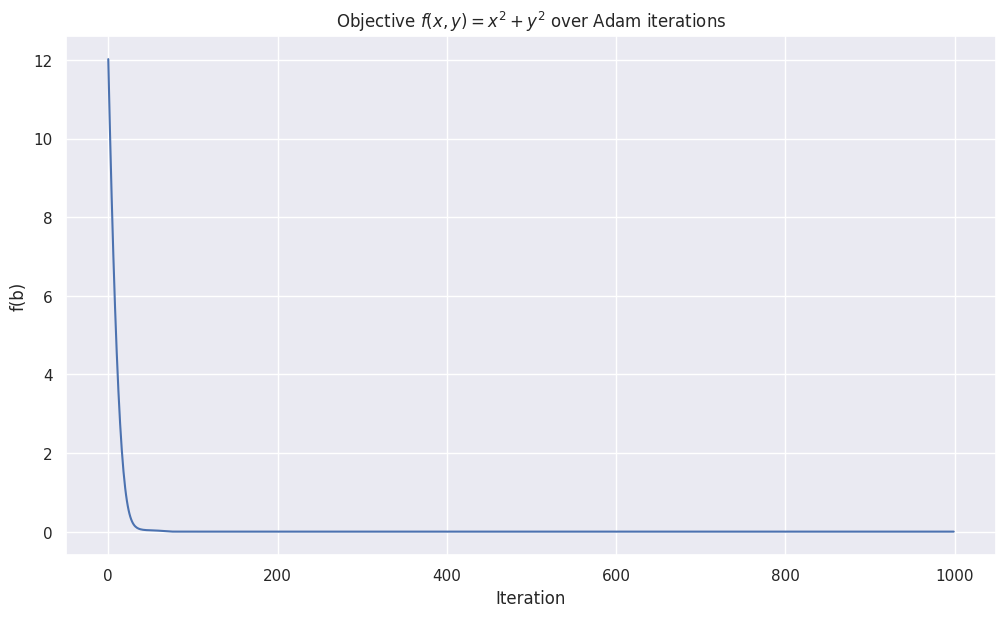

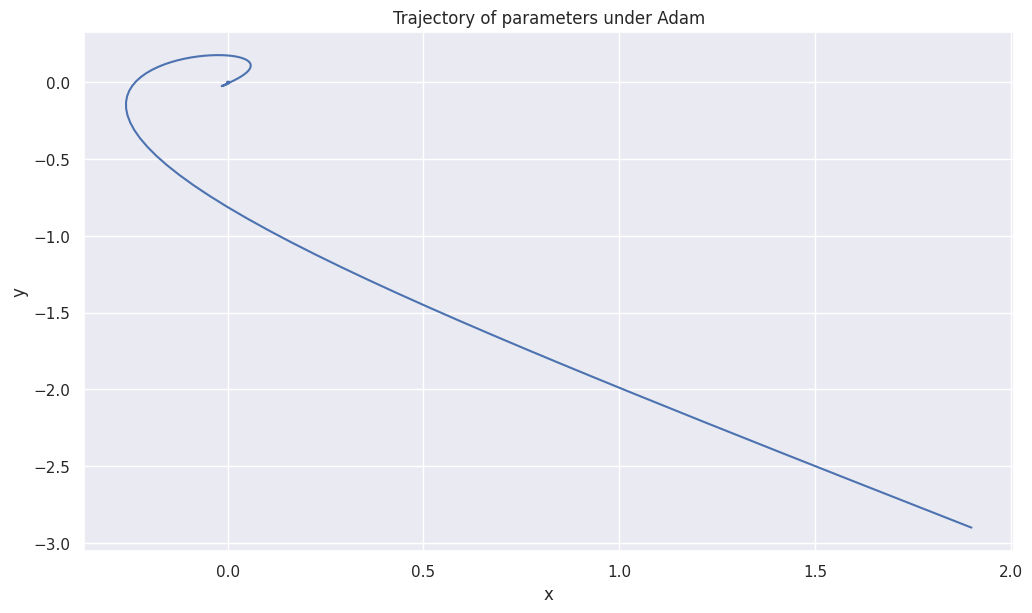

In [16]:
# Toy problem: f(x, y) = x^2 + y^2
def grad_f(b):
    return 2 * b

# Initialize
b = np.array([2.0, -3.0])
state = init_adam(len(b))
lr = 0.1  # base learning rate
n_iters = 1000

# Track trajectory and objective
bs = []
fs = []
for i in range(n_iters):
    grad = grad_f(b)
    b, state = adam_step(b, grad, state, lr)
    bs.append(b.copy())
    fs.append(b.dot(b))

# Print final result
print("Final parameters b:", b)
print("Final objective f(b):", b.dot(b))

# Plot objective over iterations
plt.figure()
plt.plot(fs)
plt.title("Objective $f(x,y) = x^2+y^2$ over Adam iterations")
plt.xlabel("Iteration")
plt.ylabel("f(b)")
plt.show()

# Plot trajectory of (x, y)
bs = np.array(bs)
plt.figure()
plt.plot(bs[:, 0], bs[:, 1])
plt.title("Trajectory of parameters under Adam")
plt.xlabel("x")
plt.ylabel("y")
plt.show()


In [17]:
@njit
def ols_gradient_jit(X, y, b):
    """
    jit-comiled OLS gradient
    """
    n = y.shape[0]
    # compute residuals via a dot product
    resid = y - np.dot(X, b)
    # compute gradient via another dot
    return -np.dot(X.T, resid) / n

# Need to compile it once:
# Example usage:
X = np.random.randn(1000, 10)
true_b = np.arange(10, dtype=np.float64)
y = X.dot(true_b) + 0.1 * np.random.randn(1000)

# Evaluate Python vs JIT once to compile
b0 = np.zeros(10, dtype=np.float64)
g_jit = ols_gradient_jit(X, y, b0)  # triggers compilation

In [18]:
def steps_to_tol_from_X(X_reg, r=1e-2, ridge=0.0):
    """
    Return K so that ||b_K - b_*||_H <= r * ||b_0 - b_*||_H
    for GD with eta = 2/(mu+L), H=(1/n)X'X. Adds optional ridge to H.

    r : desired relative error (0<r<1)
    ridge : add λI (in H units); equivalently use X'X + n*λ I.
    """
    G = X_reg.T @ X_reg
    if ridge > 0:
        G = G + (X_reg.shape[0] * ridge) * np.eye(G.shape[1])
    evals = np.linalg.eigvalsh(G)
    muG, LG = evals[0], evals[-1]
    if muG <= 0:
        return np.inf  # not strongly convex: no finite K guarantee
    kappa = LG / muG
    rho = (kappa - 1.0) / (kappa + 1.0)
    return int(np.ceil(np.log(r) / np.log(rho)))  # note: r<1 => negative numerator/denominator


In [19]:
def update_b_gradient_based(params, X_reg, y_reg, b0, adam_state, iteration):
    """
    gradient-based parameter update for the PEA regression step.
    """
    # run K inner steps
    b_K = b0.copy()
    # No need to recompute lr for these options:
    if params.lr_algorithm == "constant":
        lr = params.lr
    elif params.lr_algorithm == "safe":
        ## Safe lr
        lr = compute_lr_safe(X_reg)
    elif params.lr_algorithm == "best_constant":
        ## optimal constant learning rate
        lr = compute_lr_best_constant(X_reg)

    for k in range(params.nb_gd_steps_same_data):

        grad = ols_gradient_jit(X_reg, y_reg, b_K)

        # Guard against NaNs/Infs
        if not np.all(np.isfinite(grad)):
            # skip inner updates; leave state unchanged
            return b_K, adam_state

        # Adaptive learning rates, based on the value of the gradient
        if params.lr_algorithm == "best":
            ## exact optimal
            lr = exact_line_search_jit(X_reg, grad)

        if params.use_scheduler == True:
        #Inverse‐square‐root decay (see Robbins–Monro conditions)
            lr = lr/(np.sqrt(1 + iteration))

        if params.optimizer == "SGD":
            ## Update the parameter:
            b_K = b_K - lr * grad

        elif params.optimizer == "Adam":
            # ADAM step
            b_K, adam_state = adam_step(b_K, grad, adam_state, lr)

    return b_K, adam_state

gradient_descent_approach: False. lr_algo: constant. nb_gd_steps_same_data: 10.
 Optimizer: Adam.
 Scheduler: False.
 Intial b0: [-0.08090944 -0.36350296 -0.12067701  0.01735131 -0.00326675 -0.00773098
  0.00259208  0.00108524 -0.00438695 -0.00704603]
Iteration: 1	Conv. crit.: 0.04969931355584119	 b: [-9.97870758e-02 -3.37883451e-01 -1.70376328e-01  3.83051057e-02
 -1.16517497e-02 -1.83748766e-02  1.15319853e-03 -9.30153088e-05
  1.23696152e-03  1.13099911e-03]
Iteration: 2	Conv. crit.: 0.019871306475831102	 b: [-1.02666351e-01 -3.27187674e-01 -1.90247635e-01  3.94422800e-02
 -1.43290043e-02 -1.78226947e-02  5.76922195e-04  3.02711177e-04
  2.41833995e-03  1.12799760e-03]
Iteration: 3	Conv. crit.: 0.008204041213225016	 b: [-0.10304759 -0.32159481 -0.19845168  0.03716903 -0.0149658  -0.0171392
  0.00034581  0.00046013  0.00220095  0.00048684]
Iteration: 4	Conv. crit.: 0.003221470578844088	 b: [-1.03190268e-01 -3.18465776e-01 -2.01673146e-01  3.51584305e-02
 -1.48985619e-02 -1.71331539e-

Iteration: 49	Conv. crit.: 2.364017731570911e-10	 b: [-1.03624399e-01 -3.14363756e-01 -2.01918619e-01  3.31708048e-02
 -1.37825237e-02 -1.78810884e-02  2.16688483e-04  3.56911287e-04
  6.54469164e-04 -7.27008377e-04]


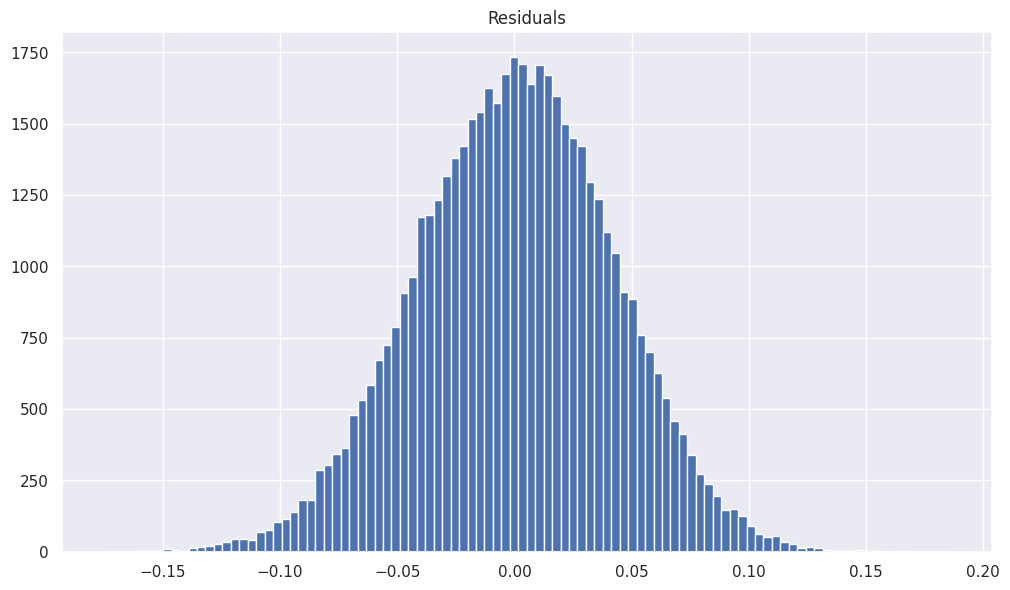

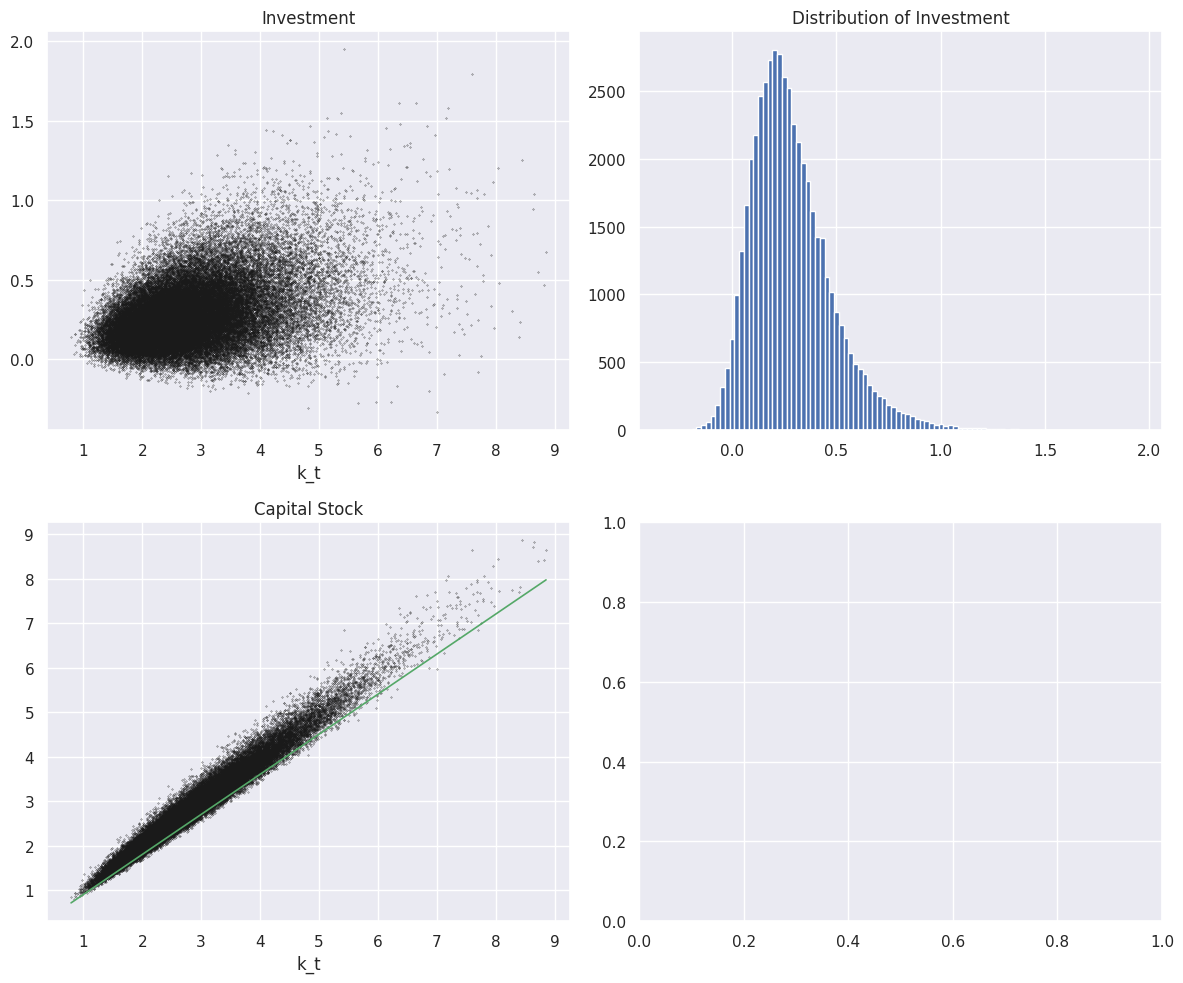

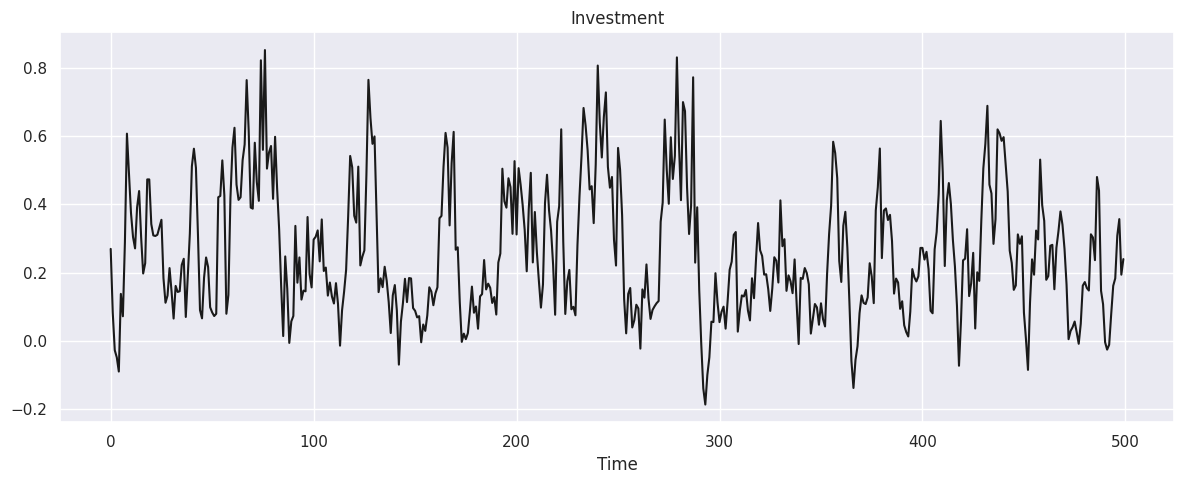

Percentage of time negative investment: 0.030480609612192244
  Variable      Mean    Median  Skewness       Std       Min       Max
0        k  2.846778  2.701491  1.008458  0.936679  0.792734  8.855110
1        a  0.002156  0.001426  0.017373  0.236874 -0.884884  0.973818


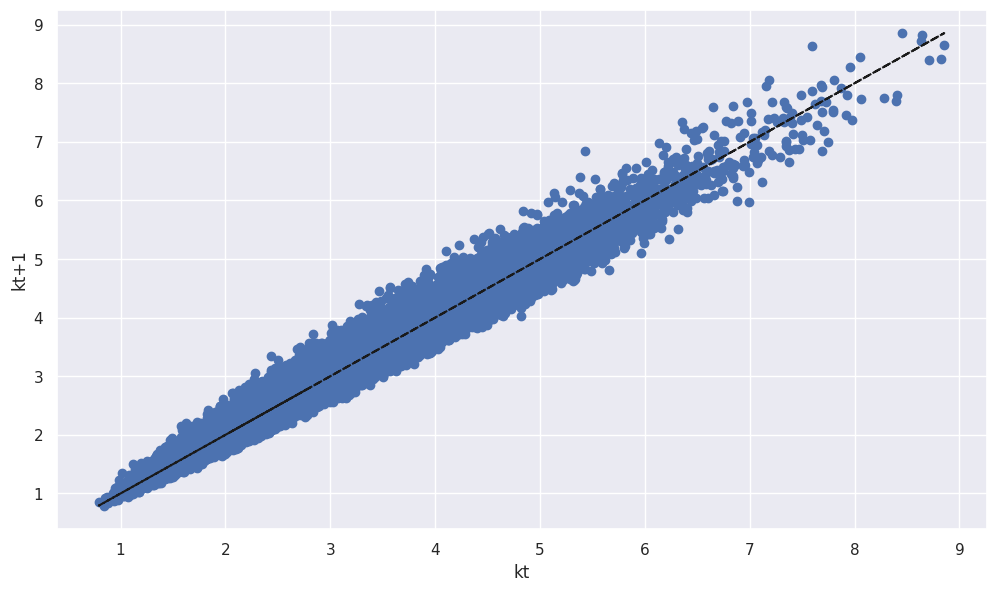

In [20]:
# Usual PEA
tol = 1e-5 #1e-6
gam = 1.0
init = 100 #burnin
long = 50000
slong = init + long

# SS value. Use mean values on the simulation
k_ss = SS_values[SS_values["Variable"] == "k"]["MeanValue"].item()
a_ss = 0
c_ss = SS_values[SS_values["Variable"] == "c"]["MeanValue"].item()

# Also, define the index arrays T and T1, for example:
T = np.arange(init, slong-1)      # Corresponds roughly to Matlab: init+1:slong-1 (adjusted for 0-indexing)
T1 = np.arange(init+1, slong)       # Corresponds roughly to Matlab: init+2:slong

# Generate shocks: e is a vector of size slong with normally distributed shocks scaled by se
e = params.std_tfp * np.random.randn(slong)

# Initialize a as a vector of zeros
a = np.zeros(slong)

# Set the first element of a
a[0] = a_ss

# Generate the AR(1) process for a
for i in range(1, slong):
    a[i] = params.rho_tfp * a[i-1] + e[i]

# Use OLS then SGD:

# Initialize iteration counter and convergence criterion
iteration = 1
crit = np.inf  # set to a large number initially

# Compute initial conditions:
print(f"gradient_descent_approach: {params.gradient_descent_approach}. lr_algo: {params.lr_algorithm}. nb_gd_steps_same_data: {params.nb_gd_steps_same_data}.\n Optimizer: {params.optimizer}.\n Scheduler: {params.use_scheduler}.\n Intial b0: {coeff_array_0}")
b0 = coeff_array_0.copy()

# If using ADAM, need to initialize
adam_state  = init_adam(len(coeff_array_0))

#while crit > tol:
while iteration < 50:
    k = np.zeros(slong + 1)
    c = np.zeros(slong)
    X = np.zeros((slong, len(b0)))
    cash = np.zeros(slong)

    # Set initial capital:
    k[0] = k_ss

    # Simulate the path:
    for i in range(slong):

        # Construct the regressors at time i.
        x1, x2 = create_x1_x2_fast_jit(k[i], a[i],
                            params.type_x1_x2,
                            params.kss, params.inv_den_k,
                            params.log_kss, params.inv_den_logk,
                            params.inv_den_a)

        # Set values fo X:
        fill_X_row(X, i, x1, x2, params.nb_expl_vars, params.basis)

        # Cash on hand
        cash[i] = np.exp(a[i]) * (k[i]**params.alpha) + (1 - params.delta) * k[i]

        # Update capital for the next period using the model's law of motion
        #k[i+1] = cash[i] - c[i]
        if cond_exp_chosen == 2:
            c[i] = params.css*np.maximum(params.tol_c, np.dot(X[i, :], b0))**(-1/params.gamma)
            c[i] = np.maximum(params.tol_c, c[i])
            k[i+1] = np.maximum(cash[i] - c[i], params.tol_c)
        elif cond_exp_chosen == 5:
            k[i+1] = np.maximum(np.dot(X[i, :], b0), params.tol_c)
            c[i] = np.maximum(params.tol_c, cash[i] - k[i+1])
        elif cond_exp_chosen == 6:
            y = np.dot(X[i, :], b0)
            c[i] = params.css*(1 + y)**(-1/params.gamma)
            c[i] = np.maximum(params.tol_c, c[i])
            k[i+1] = np.maximum(cash[i] - c[i], params.tol_c)
        elif cond_exp_chosen == 7:
            c[i] = np.exp(np.dot(X[i, :], b0))**(-1/params.gamma)
            k[i+1] = np.maximum(cash[i] - c[i], params.tol_c)
        else:
            print(f"cond_exp_chosen : {cond_exp_chosen} not implemented yet)")
    # Construct the vector y using the simulated paths (vectorized operation)
    if cond_exp_chosen == 2:
        y = params.beta * ( (c[T1]/params.css)**(-params.gamma) ) * (params.alpha * np.exp(a[T1]) * k[T1]**(params.alpha - 1) + 1 - params.delta)
    elif cond_exp_chosen == 5:
        y = params.beta * (k[T1]) * ( (c[T1]/c[T])**(-params.gamma) ) * (params.alpha * np.exp(a[T1]) * k[T1]**(params.alpha - 1) + 1 - params.delta)
    elif cond_exp_chosen == 6:
        y = params.beta * ( (c[T1]/params.css)**(-params.gamma) ) * (params.alpha * np.exp(a[T1]) * k[T1]**(params.alpha - 1) + 1 - params.delta) - 1
    elif cond_exp_chosen == 7:
        y = np.log( params.beta * ( ( c[T1] ) ** ( -params.gamma ) ) * (params.alpha * np.exp(a[T1]) * k[T1]**(params.alpha - 1) + 1 - params.delta) )

    y_reg = y
    X_reg = X[T, :]

    if params.gradient_descent_approach == False:
        # Solve the regression: log(y) = X(T,:) * bt in a least-squares sense.
        # np.linalg.lstsq returns a tuple; the first element is the solution.
        bt, _, _, _ = np.linalg.lstsq(X_reg, y_reg, rcond=None)

        # Update b using a smoothing parameter gam:
        b = gam * bt + (1 - gam) * b0
    else:

        # Gradient-descent approach
        ## Get gradient at current parameter value
        b, adam_state = update_b_gradient_based(params, X_reg, y_reg, b0, adam_state, iteration)

    # Compute convergence criterion (maximum absolute change in b)
    crit = np.max(np.abs(b - b0))

    # Update b0 for the next iteration
    b0 = b.copy()

    # Display current iteration and convergence criterion
    print(f"Iteration: {iteration}\tConv. crit.: {crit}\t b: {b}")

    iteration += 1

# residual
Res = y_reg - np.dot(X[T, :], b0)
MSE = np.mean(Res ** 2)

# =============================================================================
# Plotting results
# =============================================================================
# 1. Plot histogram of residuals
plt.figure()
plt.hist(Res, bins=100)
plt.title('Residuals', fontname='Times', fontsize=12)

# 2. Compute investment deviations: it = k[T1] - (1-delta)*k[T]
it = k[T1] - (1 - params.delta) * k[T]

# Create a 2x2 figure for several plots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Investment scatter plot
axs[0, 0].plot(k[T], it, '.', markersize=0.5, color='k')
axs[0, 0].set_xlabel('k_t', fontname='Times', fontsize=12)
axs[0, 0].set_title('Investment', fontname='Times', fontsize=12)

# Histogram of investment
axs[0, 1].hist(it, bins=100)
axs[0, 1].set_title('Distribution of Investment', fontname='Times', fontsize=12)

# Capital stock: plot k[T] vs. k[T1] and add 45° reference line (scaled by (1-delta))
axs[1, 0].plot(k[T], k[T1], '.', markersize=0.5, color='k')
x_line = np.linspace(np.min(k[T]), np.max(k[T]), 100)
axs[1, 0].plot(x_line, (1 - params.delta) * x_line, '-', linewidth=1.2, color='g')
axs[1, 0].set_xlabel('k_t', fontname='Times', fontsize=12)
axs[1, 0].set_title('Capital Stock', fontname='Times', fontsize=12)

plt.tight_layout()


# 3. Time series plots for a subset (T0 = 500:1000)
T0 = np.arange(500, 1000)
fig, ax = plt.subplots(1, 1, figsize=(12, 5))
ax.plot(it[T0], 'k')
ax.set_xlabel('Time', fontname='Times', fontsize=12)
ax.set_title('Investment', fontname='Times', fontsize=12)

plt.tight_layout()
plt.show()

plt.scatter(k[:-1], k[1:])
plt.plot(k[1:], k[1:], linestyle="--", color = "k")
plt.ylabel("kt+1")
plt.xlabel("kt")
plt.savefig(output_folder + "kt_kt1.pdf", dpi=300)

percentage_negative_investment = len(it[it < 0])/len(it)
print(f"Percentage of time negative investment: {percentage_negative_investment}")

# Summary stats and plotting slices
df_stats = summarize_k_a(k, a)
print(df_stats)

plot_consumption_slices_non_binding(
    params,
    mean_k=df_stats[df_stats["Variable"] == "k"]["Mean"].item(),
    std_k=df_stats[df_stats["Variable"] == "k"]["Std"].item(),
    a_ss=0.0,
    std_a=params.std_a,
    b0=b0,
    coeff_array_0=coeff_array_0,
    cond_exp_chosen=7,
    nb_stdev=2,
    nb_points=500,
)



In [21]:
df_stats.to_csv(output_folder + "summary_stats_non_binding.csv")

# Save final plot to disk:
plot_consumption_slices_non_binding(
    params,
    mean_k=df_stats[df_stats["Variable"] == "k"]["Mean"].item(),
    std_k=df_stats[df_stats["Variable"] == "k"]["Std"].item(),
    a_ss=0.0,
    std_a=params.std_a,
    b0=b0,
    coeff_array_0=coeff_array_0,
    cond_exp_chosen=7,
    nb_stdev=2,
    nb_points=500,
    show_initial_guess=False,
    fig_name= output_folder + "consumption_slice_non_binding.pdf"
)

In [22]:
steps_to_tol_from_X(X_reg, 0.1)

1488

In [23]:
# Condition numbers
s = np.linalg.svd(X_reg, compute_uv=False)
kappa_X = s[0] / (s[-1] + 1e-18)
kappa_H = kappa_X**2  # ~ cond(X^T X)
print("cond(X):", kappa_X, "cond(H):", kappa_H)

# Column norms / dynamic range
col_norms = np.linalg.norm(X_reg, axis=0)
print("col_norms:", col_norms, "range:", col_norms.max()/col_norms.min())

# Predicted K for r=0.1
kappa = kappa_H
rho = (kappa - 1) / (kappa + 1)
K_pred = int(np.ceil(np.log(0.1) / np.log(rho)))
print("Predicted K:", K_pred)

cond(X): 35.95052652769088 cond(H): 1292.440357618206
col_norms: [223.60456167 120.29618515 117.39322547  81.7260212  182.81178826
 183.45175159 327.01677887 303.63981127  90.73040639  92.51017492] range: 4.001378925136653
Predicted K: 1488


### II.C. Solving model with irreversible investment constraints

#### II.C.1. Usual PEA



In [24]:
def dhm_accuracy_test(params, b0, e_test, init = 1000):
    """
    Compute the DHM accuracy test for a given set of parameters and an initial coefficient vector b0.

    Parameters:
    params: Instance containing model parameters (beta, delta, alpha, gamma, rho_tfp, std_tfp)
    b0: Coefficient vector used for the approximation.

    Returns:
    dict: Dictionary containing DHM test results.
    """
    # Simulation setup
    slong = len(e_test) #init + long
    long = slong - init
    if long <= 0:
        raise Exception(f"long is :{long}. Increase length of e_test, or decrease init")

    T = np.arange(init, slong - 2)  # Select current period
    T1 = np.arange(init + 1, slong - 1) # Select period t+1. Drop last period, for which mu is not calculated

    # Generate shocks and AR(1) process for a
    a = np.zeros(slong)
    for i in range(1, slong):
        a[i] = params.rho_tfp * a[i - 1] + e_test[i]

    # Initialize variables
    k = np.zeros(slong + 1)
    mu =  np.zeros(slong + 1) #lagrange multiplier
    c = np.zeros(slong)
    production = np.zeros(slong)
    inv = np.zeros(slong) #investment
    cash = np.zeros(slong)
    X = np.zeros((slong, len(b0)))
    k[0] = params.kss  # Initial capital at steady state


    # Upper bound on E_t
    E_max = params.tol_c**(-params.gamma)            # ensures c >= tol_c

    # Simulate the economy
    for i in range(slong):

        """
        x1, x2 = create_x1_x2_jit(k[i], a[i],
                                params.type_x1_x2,
                                params.kss, params.std_k,
                                params.log_kss, params.std_log_k,
                                params.std_a, params.multiplier_normalization)
        """

        x1, x2 = create_x1_x2_fast_jit(k[i], a[i],
                                params.type_x1_x2,
                                params.kss, params.inv_den_k,
                                params.log_kss, params.inv_den_logk,
                                params.inv_den_a)

        # Set values fo X:
        fill_X_row(X, i, x1, x2, params.nb_expl_vars, params.basis)

        production[i] = np.exp(a[i]) * k[i]**params.alpha
        cash[i] = production[i] + (1 - params.delta) * k[i]

        # Consumption, assuming current constraint on investment does not bind
        #E_t_tilde = np.clip(np.exp(np.dot(X[i, :], b0)), production[i]**(-params.gamma), E_max)
        E_t_tilde = np.exp(np.dot(X[i, :], b0))
        c[i] = E_t_tilde ** (-1/params.gamma)

        # Update guess, after calculating investmen
        inv[i] = production[i] - c[i]
        if inv[i] > 0:
            k[i+1] = cash[i] - c[i]
        else:
            k[i+1] = (1 - params.delta) * k[i]
            c[i] = production[i]
            mu[i] = c[i]**( - params.gamma ) - E_t_tilde

    # Compute the error term
    ut = c[T]**(-params.gamma) - mu[T] - params.beta * ( ( c[T1]**(-params.gamma) ) * (params.alpha * np.exp(a[T1]) * k[T1] ** (params.alpha - 1) + 1 - params.delta) + mu[T1] * ( 1 - params.delta) )

    # Compute DHM statistics
    mean_ut = np.mean(ut)
    mean_abs_ut = np.mean(np.abs(ut))
    mean_square_ut = np.mean(ut**2)
    var_ut = np.var(ut, ddof=1)
    std_ut = np.sqrt(var_ut)
    T_sample = len(ut)
    dhm_stat = T_sample * (mean_ut ** 2) / var_ut

    # Chi-square critical values
    lower5 = chi2.ppf(0.05, df=1)
    upper5 = chi2.ppf(0.95, df=1)

    # Compute consumption equivalent
    mean_k = np.mean(k)
    a_ss = 0

    """
    x1, x2 = create_x1_x2_jit(mean_k, a_ss,
                                params.type_x1_x2,
                                params.kss, params.std_k,
                                params.log_kss, params.std_log_k,
                                params.std_a, params.multiplier_normalization)
    """
    x1, x2 = create_x1_x2_fast_jit(mean_k, a_ss,
                                params.type_x1_x2,
                                params.kss, params.inv_den_k,
                                params.log_kss, params.inv_den_logk,
                                params.inv_den_a)

    # Build X_ss
    X_ss = build_design_matrix(np.atleast_1d(x1), np.atleast_1d(x2), nb_expl_vars=params.nb_expl_vars, basis=params.basis)

    # Consumption at the non-stochastic ss:
    ## (assuming constraint does not bind):
    c_ss = np.exp(np.dot(X_ss, b0)) ** (-1/params.gamma)

    c_diff = (mean_ut + c_ss ** (-params.gamma)) ** (-1 / params.gamma)
    #c_diff = (mean_abs_ut + c_ss ** (-params.gamma)) ** (-1 / params.gamma)
    c_equivalent = 100 * (c_diff - c_ss) / c_ss

    return mean_abs_ut,  mean_square_ut, std_ut, dhm_stat, c_equivalent


def plot_consumption_slices(params,
                            mean_k, std_k,
                            a_ss, std_a,
                            b0, coeff_array_0,
                            cond_exp_chosen,
                            nb_stdev=2,
                            nb_points=500,
                            show_initial_guess=True,
                            fig_name="None"):
    """
    Plot optimal consumption slices along k and a. Model with constraint on investment.

    params: object with attributes
        - center_dep_var (bool)
        - normalize_dep_var (bool)
        - kss, std_k, std_a
        - alpha, delta, gamma, css, tol_c
        - nb_expl_vars (int), basis (int)
    mean_k, std_k: float
    a_ss, std_a: float
    b0, coeff_array_0: arrays of regression coefficients
    cond_exp_chosen: int (2, 5, 6, or 7)
    nb_stdev: number of standard deviations to plot around the mean
    nb_points: number of grid points per slice
    """
    if cond_exp_chosen != 7:
        raise NotImplementedError(f"cond_exp_chosen={cond_exp_chosen} not implemented")

    # Create subplots side by side
    fig, axs = plt.subplots(1, 2, figsize=(14, 6))

    for i, var in enumerate(["k", "a"]):
        # build grids
        if var == "k":
            k_grid = np.linspace(mean_k - nb_stdev*std_k,
                                 mean_k + nb_stdev*std_k,
                                 nb_points)
            a_grid = a_ss * np.ones_like(k_grid)
        else:
            a_grid = np.linspace(a_ss - nb_stdev*std_a,
                                 a_ss + nb_stdev*std_a,
                                 nb_points)
            k_grid = mean_k * np.ones_like(a_grid)

        # transform explanatory variables
        x1, x2 = create_x1_x2_batch(k_grid, a_grid,
                                params.type_x1_x2,
                                params.kss, params.std_k,
                                params.log_kss, params.std_log_k,
                                params.std_a, params.multiplier_normalization)

        # construct design matrix X
        X = build_design_matrix(x1, x2, nb_expl_vars=params.nb_expl_vars, basis=params.basis)

        # producton
        production = np.exp(a_grid)*k_grid**params.alpha
        # cash-on-hand
        cash = production + (1 - params.delta)*k_grid

        # Consumption, assuming current constraint on investment does not bind:
        ## With b0
        E_pea = np.exp(X.dot(b0))
        c_pea = E_pea**(-1/params.gamma)

        # Update guess, after calculating investment
        inv = production - c_pea

        k_next = np.where(inv > 0, cash - c_pea, (1 - params.delta) * k_grid)
        c_pea = np.where(inv > 0, c_pea,  production)
        mu = np.where(inv > 0, 0.0,  c_pea ** ( - params.gamma ) - E_pea)

        ## With
        E_0 = np.exp(X.dot(coeff_array_0))
        c_0 = E_0**(-1/params.gamma)

        inv_0 = production - c_0
        k_next_0 = np.where(inv_0 > 0, cash - c_0, (1 - params.delta) * k_grid)
        c_0 = np.where(inv_0 > 0, c_0,  production)
        mu_0 = np.where(inv_0 > 0, 0.0,  c_0 ** ( - params.gamma ) - E_0)

        # plot
        grid = k_grid if var == "k" else a_grid
        xlabel = 'Capital, k_t' if var == "k" else 'TFP, log(z_t)'
        axs[i].plot(grid, c_pea, label="PEA")
        if show_initial_guess==True:
            axs[i].plot(grid, c_0,   label="Initial guess")
        axs[i].set_xlabel(xlabel)
        axs[i].set_ylabel('Consumption, c_t')
        axs[i].set_title(f'Optimal Consumption')
        axs[i].grid(True)

    plt.tight_layout()

    # Save figure, if asked:
    if fig_name is not None:
        plt.savefig(fig_name, dpi=300)
        plt.close()
    else:
        axs[1].legend(loc='upper right')
        plt.show()


State vector draws: 1000
gradient_descent_approach: False. Optimizer: Adam. Scheduler: False. Intial b0: [-0.08090944 -0.36350296 -0.12067701  0.01735131 -0.00326675 -0.00773098
  0.00259208  0.00108524 -0.00438695 -0.00704603]
Iteration: 10	Conv. crit.: 0.00011068297566062257	 b: [-0.10690129 -0.29595575 -0.20834394  0.03732035 -0.02919655 -0.02131939
 -0.00128675 -0.0011433   0.00196474  0.02164399]
Iteration: 20	Conv. crit.: 3.7370421551580213e-06	 b: [-0.10687638 -0.29594214 -0.20832741  0.03712805 -0.02938172 -0.02148875
 -0.0013601  -0.00117967  0.0019136   0.02153484]
Iteration: 30	Conv. crit.: 4.2418875559335767e-07	 b: [-0.10686201 -0.29593417 -0.20832651  0.0371239  -0.02938157 -0.02149152
 -0.0013609  -0.00118036  0.00191074  0.02153426]
Iteration: 40	Conv. crit.: 3.57216400487248e-08	 b: [-0.10686061 -0.29593333 -0.20832638  0.03712371 -0.02938116 -0.02149143
 -0.00136086 -0.00118037  0.00191049  0.02153436]


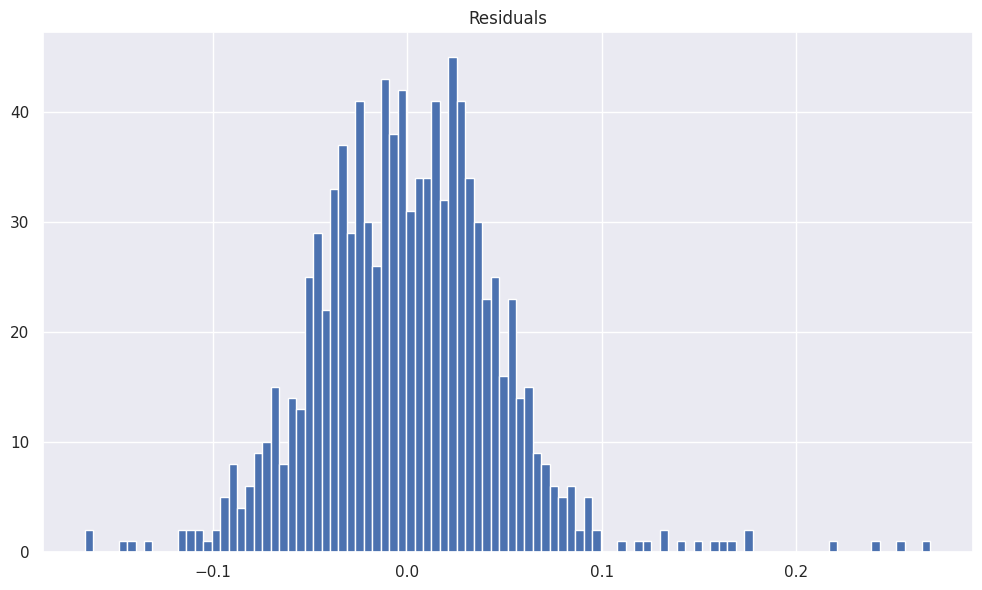

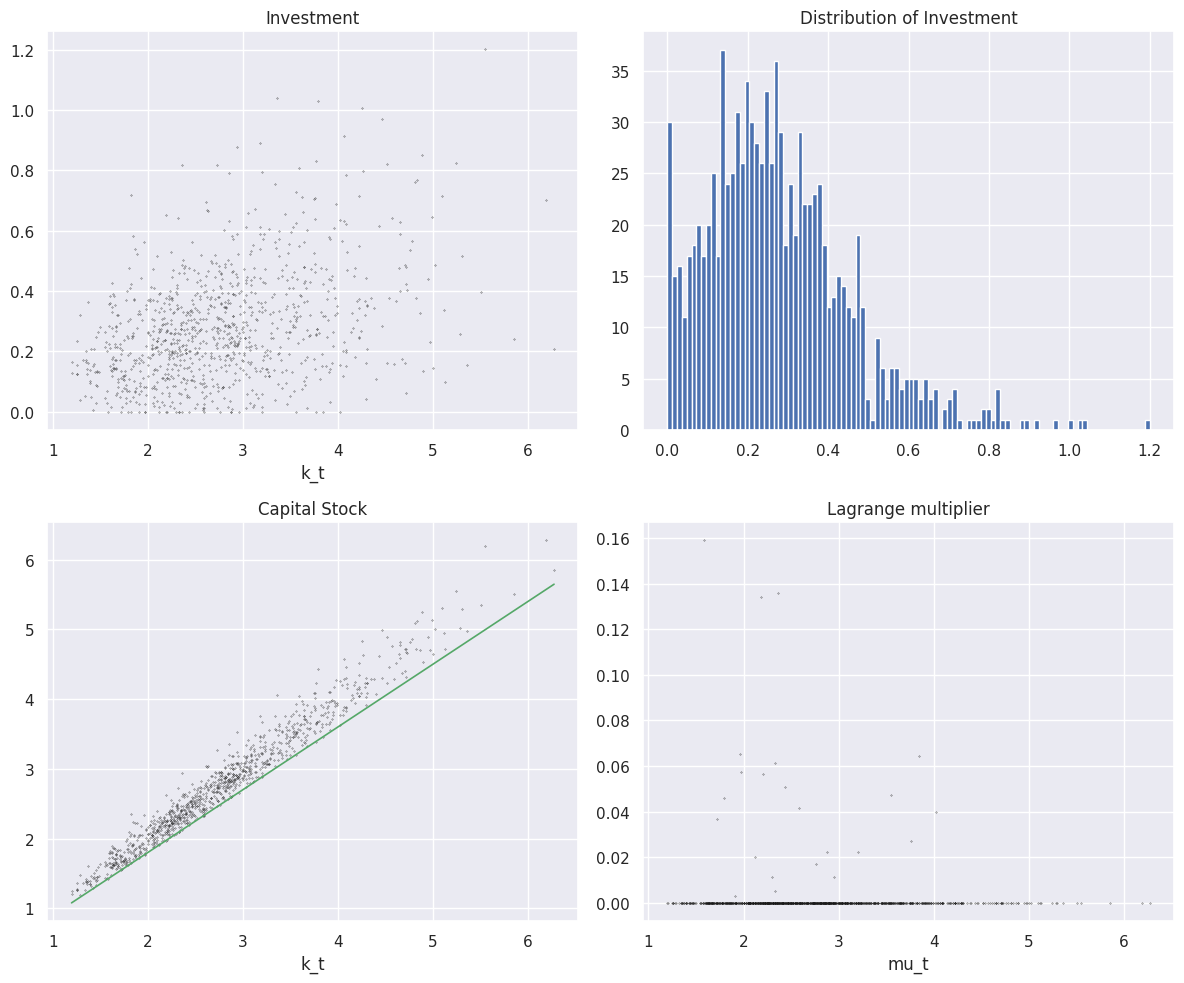

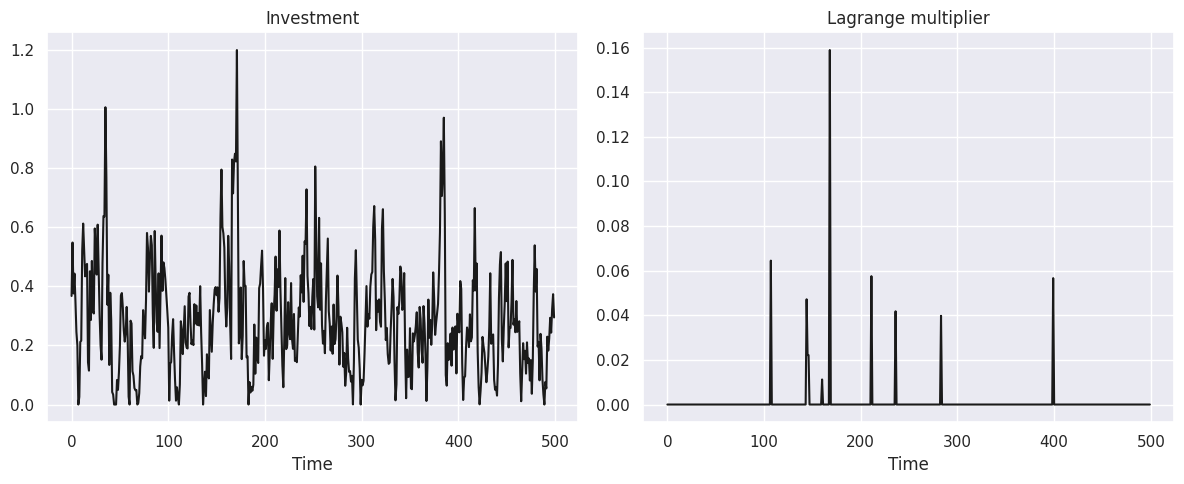

Percentage of time negative investment: 0.0
Percentage mu binds: 0.02997275204359673
Mean abs ut: 0.03463685381813911, Mean square ut: 0.002705772158286931. DHM stats: 43.79304251858716. C equivalent: [0.08625277]
  Variable      Mean    Median  Skewness       Std       Min       Max
0        k  2.798651  2.697432  0.803247  0.902651  1.198787  6.274786
1        a -0.022715 -0.018861 -0.009445  0.237898 -0.717992  0.683776
State vector draws: 10000
gradient_descent_approach: False. Optimizer: Adam. Scheduler: False. Intial b0: [-0.08090944 -0.36350296 -0.12067701  0.01735131 -0.00326675 -0.00773098
  0.00259208  0.00108524 -0.00438695 -0.00704603]
Iteration: 10	Conv. crit.: 0.0001428705112493378	 b: [-0.07812786 -0.27856185 -0.22927353  0.01570788  0.00127712 -0.00464528
  0.00217866 -0.00267676 -0.02367371  0.02614014]
Iteration: 20	Conv. crit.: 1.7447688818172935e-06	 b: [-0.07811318 -0.27830616 -0.2290911   0.01562859  0.00137357 -0.00448112
  0.00217055 -0.00268878 -0.02371721  0.0

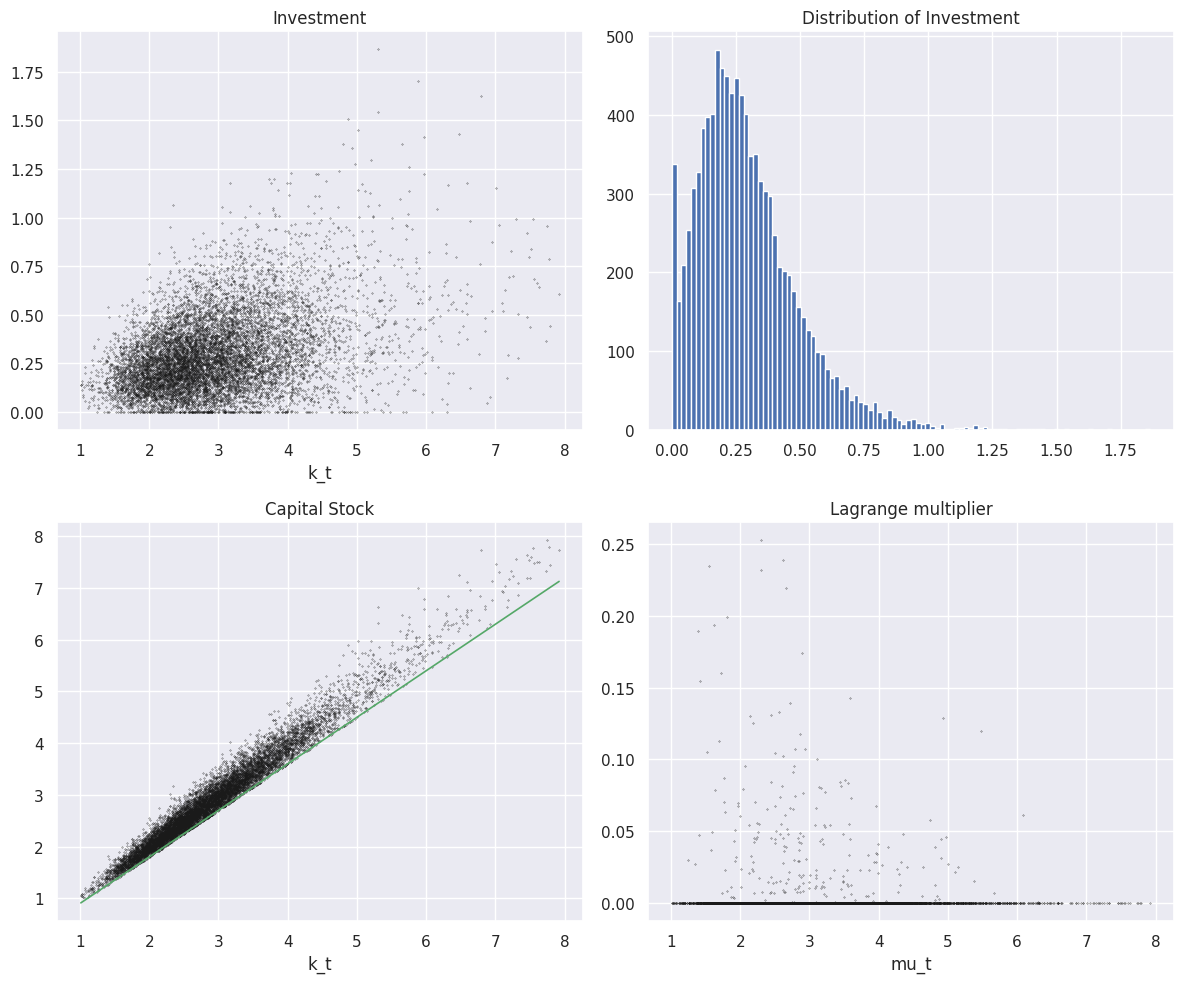

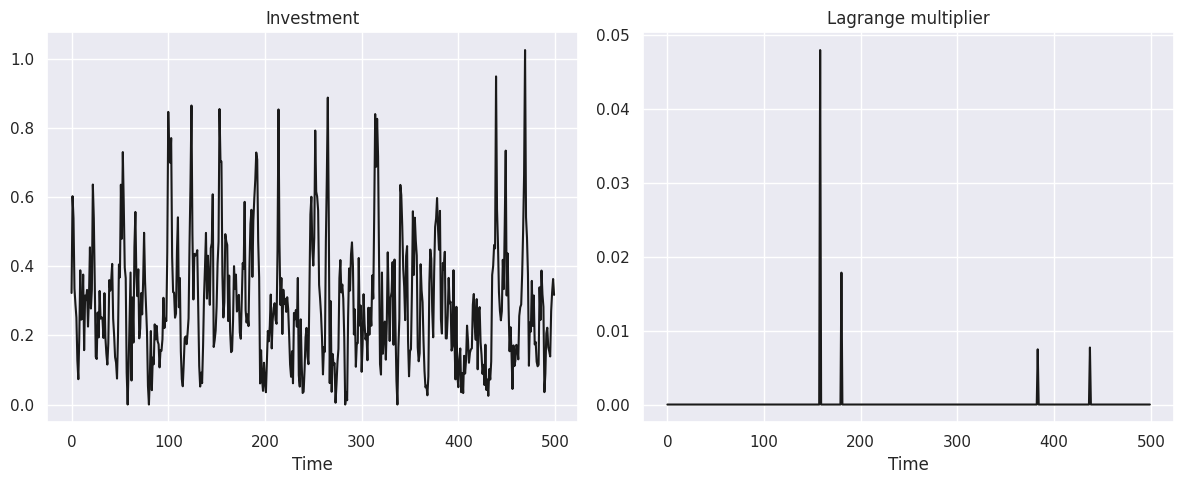

Percentage of time negative investment: 0.0
Percentage mu binds: 0.022473022473022474
Mean abs ut: 0.03455755745680705, Mean square ut: 0.0025235841418380783. DHM stats: 454.1783032371278. C equivalent: [0.27054742]
  Variable      Mean    Median  Skewness       Std       Min       Max
0        k  2.926017  2.780638  1.100408  0.930198  1.012143  7.919061
1        a  0.013733  0.012487  0.031503  0.227427 -0.858120  0.933272
State vector draws: 50000
gradient_descent_approach: False. Optimizer: Adam. Scheduler: False. Intial b0: [-0.08090944 -0.36350296 -0.12067701  0.01735131 -0.00326675 -0.00773098
  0.00259208  0.00108524 -0.00438695 -0.00704603]
Iteration: 10	Conv. crit.: 0.00013657440907255403	 b: [-0.07939117 -0.26666855 -0.2423641   0.01875489 -0.00322326 -0.00586406
  0.00226071 -0.00371633 -0.03239297  0.0379303 ]
Iteration: 20	Conv. crit.: 1.7407145326275852e-06	 b: [-0.07928236 -0.26648913 -0.24212136  0.01868306 -0.00314661 -0.00575162
  0.00224928 -0.00373201 -0.03238461  

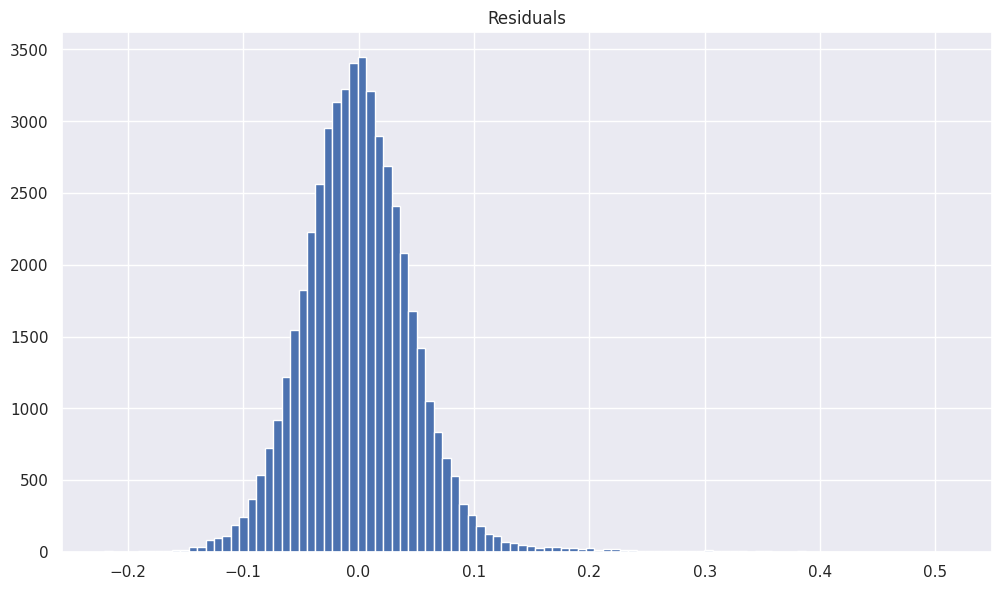

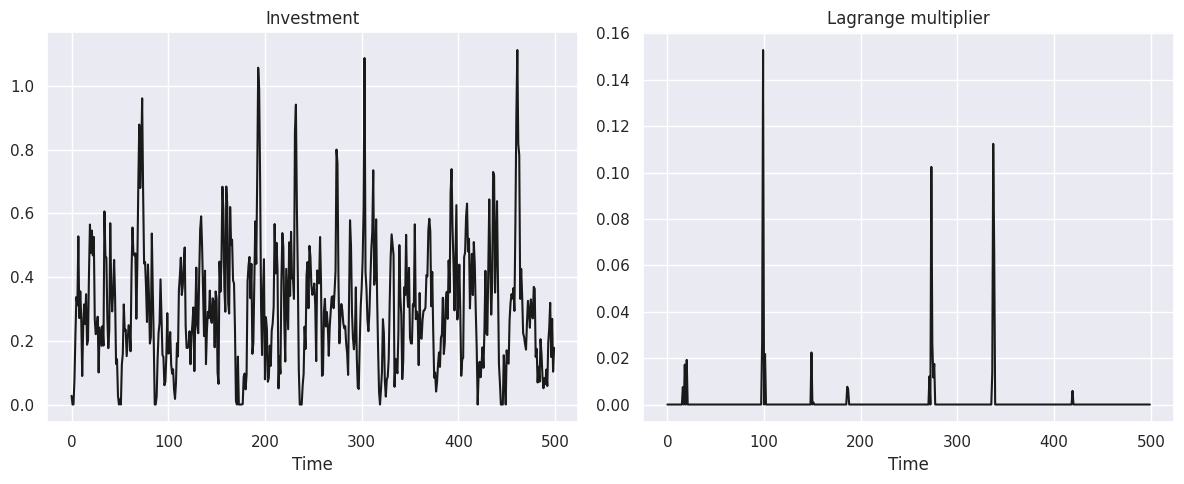

Percentage of time negative investment: 0.0
Percentage mu binds: 0.022195165765154387
Mean abs ut: 0.034918958429978095, Mean square ut: 0.002493536066081869. DHM stats: 94.2742602414781. C equivalent: [0.12238409]
  Variable      Mean    Median  Skewness       Std       Min       Max
0        k  2.873261  2.730044  1.034963  0.938632  0.896142  9.309033
1        a -0.001690 -0.002547  0.008837  0.234950 -0.985933  0.908375
State vector draws: 100000
gradient_descent_approach: False. Optimizer: Adam. Scheduler: False. Intial b0: [-0.08090944 -0.36350296 -0.12067701  0.01735131 -0.00326675 -0.00773098
  0.00259208  0.00108524 -0.00438695 -0.00704603]
Iteration: 10	Conv. crit.: 0.00011251274745410766	 b: [-0.07880282 -0.27773306 -0.23359521  0.01468102 -0.00198905 -0.00600129
  0.00139753 -0.00293941 -0.0236856   0.02985885]
Iteration: 20	Conv. crit.: 1.6059458217143607e-06	 b: [-0.0787978  -0.27752176 -0.23345634  0.01459699 -0.0019301  -0.00590828
  0.00139123 -0.00295521 -0.02372616  

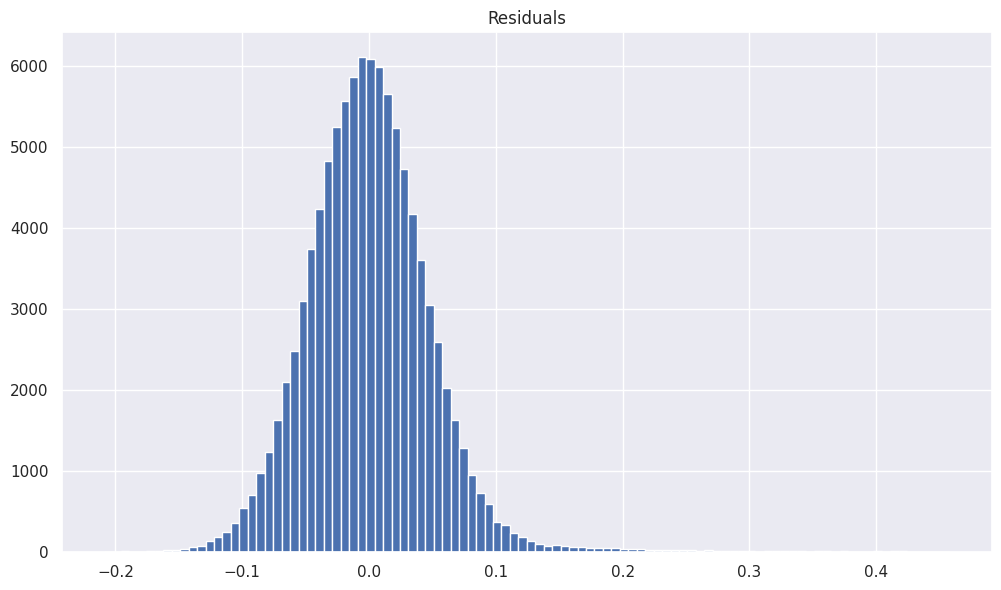

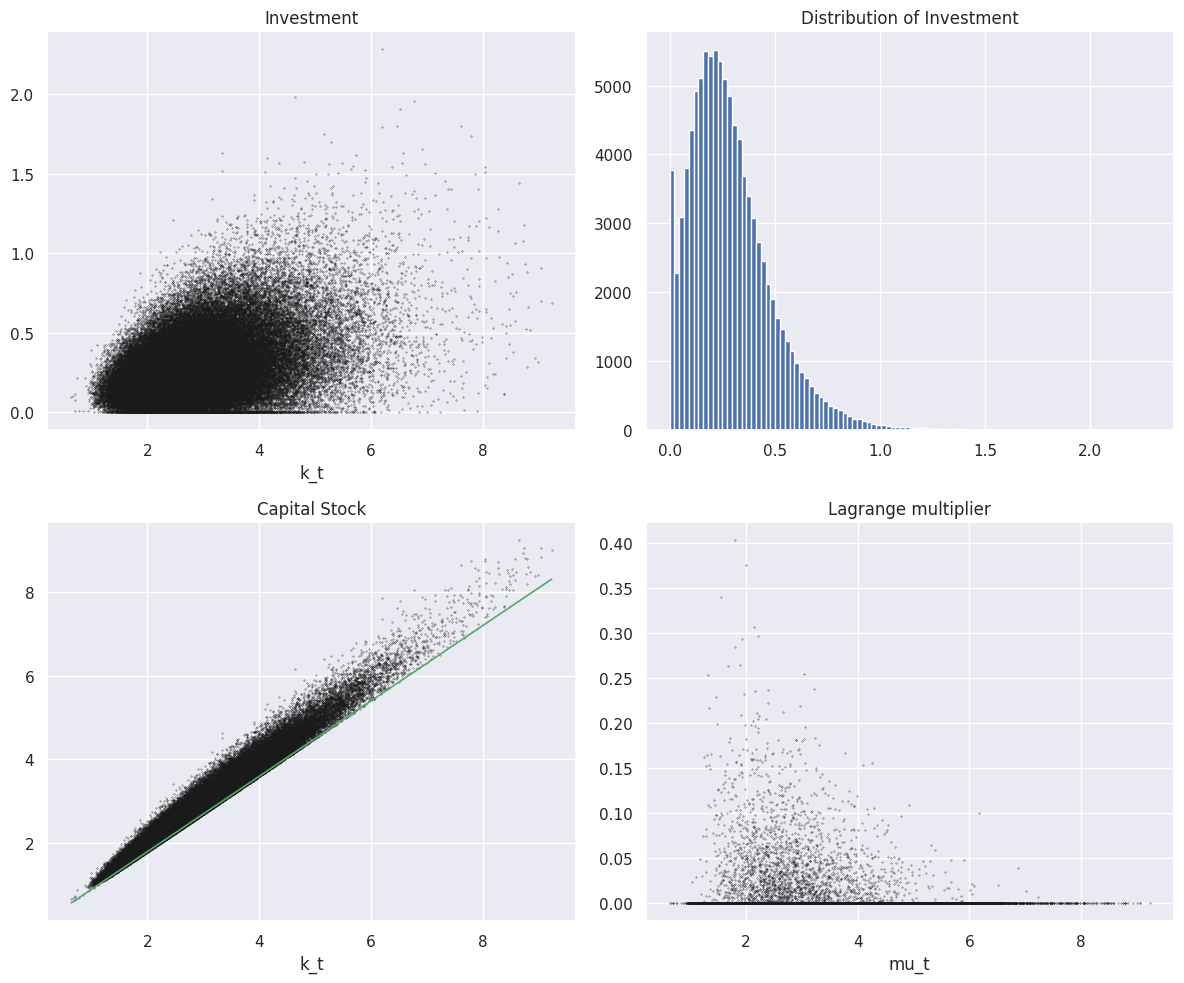

Percentage of time negative investment: 0.0
Percentage mu binds: 0.021947832688984127
Mean abs ut: 0.034988360129096396, Mean square ut: 0.0025106153492054886. DHM stats: 157.21935859151807. C equivalent: [0.15840319]
  Variable      Mean    Median  Skewness       Std       Min       Max
0        k  2.891547  2.744255  1.069009  0.949045  0.638478  9.228621
1        a  0.003116  0.002756  0.026210  0.234556 -0.980743  1.058508
    k       M  N    DHM_stat           C_equivalent       MSE
0  10    1000  1   43.793043   [0.0862527722722264]  0.002250
1  10   10000  1  454.178303   [0.2705474185751958]  0.002318
2  10   50000  1   94.274260  [0.12238408781138674]  0.002404
3  10  100000  1  157.219359  [0.15840319312078938]  0.002385


In [25]:
# Usual PEA
tol = 1e-6
gam = 1.0
init = 100 #burnin

results_standard_PEA = []
slong_test = 200000
e_test = params.std_tfp * np.random.randn(slong_test)

# Try for different number of state draws:
for long in [1000, 10000, 50000, 100000]:
    slong = init + long
    print(f"State vector draws: {long}")

    # SS value. Use mean values on the simulation
    k_ss = SS_values[SS_values["Variable"] == "k"]["MeanValue"].item()
    a_ss = 0
    c_ss = SS_values[SS_values["Variable"] == "c"]["MeanValue"].item()

    # To ensure consumption is a least tol_c
    E_max = params.tol_c**(-params.gamma)

    # Also, define the index arrays T and T1
    T = np.arange(init, slong-2) # current period
    T1 = np.arange(init+1, slong-1) # forward by one period. Drop last period, for which mu is not calculated

    # Compute initial conditions:
    print(f"gradient_descent_approach: {params.gradient_descent_approach}. Optimizer: {params.optimizer}. Scheduler: {params.use_scheduler}. Intial b0: {coeff_array_0}")
    b0 = coeff_array_0.copy()

    # If using ADAM, need to initialize
    adam_state  = init_adam(len(coeff_array_0))

    # Generate shocks: e is a vector of size slong with normally distributed shocks scaled by se
    e = params.std_tfp * np.random.randn(slong)

    # Initialize a as a vector of zeros
    a = np.zeros(slong)

    # Set the first element of a
    a[0] = a_ss

    # Generate the AR(1) process for a
    for i in range(1, slong):
        a[i] = params.rho_tfp * a[i-1] + e[i]

    # Initialize iteration counter and convergence criterion
    iteration = 1
    crit = np.inf  # set to a large number initially

    #while crit > tol:
    while iteration < 50: #max_iter:
        k = np.zeros(slong + 1)
        c = np.zeros(slong)
        inv = np.zeros(slong)
        production = np.zeros(slong)
        X = np.zeros((slong, len(b0)))
        cash = np.zeros(slong)
        mu = np.zeros(slong + 1) #Lagrange multiplier

        # Set initial capital:
        k[0] = k_ss

        # Simulate the path:
        for i in range(slong):
            # Construct the regressors at time i.
            """
            x1, x2 = create_x1_x2_jit(k[i], a[i],
                                params.type_x1_x2,
                                params.kss, params.std_k,
                                params.log_kss, params.std_log_k,
                                params.std_a, params.multiplier_normalization)
            """
            x1, x2 = create_x1_x2_fast_jit(k[i], a[i],
                                params.type_x1_x2,
                                params.kss, params.inv_den_k,
                                params.log_kss, params.inv_den_logk,
                                params.inv_den_a)

            fill_X_row(X, i, x1, x2, params.nb_expl_vars, params.basis)

            # Ouptut
            production[i] = np.exp(a[i]) * (k[i]**params.alpha)
            # Cash on hand: production + capital from last period
            cash[i] =  production[i] + (1 - params.delta) * k[i]

            # Update capital for the next period using the model's law of motion
            # Consumption, assuming current constraint on investment does not bind
            if cond_exp_chosen == 7:
                #E_t_tilde = np.clip(np.exp(np.dot(X[i, :], b0)), production[i]**(-params.gamma), E_max)
                E_t_tilde = np.exp(np.dot(X[i, :], b0))
                c[i] = E_t_tilde ** (-1/params.gamma)
            else:
                print(f"cond_exp_chosen : {cond_exp_chosen} not implemented yet)")

            # Update guess, after calculating investmen
            inv[i] = production[i] - c[i]
            if inv[i] > 0:
                k[i+1] = cash[i] - c[i]
            else:
                k[i+1] = (1 - params.delta) * k[i]
                c[i] = production[i]
                mu[i] = c[i]**( - params.gamma ) - E_t_tilde

        # Construct the vector y using the simulated paths (vectorized operation)
        if cond_exp_chosen == 7:
            y = np.log(params.beta * ( ( c[T1]**(-params.gamma) ) * (params.alpha * np.exp(a[T1]) * k[T1] ** (params.alpha - 1) + 1 - params.delta) + mu[T1] * ( 1 - params.delta) ) )

        # Solve the regression: log(y) = X(T,:) * bt in a least-squares sense.
        # np.linalg.lstsq returns a tuple; the first element is the solution.
        y_reg = y
        X_reg = X[T, :]

        if params.gradient_descent_approach == False:
            # Solve the regression: log(y) = X(T,:) * bt in a least-squares sense.
            # np.linalg.lstsq returns a tuple; the first element is the solution.
            bt, _, _, _ = np.linalg.lstsq(X_reg, y_reg, rcond=None)

            # Update b using a smoothing parameter gam:
            b = gam * bt + (1 - gam) * b0
        else:
            ### Gradient-descent approach
            b, adam_state = update_b_gradient_based(params, X_reg, y_reg, b0, adam_state, iteration)

        # Compute convergence criterion (maximum absolute change in b)
        crit = np.max(np.abs(b - b0))

        # Update b0 for the next iteration
        b0 = b.copy()

        # Display current iteration and convergence criterion
        if (iteration % 10 == 0):
            print(f"Iteration: {iteration}\tConv. crit.: {crit}\t b: {b}")

        iteration += 1

    # residual
    Res = y_reg - np.dot(X[T, :], b0)
    MSE = np.mean(Res ** 2)

    # =============================================================================
    # Plotting results
    # =============================================================================
    # 1. Plot histogram of residuals
    plt.figure()
    plt.hist(Res, bins=100)
    plt.title('Residuals', fontname='Times', fontsize=12)

    # 2. Compute investment deviations: it = k[T1] - (1-delta)*k[T]
    it = k[T1] - (1 - params.delta) * k[T]

    # Create a 2x2 figure for several plots
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    # Investment scatter plot
    axs[0, 0].plot(k[T], it, '.', markersize=0.5, color='k')
    axs[0, 0].set_xlabel('k_t', fontname='Times', fontsize=12)
    axs[0, 0].set_title('Investment', fontname='Times', fontsize=12)

    # Histogram of investment
    axs[0, 1].hist(it, bins=100)
    axs[0, 1].set_title('Distribution of Investment', fontname='Times', fontsize=12)

    # Capital stock: plot k[T] vs. k[T1] and add 45° reference line (scaled by (1-delta))
    axs[1, 0].plot(k[T], k[T1], '.', markersize=0.5, color='k')
    x_line = np.linspace(np.min(k[T]), np.max(k[T]), 100)
    axs[1, 0].plot(x_line, (1 - params.delta) * x_line, '-', linewidth=1.2, color='g')
    axs[1, 0].set_xlabel('k_t', fontname='Times', fontsize=12)
    axs[1, 0].set_title('Capital Stock', fontname='Times', fontsize=12)

    # Lagrange multiplier
    axs[1, 1].plot(k[T], mu[T], '.', markersize=0.5, color='k')
    axs[1, 1].set_xlabel('mu_t', fontname='Times', fontsize=12)
    axs[1, 1].set_title('Lagrange multiplier', fontname='Times', fontsize=12)

    plt.tight_layout()


    # 3. Time series plots for a subset
    T0 = np.arange(100, 600)
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))
    axs[0].plot(it[T0], 'k')
    axs[0].set_xlabel('Time', fontname='Times', fontsize=12)
    axs[0].set_title('Investment', fontname='Times', fontsize=12)

    axs[1].plot(mu[T0], 'k')
    axs[1].set_xlabel('Time', fontname='Times', fontsize=12)
    axs[1].set_title('Lagrange multiplier', fontname='Times', fontsize=12)

    plt.tight_layout()
    plt.show()

    percentage_negative_investment = len(it[it < 0])/len(it)
    print(f"Percentage of time negative investment: {percentage_negative_investment}")

    percentage_mu_binds = len(mu[mu > 0])/len(mu)
    print(f"Percentage mu binds: {percentage_mu_binds}")

    mean_abs_ut, mean_square_ut, std_ut, dhm_stat, c_equivalent = dhm_accuracy_test(params, b0, e_test)
    print(f"Mean abs ut: {mean_abs_ut}, Mean square ut: {mean_square_ut}. DHM stats: {dhm_stat}. C equivalent: {c_equivalent}")

    # Store the results in a dictionary
    results_standard_PEA.append({
        "k": params.nb_expl_vars,
        "M": long,
        "N": 1,
        "DHM_stat": dhm_stat,
        "C_equivalent": c_equivalent,
        "MSE": MSE})

    # Summary stats on k_t
    df_stats = summarize_k_a(k, a)
    print(df_stats)

    # Slices around ss
    plot_consumption_slices(
                params,
                mean_k=df_stats[df_stats["Variable"] == "k"]["Mean"].item(),
                std_k=df_stats[df_stats["Variable"] == "k"]["Std"].item(),
                a_ss=0.0,
                std_a=params.std_a,
                b0=b0,
                coeff_array_0=coeff_array_0,
                cond_exp_chosen=7,
                nb_stdev=2,
                nb_points=1000)

# Create a Pandas DataFrame from the results
df_results_standard_PEA_M = pd.DataFrame(results_standard_PEA)
df_results_standard_PEA_M.to_csv(output_folder + "df_results_standard_PEA_M.csv")
print(df_results_standard_PEA_M.head())


In [26]:
df_stats.to_csv(output_folder + "summary_stats_binding.csv")

# Save final plot to disk:
plot_consumption_slices(
    params,
    mean_k=df_stats[df_stats["Variable"] == "k"]["Mean"].item(),
    std_k=df_stats[df_stats["Variable"] == "k"]["Std"].item(),
    a_ss=0.0,
    std_a=params.std_a,
    b0=b0,
    coeff_array_0=coeff_array_0,
    cond_exp_chosen=7,
    nb_stdev=2,
    nb_points=500,
    show_initial_guess=False,
    fig_name= output_folder + "consumption_slice.pdf"
)

In [27]:
list_M = df_results_standard_PEA_M["M"]
ref_index_plot = 0

fig, axs = plt.subplots(1, 3, figsize=(12, 5))
axs[0].plot(list_M, df_results_standard_PEA_M["DHM_stat"])
axs[0].plot(list_M, df_results_standard_PEA_M["DHM_stat"][ref_index_plot]*(list_M[ref_index_plot]/list_M), linestyle='--', label='1/N decay')
axs[0].set_xlabel('DHM stat', fontname='Times', fontsize=12)
axs[0].set_title('DHM stat', fontname='Times', fontsize=12)

axs[1].plot(list_M, np.abs(df_results_standard_PEA_M["C_equivalent"]))
axs[1].plot(list_M, np.abs(df_results_standard_PEA_M["C_equivalent"])[ref_index_plot]*(list_M[ref_index_plot]/list_M), linestyle='--', label='1/N decay')
axs[1].set_xlabel('% C equivalent', fontname='Times', fontsize=12)
axs[1].set_title('% C equivalent', fontname='Times', fontsize=12)

axs[2].plot(df_results_standard_PEA_M["M"], np.abs(df_results_standard_PEA_M["MSE"]))
#axs[2].plot(list_M, np.abs(df_results_standard_PEA_M["MSE"])[ref_index_plot]*(list_M[ref_index_plot]/list_M), linestyle='--', label='1/N decay')
axs[2].set_xlabel('MSE', fontname='Times', fontsize=12)
axs[2].set_title('In-sample MSE', fontname='Times', fontsize=12)

plt.tight_layout()
plt.show()

#### II.C.2 bc-MC-PEA

Use several innovation draws per state vector

In [28]:
@njit
def generate_random_innovations(slong, N, std):
    """
    Generate 1d innovatio N(0, std^2)
    """
    e = np.empty(slong)
    for i in range(slong):
        e[i] = std * np.random.randn()
    return e

@njit
def generate_random_arrays(slong, N, std):
    """
    Generate 1d innovation N(0, std^2) and random array, where each row is N(0, std^2).
    """
    e = np.empty(slong)
    E = np.empty((slong, N))
    for i in range(slong):
        e[i] = std * np.random.randn()
        for j in range(N):
            E[i, j] = std * np.random.randn()
    return e, E


def create_plots(list_N, MSE_N, Time_N, mean_square_ut_N, dhm_stat_N, c_equivalent_N, label = "N", ref_index_plot=0):
    """
    Creates two sets of plots:

    1. A figure with two subplots:
       - Left: MSE vs. N, along with 1/N and 1/sqrt(N) decay lines.
       - Right: Elapsed Time vs. N, along with 1*N and 1*sqrt(N) increase lines.

    2. A second figure with four subplots (2x2 grid):
       - Top-left: Mean (ut)^2 vs. N with a 1/sqrt(N) decay line.
       - Top-right: DHM Stats vs. N with a 1/sqrt(N) decay line.
       - Bottom-left: % C equivalent vs. N with a 1/sqrt(N) decay line.
       - Bottom-right: In sample MSE vs. N with a 1/N decay line.

    Parameters:
        list_N         : array-like, values of N (Number of Innovation Draws)
        MSE_N          : array-like, Mean Squared Error for each N
        Time_N         : array-like, elapsed time (seconds) for each N
        mean_square_ut_N: array-like, mean (ut)^2 for each N
        dhm_stat_N     : array-like, DHM statistic for each N
        c_equivalent_N : array-like, % C equivalent for each N
        ref_index_plot : int, reference index for plotting the decay/increase lines (default 0)
    """
    list_N = np.array(list_N)  # ensure numpy array for elementwise operations

    # -----------------------
    # Figure 1: Two subplots side-by-side.
    fig1, axs = plt.subplots(1, 2, figsize=(12, 5))

    # Left panel: MSE vs. N.
    axs[0].plot(list_N, MSE_N, marker='o', linestyle='-', label='MSE')
    axs[0].plot(list_N, MSE_N[ref_index_plot] * (list_N[ref_index_plot] / list_N),
                marker='o', linestyle='--', label='1/N decay')
    axs[0].plot(list_N, MSE_N[ref_index_plot] * np.sqrt(list_N[ref_index_plot] / list_N),
                marker='o', linestyle='--', label='1/sqrt(N) decay')
    axs[0].set_xlabel(label)
    axs[0].set_ylabel('Mean Squared Error')
    axs[0].set_title(f'MSE vs. {label}')
    axs[0].grid(True)
    axs[0].legend()

    # Right panel: Elapsed Time vs. N.
    axs[1].plot(list_N, Time_N, marker='o', linestyle='-', color='orange', label='Elapsed Time (s)')
    #axs[1].plot(list_N, Time_N[ref_index_plot] * (list_N / list_N[ref_index_plot]),
    #            marker='o', linestyle='--', label='1*N increase')
    #axs[1].plot(list_N, Time_N[ref_index_plot] * np.sqrt(list_N / list_N[ref_index_plot]),
    #            marker='o', linestyle='--', label='1*sqrt(N) increase')
    axs[1].set_xlabel('label')
    axs[1].set_ylabel('Elapsed Time (seconds)')
    axs[1].set_title(f'Elapsed Time vs. {label}')
    axs[1].grid(True)
    axs[1].legend()

    plt.tight_layout()
    plt.show()

    # -----------------------
    # Figure 2: Four subplots in a 2x2 grid.
    fig2, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 5))

    # Top-left: Mean (ut)^2 vs. N.
    ax1.plot(list_N, mean_square_ut_N, marker='o', linestyle='-')
    ax1.plot(list_N, mean_square_ut_N[ref_index_plot] * np.power(list_N[ref_index_plot] / list_N, 0.5),
             marker='o', linestyle='--', label='1/sqrt(N) decay')
    ax1.set_xlabel(label)
    ax1.set_ylabel('Mean (ut)^2')
    ax1.set_title('Mean (ut)^2')
    ax1.grid(True)
    ax1.legend()

    # Top-right: DHM Stats vs. N.
    ax2.plot(list_N, dhm_stat_N, marker='o', linestyle='-', color='orange')
    ax2.plot(list_N, dhm_stat_N[ref_index_plot] * np.sqrt(list_N[ref_index_plot] / list_N),
             marker='o', linestyle='--', label='1/sqrt(N) decay')
    ax2.set_xlabel(label)
    ax2.set_ylabel('DHM Stats')
    ax2.set_title('DHM Stats')
    ax2.grid(True)
    ax2.legend()

    # Bottom-left: % C equivalent vs. N.
    ax3.plot(list_N, c_equivalent_N, marker='o', linestyle='-', color='orange')
    ax3.plot(list_N, c_equivalent_N[ref_index_plot] * np.sqrt(list_N[ref_index_plot] / list_N),
             marker='o', linestyle='--', label='1/sqrt(N) decay')
    ax3.set_xlabel(label)
    ax3.set_ylabel('% C equivalent')
    ax3.set_title('% C equivalent')
    ax3.grid(True)
    ax3.legend()

    # Bottom-right: In sample MSE vs. N.
    ax4.plot(list_N, MSE_N, marker='o', linestyle='-', label='In sample MSE')
    ax4.plot(list_N, MSE_N[ref_index_plot] * (list_N[ref_index_plot] / list_N),
             marker='o', linestyle='--', label='1/N decay')
    ax4.set_xlabel(label)
    ax4.set_ylabel('% In sample MSE')
    ax4.set_title('% In sample MSE')
    ax4.grid(True)
    ax4.legend()

    plt.tight_layout()
    plt.show()

In [29]:
@njit
def clamp(arr, low, high):
    """
    Element-wise clamp of `arr` between `low` and `high`.
    Equivalent to np.clip(arr, low, high). np.clip has trouble with jit compilation.
    """
    return np.minimum(np.maximum(arr, low), high)


@njit
def fill_X_next(Xv, x1, x2, nb_expl_vars, basis):
    """
    In‐place fill of Xv (shape = (nb_expl_vars,)) for a single point (x1,x2),
    using monomial basis (basis=1) or Chebyshev basis (basis=2),
    with nb_expl_vars in {4,6,10}.
    """
    # 4‐term cross basis
    if nb_expl_vars == 4:
        Xv[0] = 1.0
        Xv[1] = x1
        Xv[2] = x2
        Xv[3] = x1 * x2
        return

    if basis == 1:
        # —— Monomial ——
        if nb_expl_vars == 6:
            # [1, x1, x2, x1*x2, x1^2, x2^2]
            Xv[0] = 1.0
            Xv[1] = x1
            Xv[2] = x2
            Xv[3] = x1 * x2
            Xv[4] = x1 * x1
            Xv[5] = x2 * x2
            return
        else:
            # nb_expl_vars == 10
            # [1, x1, x2, x1*x2, x1^2, x2^2, x1^3, x1^2*x2, x1*x2^2, x2^3]
            Xv[0] = 1.0
            Xv[1] = x1
            Xv[2] = x2
            Xv[3] = x1 * x2
            Xv[4] = x1 * x1
            Xv[5] = x2 * x2
            Xv[6] = x1 * x1 * x1
            Xv[7] = x1 * x1 * x2
            Xv[8] = x1 * x2 * x2
            Xv[9] = x2 * x2 * x2
            return

    else:
        # —— Chebyshev ——
        if nb_expl_vars == 6:
            # [1, x1, x2, x1*x2, x1^2-1, x2^2-1]
            Xv[0] = 1.0
            Xv[1] = x1
            Xv[2] = x2
            Xv[3] = x1 * x2
            Xv[4] = x1 * x1 - 1.0
            Xv[5] = x2 * x2 - 1.0
            return
        else:
            # nb_expl_vars == 10
            # [1, x1, x2, x1*x2, x1^2-1, x2^2-1,
            #  4x1^3-3x1, 4x2^3-3x2, (x1^2-1)*x2, x1*(x2^2-1)]
            Xv[0] = 1.0
            Xv[1] = x1
            Xv[2] = x2
            Xv[3] = x1 * x2
            Xv[4] = x1 * x1 - 1.0
            Xv[5] = x2 * x2 - 1.0
            Xv[6] = 4.0*x1*x1*x1 - 3.0*x1
            Xv[7] = 4.0*x2*x2*x2 - 3.0*x2
            Xv[8] = (x1*x1 - 1.0) * x2
            Xv[9] = x1 * (x2*x2 - 1.0)
            return


@njit
def simulate_path_N(slong, kss, e, E, b0, beta, gamma, alpha, delta, rho_tfp, N, nb_expl_vars, tol_c,
                    type_x1_x2,
                    mean_k, inv_den_k,
                    mean_log_k, inv_den_logk,
                    inv_den_a):
    """
    Simulates the model path period by period.

    Parameters:
        slong   : total number of simulation periods (integer)
        kss     : steady state capital (float)
        e       : array of nnovations of shape (slong)
        E       : array of extra innovations of shape (slong, N)
        b0      : coefficient vector (array of length 6)
        beta    : discount factor (float)
        gamma   : CRRA coefficient (float)
        alpha   : production elasticity (float)
        delta   : depreciation rate (float)
        rho_tfp : AR(1) coefficient for TFP (float)
        N       : number of innovations per period (integer)
        ...
    """
    # Preallocate arrays
    a = np.zeros(slong)
    k      = np.zeros(slong + 1)    # capital path (slong+1 because we update k[i+1])
    mu     = np.zeros(slong + 1)    # Lagrange multiplier on investment constraint
    y      = np.zeros(slong)        # simulated y
    production = np.zeros(slong)    # production
    inv = np.zeros(slong)           # investment
    cash     = np.zeros(slong)      # cash in hand
    c = np.zeros(slong)             # consumption
    X      = np.zeros((slong, nb_expl_vars))   # regressor matrix (6 variables)
    X_next = np.zeros(nb_expl_vars) # regressor, next period
    y_temp = np.zeros(N)            # temporary array for innovations

    # To ensure consumption is a least tol_c
    E_max = tol_c**(-gamma)

    # Initialize state.
    k[0] = kss
    a[0] = 0.0
    for i in range(1, slong):
        a[i] = rho_tfp * a[i-1] + e[i]

    for i in range(slong):
        # Build regressor vector for current period i:
        #x1 = np.log(k[i])
        #x2 = a[i]

        x1, x2 = create_x1_x2_fast_jit(k[i], a[i],
                                type_x1_x2,
                                mean_k, inv_den_k,
                                mean_log_k, inv_den_logk,
                                inv_den_a)

        fill_X_row(X, i, x1, x2, nb_expl_vars, basis)

        production[i] = np.exp(a[i]) * k[i] ** alpha
        cash[i] = production[i] + (1 - delta) * k[i]

        # Consumption, if current constraint on investment does not bind:
        E_t_tilde = np.exp(np.dot(X[i, :], b0))
        # E_t_tilde = clamp(np.exp(np.dot(X[i, :], b0)), production[i]**(-gamma), E_max)
        c[i] = E_t_tilde ** (-1 / gamma)

        # Update guess, after calculating investment
        inv[i] = production[i] - c[i]
        if inv[i] > 0:
            k[i+1] = cash[i] - c[i]
        else:
            k[i+1] = (1 - delta) * k[i]
            c[i] = production[i]
            mu[i] = c[i]**( - gamma ) - E_t_tilde

        # Move to next period
        ## precalculate too avoid repeated calculations
        term1 = alpha * (k[i+1]**(alpha - 1))
        term2 = k[i+1] ** alpha
        a_tilde = rho_tfp * a[i]

        #x1_next = np.log(k[i+1])
        x1_next = create_x1_fast_jit(k[i+1], type_x1_x2, mean_k, inv_den_k, mean_log_k, inv_den_logk)

        # For each of the N innovations compute a simulated realization for y
        for j in range(N):
            # Next period's TFP shock
            a_next = a_tilde + E[i, j]

            # production next period:
            production_next = np.exp(a_next) * term2

            ## Without repeated calculations
            # Build regressor for next period using k[i+1] and a_next
            #x2_next = a_next
            x2_next = create_x2_fast_jit(a_next, type_x1_x2, inv_den_a)

            fill_X_next(X_next, x1_next, x2_next, nb_expl_vars, basis)

            #c_next = np.maximum(tol_c, css*(1 + np.dot(X_next, b0))**(-1/gamma))
            E_next_tilde = np.exp(np.dot(X_next, b0))
            #E_next_tilde = clamp(np.dot(X_next, b0), production_next**(-gamma), E_max)
            c_next = E_next_tilde ** (-1 / gamma)

            # Update guess, after calculating investment
            inv_next = production_next - c_next
            if inv_next > 0:
                # non-binding
                mu_next = 0
            else:
                # binding
                c_next = production_next
                mu_next = c_next**( - gamma ) - E_next_tilde

            ## g2(s,e)
            y_temp[j] =  ( c_next**(-gamma) ) * (np.exp(a_next) * term1 + 1.0 - delta ) + mu_next * (1.0 - delta)

        # Average the N innovations to form the simulated y for period i
        s = 0.0
        for j in range(N):
            s += y_temp[j]

        # Sample average to proxy an expectation:
        y[i] = np.log( beta * (s / N) )

    return X, y


@njit
def simulate_path_N_inplace(
    M: int,
    init: int,
    kss: float,
    e: np.ndarray,
    E: np.ndarray,
    b0: np.ndarray,
    beta: float,
    gamma: float,
    alpha: float,
    delta: float,
    rho_tfp: float,
    N: int,
    nb_expl_vars: int,
    tol_c: float,
    basis: int,
    type_x1_x2: int,
    mean_k: float,
    inv_den_k: float,
    mean_log_k: float,
    inv_den_logk: float,
    inv_den_a: float,
    a: np.ndarray,
    k: np.ndarray,
    mu: np.ndarray,
    y: np.ndarray,
    production: np.ndarray,
    inv: np.ndarray,
    cash: np.ndarray,
    c: np.ndarray,
    X: np.ndarray,
    X_next: np.ndarray,
    y_temp: np.ndarray
) -> None:
    """
    Simulates one path of the neoclassical growth model using a Parameterized Expectations Algorithm (PEA)
    with in-place mutation of pre-allocated arrays. JIT-compiled with numba for maximum performance.

    All outputs are written directly into the provided arrays; no value is returned.
    """
    slong = M + init

    # To ensure consumption is a least tol_c
    E_max = tol_c**(-gamma)

    # Set value for constant vector
    X[:, 0] = 1.0

    # Initialize state
    k[0] = kss
    a[0] = 0.0
    for i in range(1, slong):
        a[i] = rho_tfp * a[i-1] + e[i]

    for i in range(0, slong):
        # Compute regressors x1, x2
        #x1 = np.log(k[i])
        #x2 = a[i]

        x1, x2 = create_x1_x2_fast_jit(k[i], a[i],
                                type_x1_x2,
                                mean_k, inv_den_k,
                                mean_log_k, inv_den_logk,
                                inv_den_a)

        # Fill in X[i] for OLS regression y = X*b
        fill_X_row(X, i, x1, x2, nb_expl_vars, basis)

        # Cash-in-hand and consumption decision
        production[i] = np.exp(a[i]) * k[i] ** alpha
        cash[i] = production[i] + (1 - delta) * k[i]

        # Consumption, if current constraint on investment does not bind:
        ## Dot product
        scalar = np.dot(X[i, :], b0)

        #E_t_tilde = clamp(np.exp(scalar), production[i]**(-gamma), E_max)
        E_t_tilde = np.exp(scalar)
        c[i] = E_t_tilde ** (-1 / gamma)

        # Update guess, after calculating investment
        inv[i] = production[i] - c[i]
        if inv[i] > 0:
            k[i+1] = cash[i] - c[i]
            mu[i] = 0.0
        else:
            k[i+1] = (1 - delta) * k[i]
            c[i] = production[i]
            mu[i] = c[i]**( - gamma ) - E_t_tilde

        # Only do MC expectation for i >= init. No need for burnin phase
        if i >= init:
            # Prepare next-period terms (precalculation of terms that do not depend on j)
            term1 = alpha * k[i+1]**(alpha - 1.0)
            term2 = k[i+1] ** alpha
            a_tilde = rho_tfp * a[i]

            #x1_next = np.log(k[i+1])
            x1_next = create_x1_fast_jit(k[i+1], type_x1_x2, mean_k, inv_den_k, mean_log_k, inv_den_logk)

            # Monte Carlo expectation
            for j in range(N):
                a_next = a_tilde + E[i, j]
                # production next period:
                production_next = np.exp(a_next) * term2

                #x2_next = a_next
                x2_next = create_x2_fast_jit(a_next, type_x1_x2, inv_den_a)

                fill_X_next(X_next, x1_next, x2_next, nb_expl_vars, basis)
                scalar_next = np.dot(X_next, b0)

                # Consumption next period, assuming constraint does not bind:
                #E_next_tilde = clamp(np.exp(scalar_next), production_next ** (-gamma), E_max)
                E_next_tilde = np.exp(scalar_next)
                c_next = E_next_tilde ** (-1 / gamma)

                # Update guess, after calculating investment
                inv_next = production_next - c_next
                if inv_next > 0:
                    # non-binding
                    mu_next = 0
                else:
                    # binding
                    c_next = production_next
                    mu_next = c_next**( - gamma ) - E_next_tilde

                ## g2(s,e)
                y_temp[j] =  ( c_next**( -gamma ) ) * ( np.exp(a_next) * term1 + 1.0 - delta ) + mu_next * (1.0 - delta)

            # Final aggregation
            s = 0.0
            for j in range(N):
                s += y_temp[j]

            y[i] = np.log( beta * (s / N) )


In [30]:
@njit
def evaluate_IE_and_EEE_Gauss_path_inplace(
    slong: int,
    kss: float,
    e: np.ndarray,
    b0: np.ndarray,
    beta: float,
    gamma: float,
    alpha: float,
    delta: float,
    rho_tfp: float,
    number_nodes: int,
    quadrature_nodes: np.ndarray,
    quadrature_weights: np.ndarray,
    nb_expl_vars: int,
    tol_c: float,
    basis: int,
    type_x1_x2: int,
    mean_k: float,
    inv_den_k: float,
    mean_log_k: float,
    inv_den_logk: float,
    inv_den_a: float,
    # Preallocated arrays for in-place mutation:
    a: np.ndarray,            # shape (slong,)
    k: np.ndarray,            # shape (slong+1,)
    mu: np.ndarray,           # shape (slong+1,)
    production: np.ndarray,   # shape (slong,)
    inv: np.ndarray,          # shape (slong,)
    IE: np.ndarray,           # shape (slong,)
    EEE: np.ndarray,          # shape (slong,)
    cash: np.ndarray,         # shape (slong,)
    c: np.ndarray,            # shape (slong,)
    X: np.ndarray,            # shape (slong, nb_expl_vars)
    X_next: np.ndarray,       # shape (nb_expl_vars,)
    linear_model: np.ndarray, # shape (slong,)
    y_temp1: np.ndarray,      # shape (number_nodes,)
) -> None:

    """
    In-place computation of MSIE (IE) and Euler equation errors (EEE)
    along a single simulated path using Gauss–Hermite quadrature.

    All output arrays (a, k, IE, EEE, cash, c, X, X_next, linear_model,
    y_temp1, y_temp2) must be pre-allocated to the correct shape.
    """
    # Clear values
    a[:] = 0.0
    k[:] = 0.0
    mu[:] = 0.0
    production[:] = 0.0
    inv[:] = 0.0
    IE[:] = 0.0
    EEE[:] = 0.0
    cash[:] = 0.0
    c[:] = 0.0
    X[:,:] = 0.0
    X_next[:] = 0.0
    linear_model[:] = 0.0
    y_temp1[:] = 0.0

    # To ensure consumption is a least tol_c
    E_max = tol_c**(-gamma)

    # Set initial state
    k[0] = kss
    a[0] = 0.0

    # AR(1) TFP path
    for i in range(1, slong):
        a[i] = rho_tfp * a[i - 1] + e[i]


    # Main loop
    for i in range(slong):
        # 1) build current regressors x1,x2
        #x1 = np.log(k[i])
        #x2 = a[i]

        x1, x2 = create_x1_x2_fast_jit(k[i], a[i],
                                type_x1_x2,
                                mean_k, inv_den_k,
                                mean_log_k, inv_den_logk,
                                inv_den_a)

        # 2) fill X[i]
        fill_X_row(X, i, x1, x2, nb_expl_vars, basis)

        # 3) cash, linear prediction, consumption, and k forward
        production[i] = np.exp(a[i]) * k[i] ** alpha
        cash[i] = production[i] + (1 - delta) * k[i]

        scalar = np.dot(X[i, :], b0)

        linear_model[i] = scalar
        #E_t_tilde = clamp(np.exp(linear_model[i]), production[i]**(-gamma), E_max)
        E_t_tilde = np.exp(linear_model[i])
        c[i] = E_t_tilde ** (-1 / gamma)

        # Update guess, after calculating investment
        inv[i] = production[i] - c[i]
        if inv[i] > 0:
            k[i+1] = cash[i] - c[i]
            mu[i] = 0.0
        else:
            k[i+1] = (1 - delta) * k[i]
            c[i] = production[i]
            mu[i] = c[i]**( - gamma ) - E_t_tilde

        # Precompute next‐period quantities
        #x1_next = np.log(k[i+1])
        x1_next = create_x1_fast_jit(k[i+1], type_x1_x2, mean_k, inv_den_k, mean_log_k, inv_den_logk)

        term1 = alpha * (k[i+1] ** (alpha - 1.0))
        term2 = k[i+1] ** alpha
        a_tilde = rho_tfp * a[i]

        # 4) Quadrature loop
        for j in range(number_nodes):
            a_next = a_tilde + quadrature_nodes[j]

            # production next period:
            production_next = np.exp(a_next) * term2

            #x2_next = a_next
            x2_next = create_x2_fast_jit(a_next, type_x1_x2, inv_den_a)

            # Consumption next period, assuming constraint does not bind:
            fill_X_next(X_next, x1_next, x2_next, nb_expl_vars, basis)
            scalar_next = np.dot(X_next, b0)

            E_next_tilde = np.exp(scalar_next)
            c_next = E_next_tilde ** (-1 / gamma)

            # Update guess, after calculating investment
            inv_next = production_next - c_next
            if inv_next > 0:
                # non-binding
                mu_next = 0
            else:
                # binding
                c_next = production_next
                mu_next = c_next**( - gamma ) - E_next_tilde

            # Monte-Carlo expectation terms:
            ## RHS of Euler equation
            y_temp1[j] = beta * ( ( c_next ** ( - gamma ) ) * ( np.exp(a_next) * term1 + 1.0 - delta ) + mu_next * (1.0 - delta) )

        # 5) Weighted averages & fill IE, EEE
        s1 = 0.0
        for j in range(number_nodes):
            s1 += quadrature_weights[j] * y_temp1[j]

        #Integration error: log(E_t) - x' beta. E_t calculated using Gaussian intergration.
        IE[i]  = np.log(s1) - linear_model[i]
        #Euler equation error: 1 - (1/c_t)*(E_t()^{-1/gamma})
        EEE[i] = 1.0 - (1.0 / c[i]) * ( ( s1  + mu[i] ) **(-1.0 / gamma))



Final b: [5.69026701e-05 5.30297387e-05]
Final f(b): 6.050067055675364e-09


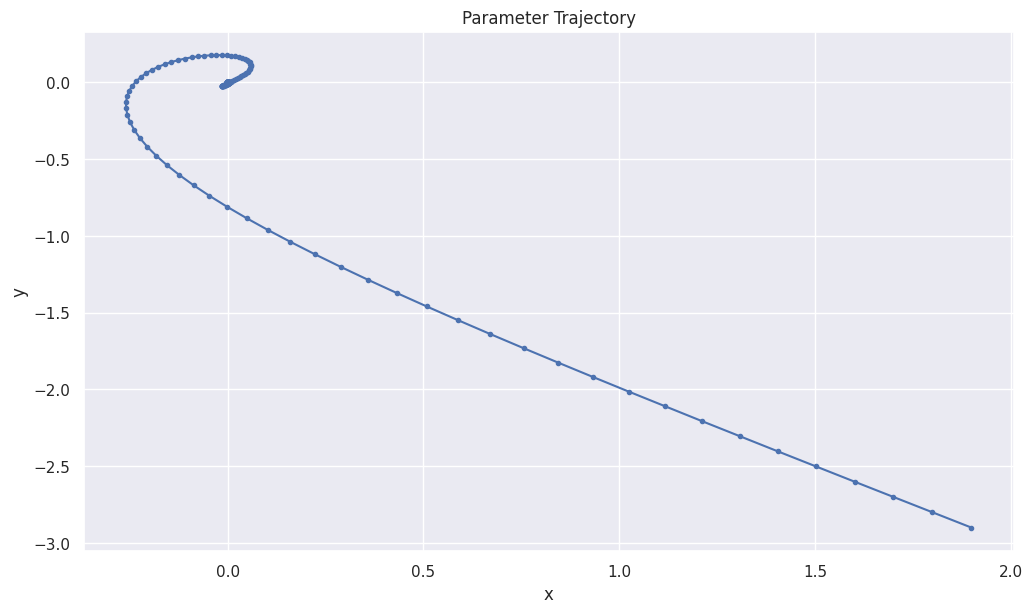

In [31]:
# Jit-compiled version for Adam
@njit
def init_adam_state(n_params):
    m = np.zeros(n_params, dtype=np.float64)
    v = np.zeros(n_params, dtype=np.float64)
    t = 0
    return m, v, t

@njit
def adam_step_jit(b, grad, m, v, t, lr, beta1, beta2, eps):
    t += 1
    # update biased moments
    for i in range(b.shape[0]):
        m[i] = beta1 * m[i] + (1 - beta1) * grad[i]
        v[i] = beta2 * v[i] + (1 - beta2) * grad[i] * grad[i]
    # bias corrections
    bias_c1 = 1 - beta1**t
    bias_c2 = 1 - beta2**t
    # parameter update
    b_new = np.empty_like(b)
    for i in range(b.shape[0]):
        m_hat = m[i] / bias_c1
        v_hat = v[i] / bias_c2
        b_new[i] = b[i] - lr * m_hat / (np.sqrt(v_hat) + eps)
    return b_new, m, v, t

# Toy problem: f(x,y)=x^2+y^2 ⇒ ∇f = 2⋅[x,y]
def grad_f(b):
    return 2 * b

# Hyper‐parameters
lr     = 0.1
beta1, beta2, eps = 0.9, 0.999, 1e-8
n_iters = 200

# Initialization
b = np.array([2.0, -3.0], dtype=np.float64)
m, v, t = init_adam_state(b.shape[0])

# Tracking
bs = np.zeros((n_iters, 2))
fs = np.zeros(n_iters)

# Run the iterations
for k in range(n_iters):
    g = grad_f(b)
    b, m, v, t = adam_step_jit(b, g, m, v, t, lr, beta1, beta2, eps)
    bs[k] = b #values
    fs[k] = b.dot(b) #function

print("Final b:", b)
print("Final f(b):", b.dot(b))

# Plot objective
plt.figure()
plt.plot(fs)
plt.title("JIT-Adam on $f(x,y)=x^2+y^2$")
plt.xlabel("Iteration")
plt.ylabel("f(b)")
plt.grid(True)

# Plot trajectory
plt.figure()
plt.plot(bs[:,0], bs[:,1], '-o', markersize=3)
plt.title("Parameter Trajectory")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()


Run for several choices of $N$.

In [32]:
%%time
# --------------------------------------------------------------------------
# Main code (outside numba) to run the PEA iterations.
# --------------------------------------------------------------------------
list_N = [1, 2, 5, 10, 100, 200, 500, 1000]
MSE_N = np.zeros(len(list_N)) #In-sample
MSIE_N = np.zeros(len(list_N)) #Mean square integration error, out-sample
A_EEE_N = np.zeros(len(list_N)) #Average absolute value of Euler equation error, out-sample
Time_N = np.zeros(len(list_N))

nb_tot_reps = 5
M = 250
init = 100
slong = init + M

tol = 1e-8
gam = 1.0  # smoothing parameter
max_iter = params.nb_epochs #50 #200 max number of iterations
redraw_shocks_every = 1000 #redraw new realizations of innovations (new state and innovation vectors)

# Innovations for the out-sample test
slong_test = 100000
init_test = 1000
e_test = params.std_tfp * np.random.randn(slong_test) #New shocks

# Preallocate arrays for test
a_test            = np.zeros(slong_test)
k_test            = np.zeros(slong_test+1)
mu_test           = np.zeros(slong_test+1)
production_test   = np.zeros(slong_test)
inv_test          = np.zeros(slong_test)
IE           = np.zeros(slong_test)
EEE          = np.zeros(slong_test)
cash_test         = np.zeros(slong_test)
c_test            = np.zeros(slong_test)
X_test            = np.zeros((slong_test, params.nb_expl_vars))
X_next_test       = np.zeros(params.nb_expl_vars)
linear_model_test = np.zeros(slong_test)
y_temp1_test      = np.zeros(len(params.nodes_flat))
#y_temp2_test      = np.zeros(len(params.nodes_flat))

results = []
np.random.seed(1)
#for N in range(1, max_N+1):
for (index_N, N) in enumerate(list_N):
    print("Running simulation with N =", N)
    # repeat several times
    for nb_rep in range(nb_tot_reps):
        b0_current = coeff_array_0.copy()  # initial guess (shape (6,))

        # If using ADAM, need to initialize
        adam_state  = init_adam(len(coeff_array_0))

        # innovation for state vector (not used directly in simulation here
        # for M large, no need to redraw many times.
        e = params.std_tfp * np.random.randn(slong)
        # extra draws for each state: shape (slong, N)
        E = params.std_tfp * np.random.randn(slong, N)

        # Preallocate arrays
        a = np.zeros(slong)
        k      = np.zeros(slong + 1)    # capital path (slong+1 because we update k[i+1])
        mu     = np.zeros(slong + 1)    # Lagrange multiplier on investment constraint
        y_out      = np.zeros(slong)    # simulated y
        production = np.zeros(slong)    # production
        inv = np.zeros(slong)           # investment
        cash     = np.zeros(slong)      # cash in hand
        c = np.zeros(slong)             # consumption
        X_data      = np.zeros((slong, params.nb_expl_vars))   # regressor matrix (6 variables)
        X_next = np.zeros(params.nb_expl_vars) # regressor, next period
        y_temp = np.zeros(N)            # temporary array for innovations


        # Warmup (compilation) first go
        ## With preallocations
        simulate_path_N_inplace(M, init, params.kss, e, E, b0_current,
                                params.beta, params.gamma, params.alpha, params.delta, params.rho_tfp, N,
                                params.nb_expl_vars, params.tol_c, params.basis,
                                params.type_x1_x2, params.kss, params.inv_den_k, params.log_kss, params.inv_den_logk, params.inv_den_a,
                                a, k, mu, y_out, production, inv, cash, c, X_data, X_next, y_temp)


        start_time = time.perf_counter()
        iter_num = 1
        crit = 1.0
        # Run a fixed number of iterations (or use while crit > tol)
        while iter_num < max_iter:
            if iter_num % redraw_shocks_every == 0:
                e[:], E[:,:] = generate_random_arrays(slong, N, params.std_tfp)

            # Call the numba-compiled simulation to get regression data.
            simulate_path_N_inplace(M, init, params.kss, e, E, b0_current,
                                params.beta, params.gamma, params.alpha, params.delta, params.rho_tfp, N,
                                params.nb_expl_vars, params.tol_c, params.basis,
                                params.type_x1_x2, params.kss, params.inv_den_k, params.log_kss, params.inv_den_logk, params.inv_den_a,
                                a, k, mu, y_out, production, inv, cash, c, X_data, X_next, y_temp)

            # Remove burnin and last period
            X_reg = X_data[init:-1, :]
            y_reg = y_out[init:-1]

            if params.gradient_descent_approach == False:
                # OLS
                bt, _, _, _ = np.linalg.lstsq(X_reg, y_reg, rcond=None)

                # Parameter update
                b_new = gam * bt + (1 - gam) * b0_current
            else:
                # Gradient-descent approach
                ## Get gradient at current parameter value
                b_new, adam_state = update_b_gradient_based(params, X_reg, y_reg, b0_current, adam_state, iter_num)

            crit = np.max(np.abs(b_new - b0_current))
            b0_current = b_new.copy()

            if (iter_num % 10 == 0):
                print("Iteration:", iter_num, "Conv. crit.:", crit)
            iter_num += 1

        end_time = time.perf_counter()
        elapsed = end_time - start_time
        print("Elapsed time for N =", N, ":", elapsed, "seconds")
        # Compute residuals and In-sample MSE.
        Res = y_reg - np.dot(X_reg, b0_current)
        MSE = np.mean(Res ** 2)
        MSE_N[index_N] = MSE
        # Alternative measure of accuracy
        mean_abs_ut, mean_square_ut, std_ut, dhm_stat, c_equivalent = dhm_accuracy_test(params, b0_current, e_test)

        # Mean square integration error and EEE
        evaluate_IE_and_EEE_Gauss_path_inplace(slong_test, params.kss,
                                             e_test, b0_current, params.beta, params.gamma, params.alpha,
                                             params.delta, params.rho_tfp, len(params.nodes_flat),
                                             params.nodes_flat, params.weights, params.nb_expl_vars,
                                             params.tol_c, params.basis,
                                             params.type_x1_x2, params.kss, params.inv_den_k, params.log_kss, params.inv_den_logk, params.inv_den_a,
                                             a_test, k_test, mu_test, production_test, inv_test,
                                             IE, EEE, cash_test, c_test, X_test, X_next_test, linear_model_test,
                                             y_temp1_test)


        MSIE_N[index_N] = np.mean(IE[init_test:-1]**2)
        A_EEE_N[index_N] = np.mean(np.abs(EEE[init_test:-1]))

        Time_N[index_N] = elapsed
        print("Final iteration N:", N, "Iterations:", iter_num, "OLS MSE:", MSE, "MISE:", MSIE_N[index_N], "Average EEE:", A_EEE_N[index_N])
        print("Final b0:", b0_current)

        # Store the results in a dictionary
        results.append({
            "repetition": nb_rep,
            "k": params.nb_expl_vars,
            "M": M,
            "N": N,
            "Time": elapsed,
            "MSE": MSE,
            "MSIE": MSIE_N[index_N],
            "A_EEE": A_EEE_N[index_N],
            "Mean_abs_u": mean_abs_ut,
            "mean_square_ut": mean_square_ut,
            "std_ut": std_ut,
            "dhm_stat": dhm_stat,
            "c_equivalent": c_equivalent
            })


# Create a Pandas DataFrame from the results
df_results_N = pd.DataFrame(results)
df_results_N.to_csv(output_folder + "df_results_N.csv")
print(df_results_N.head())

# Create average df, averaging over repetitions
df_results_N["M_init"]    = df_results_N["M"] + init #add burnin
df_results_N["log_N"]    = np.log(df_results_N["N"])
df_results_N["log_M"]    = np.log(df_results_N["M"])
df_results_N["log_MN"]   = np.log(df_results_N["M"] * df_results_N["N"])
df_results_N["MN_label"] = df_results_N["M"].astype("str") + "-" + df_results_N["N"].astype("str")

# Remove outliers (non-convergence)
#df_results_N = df_results_N[df_results_N["MSIE"] < 1.0]

df_results_average_N = df_results_N.groupby("MN_label").mean().reset_index()
df_results_average_N.sort_values("N", inplace=True)
df_results_average_N.to_csv(output_folder + "df_results_average_N.csv")
print(df_results_average_N.head())

Running simulation with N = 1
Iteration: 10 Conv. crit.: 0.0002932595466345056
Iteration: 20 Conv. crit.: 8.06572774200709e-06
Iteration: 30 Conv. crit.: 4.1969885239412363e-07
Iteration: 40 Conv. crit.: 2.3403693753809574e-08
Elapsed time for N = 1 : 0.009451767999962613 seconds


/tmp/ipython-input-3152659120.py:66: RuntimeWarning: overflow encountered in scalar power
  c[i] = E_t_tilde ** (-1/params.gamma)
/tmp/ipython-input-3152659120.py:66: RuntimeWarning: divide by zero encountered in scalar power
  c[i] = E_t_tilde ** (-1/params.gamma)
/tmp/ipython-input-3152659120.py:78: RuntimeWarning: overflow encountered in multiply
  ut = c[T]**(-params.gamma) - mu[T] - params.beta * ( ( c[T1]**(-params.gamma) ) * (params.alpha * np.exp(a[T1]) * k[T1] ** (params.alpha - 1) + 1 - params.delta) + mu[T1] * ( 1 - params.delta) )
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:127: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/tmp/ipython-input-3152659120.py:83: RuntimeWarning: overflow encountered in square
  mean_square_ut = np.mean(ut**2)
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:164: RuntimeWarning: overflow encountered in reduce
  arrmean = umr_sum(arr, axis, dtype, k

Final iteration N: 1 Iterations: 50 OLS MSE: 0.002009839682806128 MISE: inf Average EEE: 1.0
Final b0: [-0.13193228 -0.25154788 -0.19005012  0.02181102 -0.05724033 -0.00439085
  0.01523979 -0.00687645  0.01408831  0.03496004]
Iteration: 10 Conv. crit.: 0.015342271962638931
Iteration: 20 Conv. crit.: 0.001200015482894945
Iteration: 30 Conv. crit.: 7.727213650124409e-05
Iteration: 40 Conv. crit.: 7.933106762725295e-06
Elapsed time for N = 1 : 0.00839466899992658 seconds
Final iteration N: 1 Iterations: 50 OLS MSE: 0.004668545105055523 MISE: 0.0013424890301838197 Average EEE: 0.018887150528027637
Final b0: [-0.19005385 -0.52679556 -0.35458885 -0.09352364 -0.07671008 -0.04273571
 -0.01584738  0.00164418 -0.18129203 -0.20323416]
Iteration: 10 Conv. crit.: 0.0008118217797972171
Iteration: 20 Conv. crit.: 3.0458726842111372e-05
Iteration: 30 Conv. crit.: 1.2897891254748384e-06
Iteration: 40 Conv. crit.: 7.856885565066252e-08
Elapsed time for N = 1 : 0.009062678999953278 seconds


/tmp/ipython-input-3152659120.py:66: RuntimeWarning: overflow encountered in scalar power
  c[i] = E_t_tilde ** (-1/params.gamma)
/tmp/ipython-input-3152659120.py:66: RuntimeWarning: divide by zero encountered in scalar power
  c[i] = E_t_tilde ** (-1/params.gamma)
/tmp/ipython-input-3152659120.py:78: RuntimeWarning: overflow encountered in multiply
  ut = c[T]**(-params.gamma) - mu[T] - params.beta * ( ( c[T1]**(-params.gamma) ) * (params.alpha * np.exp(a[T1]) * k[T1] ** (params.alpha - 1) + 1 - params.delta) + mu[T1] * ( 1 - params.delta) )
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:127: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/tmp/ipython-input-3152659120.py:83: RuntimeWarning: overflow encountered in square
  mean_square_ut = np.mean(ut**2)
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:164: RuntimeWarning: overflow encountered in reduce
  arrmean = umr_sum(arr, axis, dtype, k

Final iteration N: 1 Iterations: 50 OLS MSE: 0.0018509712881048827 MISE: inf Average EEE: 0.9719156574975386
Final b0: [-0.05039175 -0.1941121  -0.2671527   0.01515733  0.00961113  0.00303162
  0.01004848 -0.00974625 -0.05747556  0.0957059 ]
Iteration: 10 Conv. crit.: 0.0005258634379764204
Iteration: 20 Conv. crit.: 1.1505151569446426e-05
Iteration: 30 Conv. crit.: 4.40314407358644e-07
Iteration: 40 Conv. crit.: 1.5833173119816912e-08
Elapsed time for N = 1 : 0.008478619000015897 seconds
Final iteration N: 1 Iterations: 50 OLS MSE: 0.0019387177200658847 MISE: 0.0002719496868320267 Average EEE: 0.009296614373989636
Final b0: [-0.02351479 -0.19951148 -0.30468299 -0.01030899  0.0443972   0.02485073
  0.00904077 -0.00290534 -0.10410698  0.09826558]
Iteration: 10 Conv. crit.: 0.0007533846335317819
Iteration: 20 Conv. crit.: 5.3115760866348505e-05
Iteration: 30 Conv. crit.: 4.5256365317630776e-06
Iteration: 40 Conv. crit.: 4.862463699462083e-07
Elapsed time for N = 1 : 0.008577379000143992 s

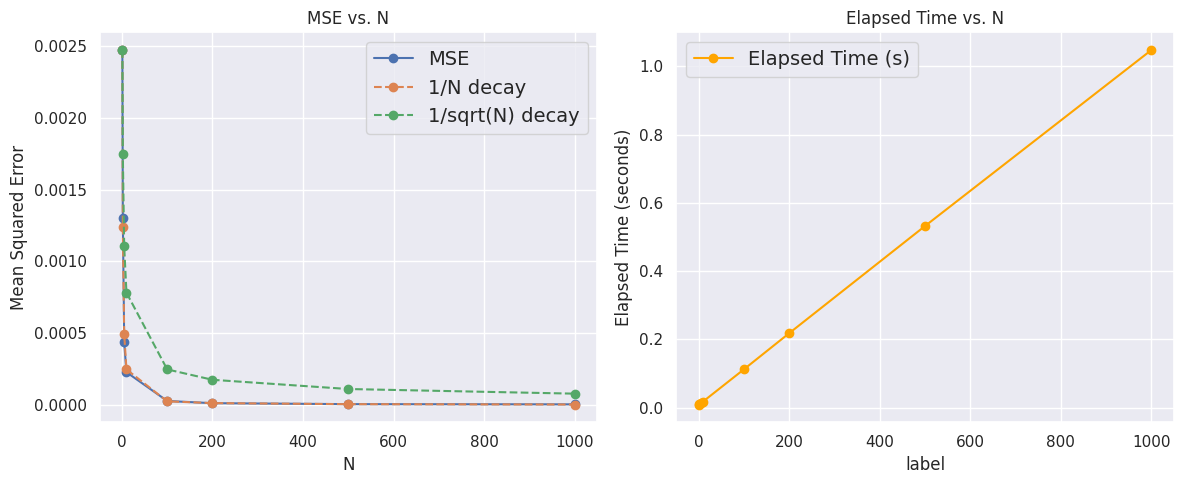

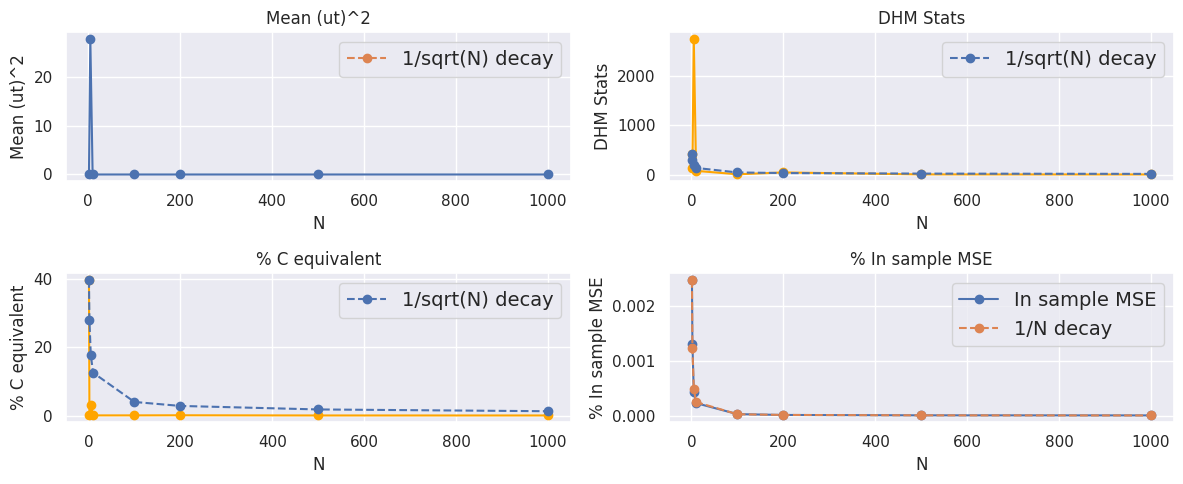

In [33]:
create_plots(df_results_average_N["N"].values, df_results_average_N["MSE"].values, df_results_average_N["Time"].values, df_results_average_N["mean_square_ut"].values, df_results_average_N["dhm_stat"].values, np.abs(df_results_average_N["c_equivalent"]).values, ref_index_plot=0)

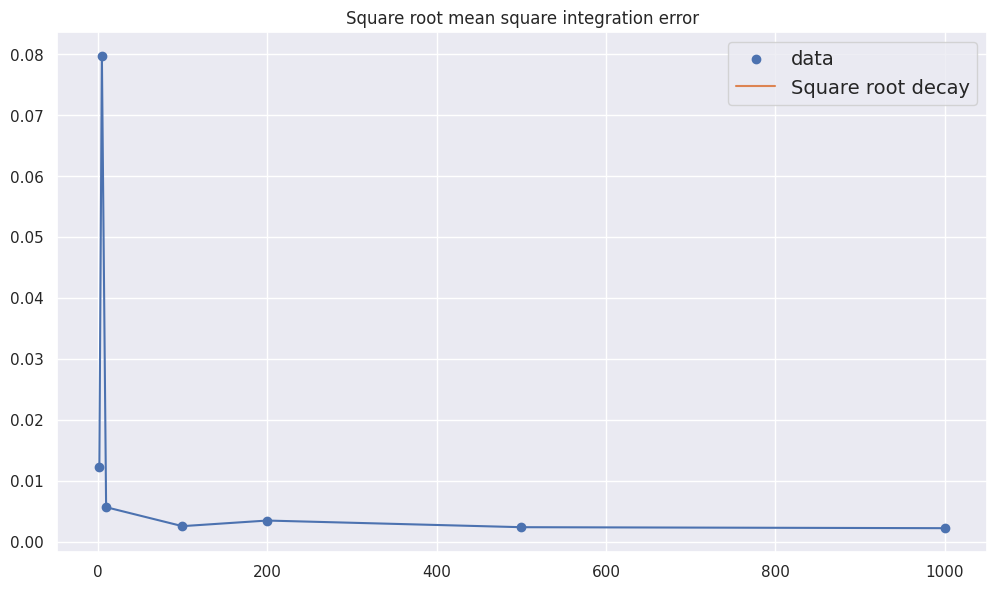

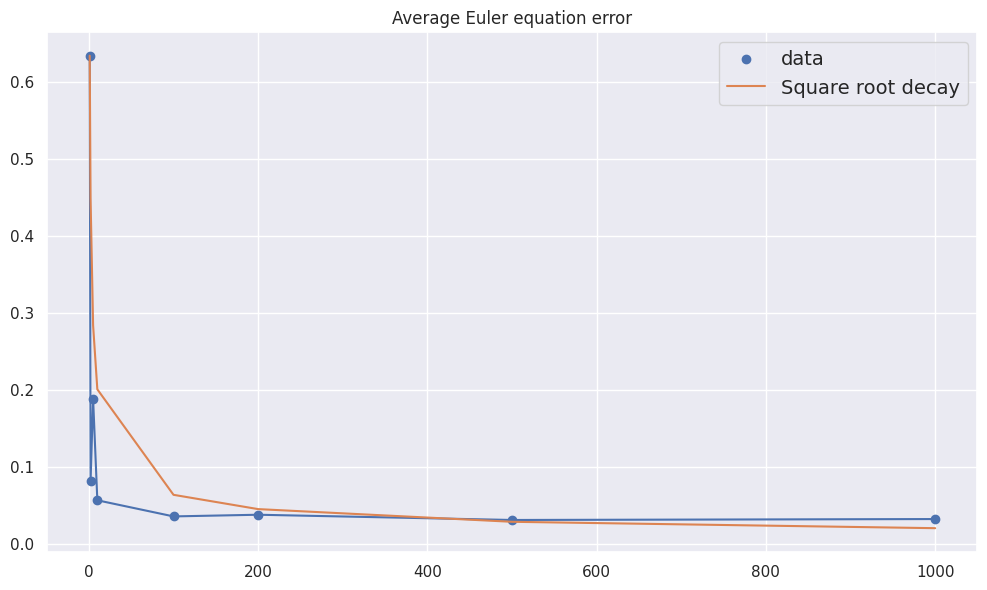

In [34]:
plt.scatter(df_results_average_N["N"], np.sqrt(df_results_average_N["MSIE"]), label="data")
plt.plot(df_results_average_N["N"], np.sqrt(df_results_average_N["MSIE"]))
plt.plot(df_results_average_N["N"], np.sqrt(df_results_average_N["MSIE"].values[0] * (df_results_average_N["N"].values[0]/df_results_average_N["N"]) ), label="Square root decay")
plt.title("Square root mean square integration error")
plt.legend()
plt.savefig(output_folder + "MSIE_N.pdf", dpi=300)
plt.show()

plt.scatter(df_results_average_N["N"], np.sqrt(df_results_average_N["A_EEE"]), label="data")
plt.plot(df_results_average_N["N"], np.sqrt(df_results_average_N["A_EEE"]))
plt.plot(df_results_average_N["N"], np.sqrt(df_results_average_N["A_EEE"].values[0] * (df_results_average_N["N"].values[0]/df_results_average_N["N"]) ), label="Square root decay")

plt.title("Average Euler equation error")
plt.savefig(output_folder + "A_EEE_N.pdf", dpi=300)
plt.legend()
plt.show()


several choices of $M$.

In [35]:
# --------------------------------------------------------------------------
# Main code (outside numba) to run the PEA iterations.
# --------------------------------------------------------------------------
list_M = [200, 500, 1000, 5000, 10000, 20000]
MSE_M = np.zeros(len(list_M)) #In-sample
MSIE_M = np.zeros(len(list_M)) #Mean square integration error, out-sample
A_EEE_M = np.zeros(len(list_M)) #Average absolute value of Euler equation error, out-sample
Time_M = np.zeros(len(list_M))

# Number innovation draws
N = 2 #10 #1
init = 100 #burnin

tol = 1e-8
gam = 1.0  # smoothing parameter
max_iter = params.nb_epochs # max number of iterations
redraw_shocks_every = 1000 #redraw new realizations of innovations (new state and innovation vectors)

# Innovations for the out-sample test
slong_test = 100000
init_test = 1000
e_test = params.std_tfp * np.random.randn(slong_test) #New shocks

# Preallocate arrays for test
a_test            = np.zeros(slong_test)
k_test            = np.zeros(slong_test+1)
mu_test           = np.zeros(slong_test+1)
production_test   = np.zeros(slong_test)
inv_test          = np.zeros(slong_test)
IE           = np.zeros(slong_test)
EEE          = np.zeros(slong_test)
cash_test         = np.zeros(slong_test)
c_test            = np.zeros(slong_test)
X_test            = np.zeros((slong_test, params.nb_expl_vars))
X_next_test       = np.zeros(params.nb_expl_vars)
linear_model_test = np.zeros(slong_test)
y_temp1_test      = np.zeros(len(params.nodes_flat))

# to store restults
results = []

np.random.seed(1)
#for N in range(1, max_N+1):
for (index_M, M) in enumerate(list_M):
    slong = init + M
    print("Running simulation with M =", M)
    # repeat several times
    for nb_rep in range(nb_tot_reps):

        b0_current = coeff_array_0.copy()  # initial guess (shape (6,))

        # If using ADAM, need to initialize
        adam_state  = init_adam(len(coeff_array_0))

        # innovation for state vector (not used directly in simulation here
        # for M large, no need to redraw many times.
        e = params.std_tfp * np.random.randn(slong)
        # extra draws for each state: shape (slong, N)
        E = params.std_tfp * np.random.randn(slong, N)

        # Preallocate arrays
        a = np.zeros(slong)
        k      = np.zeros(slong + 1)    # capital path (slong+1 because we update k[i+1])
        mu     = np.zeros(slong + 1)    # Lagrange multiplier on investment constraint
        y_out      = np.zeros(slong)    # simulated y
        production = np.zeros(slong)    # production
        inv = np.zeros(slong)           # investment
        cash     = np.zeros(slong)      # cash in hand
        c = np.zeros(slong)             # consumption
        X_data      = np.zeros((slong, params.nb_expl_vars))   # regressor matrix (6 variables)
        X_next = np.zeros(params.nb_expl_vars) # regressor, next period
        y_temp = np.zeros(N)            # temporary array for innovations

        # Warmup (compilation) first go
        simulate_path_N_inplace(M, init, params.kss, e, E, b0_current,
                                params.beta, params.gamma, params.alpha, params.delta, params.rho_tfp, N,
                                params.nb_expl_vars, params.tol_c, params.basis,
                                params.type_x1_x2, params.kss, params.inv_den_k, params.log_kss, params.inv_den_logk, params.inv_den_a,
                                a, k, mu, y_out, production, inv, cash, c, X_data, X_next, y_temp)

        start_time = time.perf_counter()
        iter_num = 1
        crit = 1.0
        # Run a fixed number of iterations (or use while crit > tol)
        while iter_num < max_iter:
            if iter_num % redraw_shocks_every == 0:
                e[:], E[:,:] = generate_random_arrays(slong, N, params.std_tfp)

            # Call the numba-compiled simulation to get regression data.
            simulate_path_N_inplace(M, init, params.kss, e, E, b0_current,
                                params.beta, params.gamma, params.alpha, params.delta, params.rho_tfp, N,
                                params.nb_expl_vars, params.tol_c, params.basis,
                                params.type_x1_x2, params.kss, params.inv_den_k, params.log_kss, params.inv_den_logk, params.inv_den_a,
                                a, k, mu, y_out, production, inv, cash, c, X_data, X_next, y_temp)

            # Remove burnin and last period
            X_reg = X_data[init:-1, :]
            y_reg = y_out[init:-1]

            if params.gradient_descent_approach == False:
                # OLS
                bt, _, _, _ = np.linalg.lstsq(X_reg, y_reg, rcond=None)

                # Parameter update
                b_new = gam * bt + (1 - gam) * b0_current
            else:
                # Gradient-descent approach
                b_new, adam_state = update_b_gradient_based(params, X_reg, y_reg, b0_current, adam_state, iter_num)

            crit = np.max(np.abs(b_new - b0_current))
            b0_current = b_new.copy()

            if (iter_num % 10 == 0):
                print("Iteration:", iter_num, "Conv. crit.:", crit)
            iter_num += 1
        end_time = time.perf_counter()
        elapsed = end_time - start_time
        print("Elapsed time for M =", M, ":", elapsed, "seconds")
        # Compute residuals and In-sample MSE.
        Res = y_reg - np.dot(X_reg, b0_current)
        MSE = np.mean(Res ** 2)
        MSE_M[index_M] = MSE
        # Alternative measure of accuracy
        mean_abs_ut, mean_square_ut, std_ut, dhm_stat, c_equivalent = dhm_accuracy_test(params, b0_current, e_test)

        evaluate_IE_and_EEE_Gauss_path_inplace(slong_test, params.kss,
                                             e_test, b0_current, params.beta, params.gamma, params.alpha,
                                             params.delta, params.rho_tfp, len(params.nodes_flat),
                                             params.nodes_flat, params.weights, params.nb_expl_vars,
                                             params.tol_c, params.basis,
                                             params.type_x1_x2, params.kss, params.inv_den_k, params.log_kss, params.inv_den_logk, params.inv_den_a,
                                             a_test, k_test, mu_test, production_test, inv_test,
                                             IE, EEE, cash_test, c_test, X_test, X_next_test, linear_model_test,
                                             y_temp1_test)

        MSIE_M[index_M] = np.mean(IE[init_test:-1]**2)
        A_EEE_M[index_M] = np.mean(np.abs(EEE[init_test:-1]))

        Time_M[index_M] = elapsed
        print("Final iteration M:", M, "Iterations:", iter_num, "OLS MSE:", MSE, "MISE:", MSIE_M[index_M], "Average EEE:", A_EEE_M[index_M])
        print("Final b0:", b0_current)

        # Store the results in a dictionary
        results.append({
            "repetition": nb_rep,
            "k": params.nb_expl_vars,
            "M": M,
            "N": N,
            "Time": elapsed,
            "MSE": MSE,
            "MSIE": MSIE_M[index_M],
            "A_EEE": A_EEE_M[index_M],
            "Mean_abs_u": mean_abs_ut,
            "mean_square_ut": mean_square_ut,
            "std_ut": std_ut,
            "dhm_stat": dhm_stat,
            "c_equivalent": c_equivalent
            })

# Create a Pandas DataFrame from the results
df_results_M = pd.DataFrame(results)
df_results_M.to_csv(output_folder + "df_results_M.csv")
print(df_results_M.head())

# Create average df, averaging over repetitions
df_results_M["M_init"]    = df_results_M["M"] + init #add burnin
df_results_M["log_N"]    = np.log(df_results_M["N"])
df_results_M["log_M"]    = np.log(df_results_M["M"])
df_results_M["log_MN"]   = np.log(df_results_M["M"] * df_results_M["N"])
df_results_M["MN_label"] = df_results_M["M"].astype("str") + "-" + df_results_M["N"].astype("str")

# Remove outliers (non-convergence)
#df_results_M = df_results_M[df_results_M["MSIE"] < 1.0]

df_results_average_M = df_results_M.groupby("MN_label").mean().reset_index()
df_results_average_M.sort_values("M", inplace=True)
df_results_average_M.to_csv(output_folder + "df_results_average_M.csv")
print(df_results_average_M.head())


Running simulation with M = 200
Iteration: 10 Conv. crit.: 0.005936073341544716
Iteration: 20 Conv. crit.: 0.0014452016773304904
Iteration: 30 Conv. crit.: 0.0002282674865035847
Iteration: 40 Conv. crit.: 4.3395947982430294e-05
Elapsed time for M = 200 : 0.009050229000195031 seconds


/tmp/ipython-input-3152659120.py:66: RuntimeWarning: overflow encountered in scalar power
  c[i] = E_t_tilde ** (-1/params.gamma)
/tmp/ipython-input-3152659120.py:66: RuntimeWarning: divide by zero encountered in scalar power
  c[i] = E_t_tilde ** (-1/params.gamma)
/tmp/ipython-input-3152659120.py:78: RuntimeWarning: overflow encountered in multiply
  ut = c[T]**(-params.gamma) - mu[T] - params.beta * ( ( c[T1]**(-params.gamma) ) * (params.alpha * np.exp(a[T1]) * k[T1] ** (params.alpha - 1) + 1 - params.delta) + mu[T1] * ( 1 - params.delta) )
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:127: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/tmp/ipython-input-3152659120.py:83: RuntimeWarning: overflow encountered in square
  mean_square_ut = np.mean(ut**2)
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:164: RuntimeWarning: overflow encountered in reduce
  arrmean = umr_sum(arr, axis, dtype, k

Final iteration M: 200 Iterations: 50 OLS MSE: 0.0011878838654875848 MISE: inf Average EEE: 1.0
Final b0: [-0.05322918 -0.31066993 -0.21146382  0.02416752  0.00358583  0.01099284
  0.01868989  0.00374688  0.00049892 -0.02945464]
Iteration: 10 Conv. crit.: 0.0006652629357225548
Iteration: 20 Conv. crit.: 0.00012003686071015984
Iteration: 30 Conv. crit.: 1.967981737982516e-05
Iteration: 40 Conv. crit.: 3.157408472231893e-06
Elapsed time for M = 200 : 0.00789649900002587 seconds
Final iteration M: 200 Iterations: 50 OLS MSE: 0.0015431782020570944 MISE: 0.0004015144298853903 Average EEE: 0.0108970127387006
Final b0: [-0.09614402 -0.21083043 -0.42995111 -0.03035241 -0.02442181 -0.01206946
 -0.00243965 -0.01230869 -0.23232564  0.07288983]
Iteration: 10 Conv. crit.: 0.0036326132384902343
Iteration: 20 Conv. crit.: 0.0004778889942923248
Iteration: 30 Conv. crit.: 5.8676927054662764e-05
Iteration: 40 Conv. crit.: 7.160737695410813e-06
Elapsed time for M = 200 : 0.007999259999905917 seconds
Fina

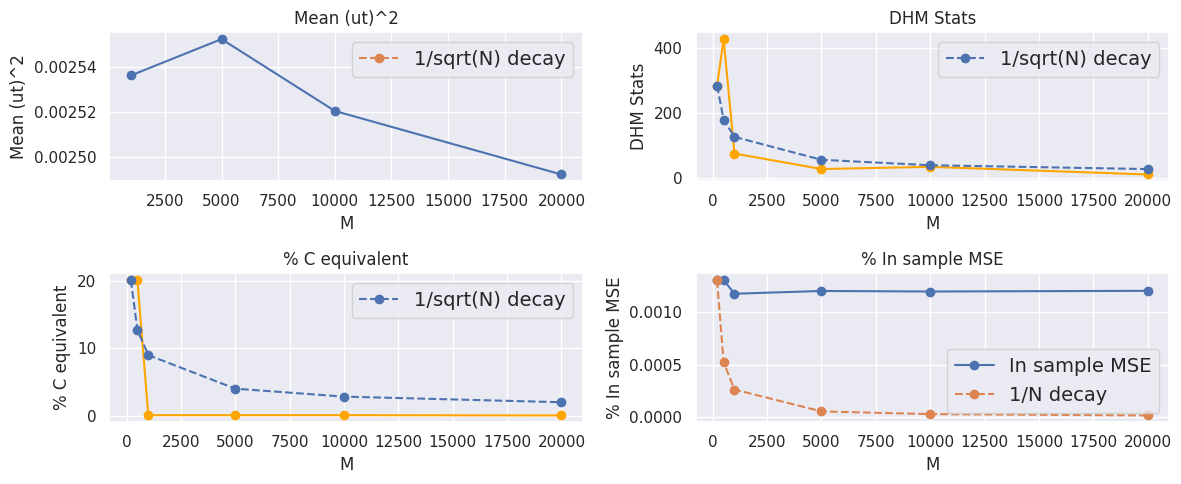

In [36]:
create_plots(df_results_average_M["M"].values, df_results_average_M["MSE"].values, df_results_average_M["Time"].values, df_results_average_M["mean_square_ut"].values, df_results_average_M["dhm_stat"].values, np.abs(df_results_average_M["c_equivalent"]).values, ref_index_plot=0, label="M")

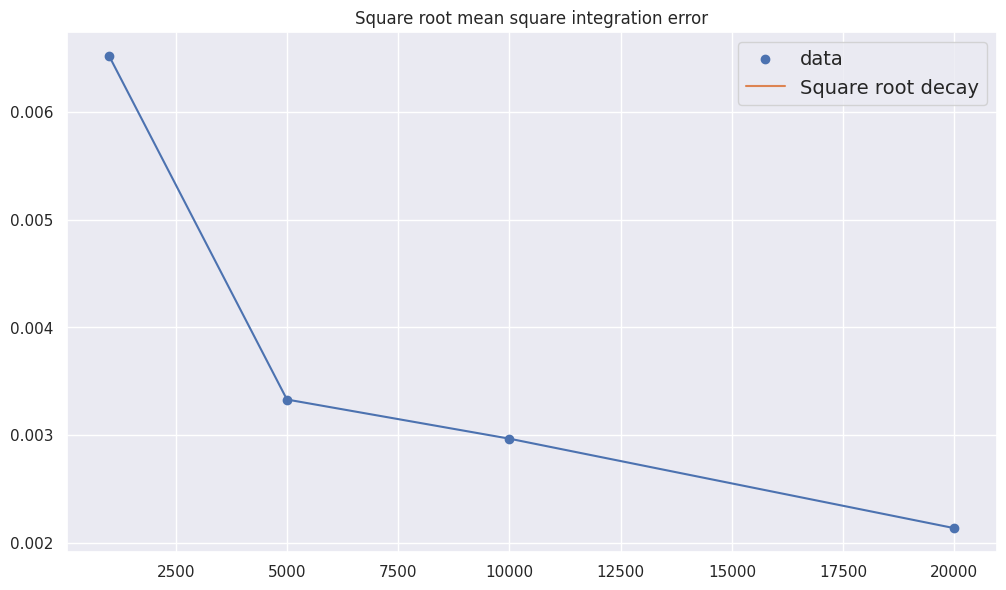

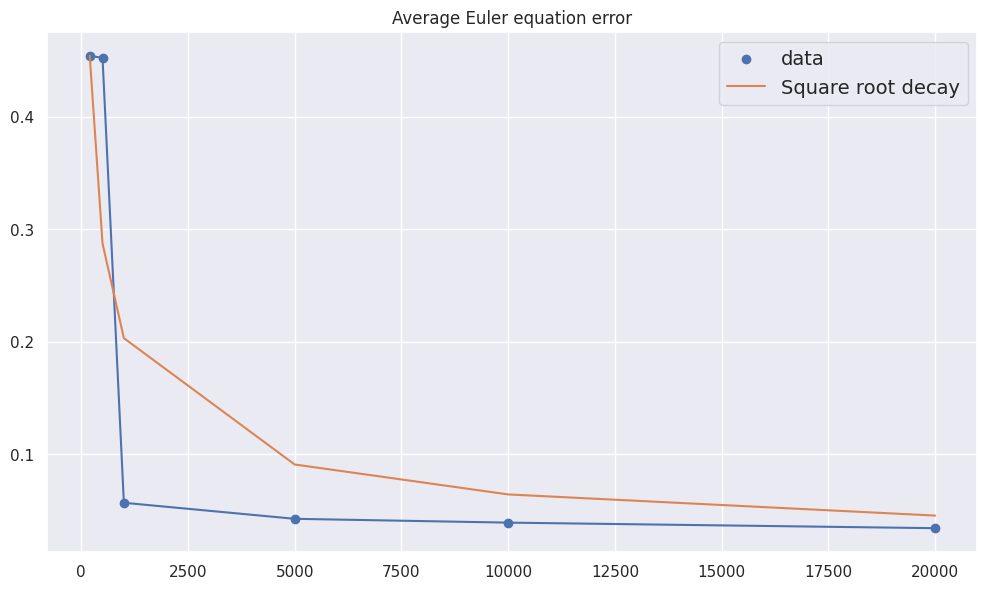

In [37]:
plt.scatter(df_results_average_M["M"], np.sqrt(df_results_average_M["MSIE"]), label="data")
plt.plot(df_results_average_M["M"], np.sqrt(df_results_average_M["MSIE"]))
plt.plot(df_results_average_M["M"], np.sqrt(df_results_average_M["MSIE"].values[0] * (df_results_average_M["M"].values[0]/df_results_average_M["M"]) ), label="Square root decay")
plt.title("Square root mean square integration error")
plt.legend()
plt.savefig(output_folder + "MSIE_M.pdf", dpi=300)
plt.show()

plt.scatter(df_results_average_M["M"], np.sqrt(df_results_average_M["A_EEE"]), label="data")
plt.plot(df_results_average_M["M"], np.sqrt(df_results_average_M["A_EEE"]))
plt.plot(df_results_average_M["M"], np.sqrt(df_results_average_M["A_EEE"].values[0] * (df_results_average_M["M"].values[0]/df_results_average_M["M"]) ), label="Square root decay")

plt.title("Average Euler equation error")
plt.savefig(output_folder + "A_EEE_M.pdf", dpi=300)
plt.legend()
plt.show()


### Varying M and N

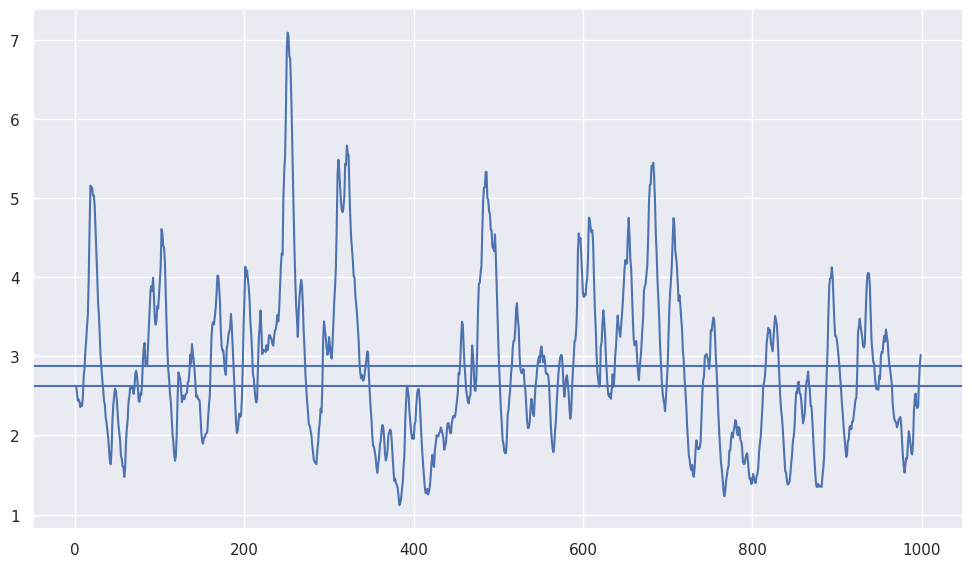

In [38]:
plt.plot(k[:1000])
plt.axhline(y = params.kss, label="k SS")
plt.axhline(y = np.mean(k), label="k mean")

In [39]:
# IF want to measure aroung target MN
list_MN_target = [2000, 10000, 20000, 50000, 100000, 1000000] #Number for MN
list_N_target = [1, 5, 10, 25, 50, 100, 200, 300, 500] #number of innovation draws, per state vector

min_M = 100
# Inplied values for M
list_M = []
list_N = []
for MN in list_MN_target:
    list_M += [round(int(np.maximum(random.uniform(0.8, 1.2)*(MN/N), min_M))/10)*10 for N in list_N_target] #number of state vector draws
    list_N += list_N_target

pd.DataFrame({'M': list_M, 'N': list_N}).head(10)

M    N
0  2260    1
1   390    5
2   230   10
3   100   25
4   100   50
5   100  100
6   100  200
7   100  300
8   100  500
9  8500    1

In [40]:
%%time

list_N = [1, 5, 10, 25, 50, 100, 200, 300] #number of innovation draws, per state vector
list_M = [300, 1000, 5000, 10000, 20000, 50000] #number of state vector draws

init = 100 #100 #burnin, train data

tol = 1e-8 # tolerance on parameter vector
gam = 1.0  # smoothing parameter between two iterations
max_iter = params.nb_epochs # max number of iterations
redraw_shocks_every = 1000 #redraw new realizations of innovations (new state and innovation vectors)

slong_test = 100000
init_test = 1000 #burnin, test data
nb_tot_reps = 5 #nb of repetitions, to smooth out randomness and potential issues with measuring timing

# Preallocate arrays for test
a_test            = np.zeros(slong_test)
k_test            = np.zeros(slong_test+1)
mu_test           = np.zeros(slong_test+1)
production_test   = np.zeros(slong_test)
inv_test          = np.zeros(slong_test)
IE           = np.zeros(slong_test)
EEE          = np.zeros(slong_test)
cash_test         = np.zeros(slong_test)
c_test            = np.zeros(slong_test)
X_test            = np.zeros((slong_test, params.nb_expl_vars))
X_next_test       = np.zeros(params.nb_expl_vars)
linear_model_test = np.zeros(slong_test)
y_temp1_test      = np.zeros(len(params.nodes_flat))

# to store restults
results = []
np.random.seed(42)

for (index_N, N) in enumerate(list_N):
    for (index_M, M) in enumerate(list_M):
    #for (N, M) in zip(list_N, list_M):
        for nb_rep in range(nb_tot_reps):
            # Innovations for the out-sample test
            #np.random.seed(nb_rep)
            e_test = params.std_tfp * np.random.randn(slong_test) #New shocks

            slong = init + M

            b0_current = coeff_array_0.copy()  # initial guess (shape (6,))

            # If using ADAM, need to initialize
            adam_state  = init_adam(len(coeff_array_0))

            # innovation for state vector (not used directly in simulation here
            # for M large, no need to redraw many times.
            e = params.std_tfp * np.random.randn(slong)
            # extra draws for each state: shape (slong, N)
            E = params.std_tfp * np.random.randn(slong, N)

            # Preallocate arrays
            a = np.zeros(slong)
            k      = np.zeros(slong + 1)    # capital path (slong+1 because we update k[i+1])
            mu     = np.zeros(slong + 1)    # Lagrange multiplier on investment constraint
            y_out      = np.zeros(slong)    # simulated y
            production = np.zeros(slong)    # production
            inv = np.zeros(slong)           # investment
            cash     = np.zeros(slong)      # cash in hand
            c = np.zeros(slong)             # consumption
            X_data      = np.zeros((slong, params.nb_expl_vars))   # regressor matrix (6 variables)
            X_next = np.zeros(params.nb_expl_vars) # regressor, next period
            y_temp = np.zeros(N)            # temporary array for innovations

            # Warmup (compilation) first go
            simulate_path_N_inplace(M, init, params.kss, e, E, b0_current,
                                params.beta, params.gamma, params.alpha, params.delta, params.rho_tfp, N,
                                params.nb_expl_vars, params.tol_c, params.basis,
                                params.type_x1_x2, params.kss, params.inv_den_k, params.log_kss, params.inv_den_logk, params.inv_den_a,
                                a, k, mu, y_out, production, inv, cash, c, X_data, X_next, y_temp)

            iter_num = 1
            crit = 1.0
            # Run a fixed number of iterations (or use while crit > tol)
            start_time = time.perf_counter()
            while iter_num < max_iter:
                if iter_num % redraw_shocks_every == 0:
                    e[:], E[:,:] = generate_random_arrays(slong, N, params.std_tfp)

                # Simulation:
                simulate_path_N_inplace(M, init, params.kss, e, E, b0_current,
                                params.beta, params.gamma, params.alpha, params.delta, params.rho_tfp, N,
                                params.nb_expl_vars, params.tol_c, params.basis,
                                params.type_x1_x2, params.kss, params.inv_den_k, params.log_kss, params.inv_den_logk, params.inv_den_a,
                                a, k, mu, y_out, production, inv, cash, c, X_data, X_next, y_temp)

                # Remove burnin and last period
                X_reg = X_data[init:-1, :]
                y_reg = y_out[init:-1]

                if params.gradient_descent_approach == False:
                    # OLS
                    bt, _, _, _ = np.linalg.lstsq(X_reg, y_reg, rcond=None)

                    # Parameter update
                    b_new = gam * bt + (1 - gam) * b0_current
                else:
                    # Gradient-descent approach
                    ## Get gradient at current parameter value
                    b_new, adam_state = update_b_gradient_based(params, X_reg, y_reg, b0_current, adam_state, iter_num)

                crit = np.max(np.abs(b_new - b0_current))
                b0_current = b_new.copy()
                #print("Iteration:", iter_num, "Conv. crit.:", crit)
                iter_num += 1

            end_time = time.perf_counter()
            elapsed = end_time - start_time

            print(f"Iter {nb_rep}. M = {M}, N = {N}, elapsed time: {elapsed} seconds")
            # Compute residuals and In-sample MSE.
            Res = y_reg - np.dot(X_reg, b0_current)
            MSE = np.mean(Res ** 2)

            # Alternative measure of accuracy
            #mean_abs_ut, mean_square_ut, std_ut, dhm_stat, c_equivalent = dhm_accuracy_test(params, b0_current, e_test)

            # Mean squared integration error and EEE
            evaluate_IE_and_EEE_Gauss_path_inplace(slong_test, params.kss,
                                             e_test, b0_current, params.beta, params.gamma, params.alpha,
                                             params.delta, params.rho_tfp, len(params.nodes_flat),
                                             params.nodes_flat, params.weights, params.nb_expl_vars,
                                             params.tol_c, params.basis,
                                             params.type_x1_x2, params.kss, params.inv_den_k, params.log_kss, params.inv_den_logk, params.inv_den_a,
                                             a_test, k_test, mu_test, production_test, inv_test,
                                             IE, EEE, cash_test, c_test, X_test, X_next_test, linear_model_test,
                                             y_temp1_test)


            MSIE = np.mean(IE[init_test:-1]**2)
            A_EEE = np.mean(np.abs(EEE[init_test:-1]))

            print("Final iteration M:", M, "Iterations:", iter_num, "OLS MSE:", MSE, "MISE:", MSIE, "Average EEE:", A_EEE)
            print("Final b0:", b0_current)

            # Store the results in a dictionary
            results.append({
                "repetition": nb_rep,
                "k": params.nb_expl_vars,
                "M": M,
                "N": N,
                "Time": elapsed,
                "MSE": MSE,
                "MSIE": MSIE,
                "A_EEE": A_EEE
                })

# Create a Pandas DataFrame from the results
df_results = pd.DataFrame(results)
df_results.to_csv(output_folder + "df_results.csv")
print(df_results.head())

Iter 0. M = 300, N = 1, elapsed time: 0.009668288000057146 seconds
Final iteration M: 300 Iterations: 50 OLS MSE: 0.0027026385625827185 MISE: 0.0002674980101500871 Average EEE: 0.010278260174939585
Final b0: [-0.12643796 -0.29411819 -0.27519915  0.08407498 -0.03494505 -0.01521658
  0.00743477  0.00903351 -0.06077754 -0.0110216 ]
Iter 1. M = 300, N = 1, elapsed time: 0.009172949000003427 seconds
Final iteration M: 300 Iterations: 50 OLS MSE: 0.002744352164810066 MISE: 0.0027254517735936555 Average EEE: 0.009998914297352182
Final b0: [-1.10446164e-01 -3.59053209e-01 -1.34863533e-01 -8.35921941e-03
 -2.78969572e-02 -2.60736573e-02 -2.28813616e-04  1.62211477e-03
  8.92800448e-02 -5.03234236e-02]
Iter 2. M = 300, N = 1, elapsed time: 0.009132628999850567 seconds
Final iteration M: 300 Iterations: 50 OLS MSE: 0.002013699171613617 MISE: inf Average EEE: 0.5221802983953879
Final b0: [-0.07765245 -0.26733989 -0.25796748  0.02701391 -0.00402472 -0.00949682
  0.01073432 -0.00614175 -0.05376316  

In [41]:
df_results["M_init"]    = df_results["M"] + init #add burnin
df_results["log_N"]    = np.log(df_results["N"])
df_results["log_M"]    = np.log(df_results["M"])
df_results["log_MN"]   = np.log(df_results["M"] * df_results["N"])

df_results["MN_label"] = df_results["M"].astype("str") + "-" + df_results["N"].astype("str")

# Remove outliers (non-convergence)
df_results = df_results[df_results["MSIE"] < 1.0]

df_results_average = df_results.groupby("MN_label").mean().reset_index()
print(df_results_average.head())

# sigma_e**2 * k / (N**alpha * (M - k - 1))
m = smf.ols("np.log(MSIE) ~ np.log(N) + np.log(M - k - 1)", data=df_results_average).fit()
coef_alpha = -m.params["np.log(N)"]
print(coef_alpha)
print(m.summary())


## Simulation + OLS time
# 1. Time moddel
m = smf.ols("Time ~ I(M*N) + M ", data=df_results_average).fit()
print(m.summary())

# 2. Extract point estimates
c_st = m.params["Intercept"]
alpha_MN = m.params["I(M * N)"]      # coeff on M*N
alpha_M  = m.params["M"]             # coeff on M

# 3. Extract standard errors
se_c_st = m.bse["Intercept"]
se_alpha_MN = m.bse["I(M * N)"]      # SE of alpha_MN
se_alpha_M  = m.bse["M"]             # SE of alpha_M

# 4. Extract covariance between the two slopes
cov_M_MN = m.cov_params().loc["M", "I(M * N)"]  # covariance between alpha_M and alpha_MN

# 5. Extra full covariance matrix
print(m.cov_params()) # full var-cov matrix
# Reorder
cov_mat = m.cov_params().loc[['Intercept','M','I(M * N)'], ['Intercept','M','I(M * N)']].values

print("alpha_MN =", alpha_MN, "±", se_alpha_MN)
print("alpha_M  =", alpha_M,  "±", se_alpha_M)
print("Cov(alpha_M, alpha_MN) =", cov_M_MN)

## Simulation + OLS time
## Checking the burnin does not change timing model
## Should only change constant
m = smf.ols("Time ~ I(M_init*N) + M_init ", data=df_results_average).fit()
print(m.summary())

   MN_label  repetition     k       M      N      Time       MSE      MSIE  \
0    1000-1         2.0  10.0  1000.0    1.0  0.023304  0.002047  0.109533   
1   1000-10         2.0  10.0  1000.0   10.0  0.063368  0.000243  0.000007   
2  1000-100         2.0  10.0  1000.0  100.0  0.453179  0.000027  0.000004   
3  1000-200         2.0  10.0  1000.0  200.0  0.854238  0.000014  0.000003   
4   1000-25         2.0  10.0  1000.0   25.0  0.125216  0.000097  0.000004   

      A_EEE  M_init     log_N     log_M     log_MN  
0  0.096877  1100.0  0.000000  6.907755   6.907755  
1  0.001368  1100.0  2.302585  6.907755   9.210340  
2  0.001012  1100.0  4.605170  6.907755  11.512925  
3  0.000959  1100.0  5.298317  6.907755  12.206073  
4  0.001192  1100.0  3.218876  6.907755  10.126631  
0.497288369848498
                            OLS Regression Results                            
Dep. Variable:           np.log(MSIE)   R-squared:                       0.475
Model:                            OLS

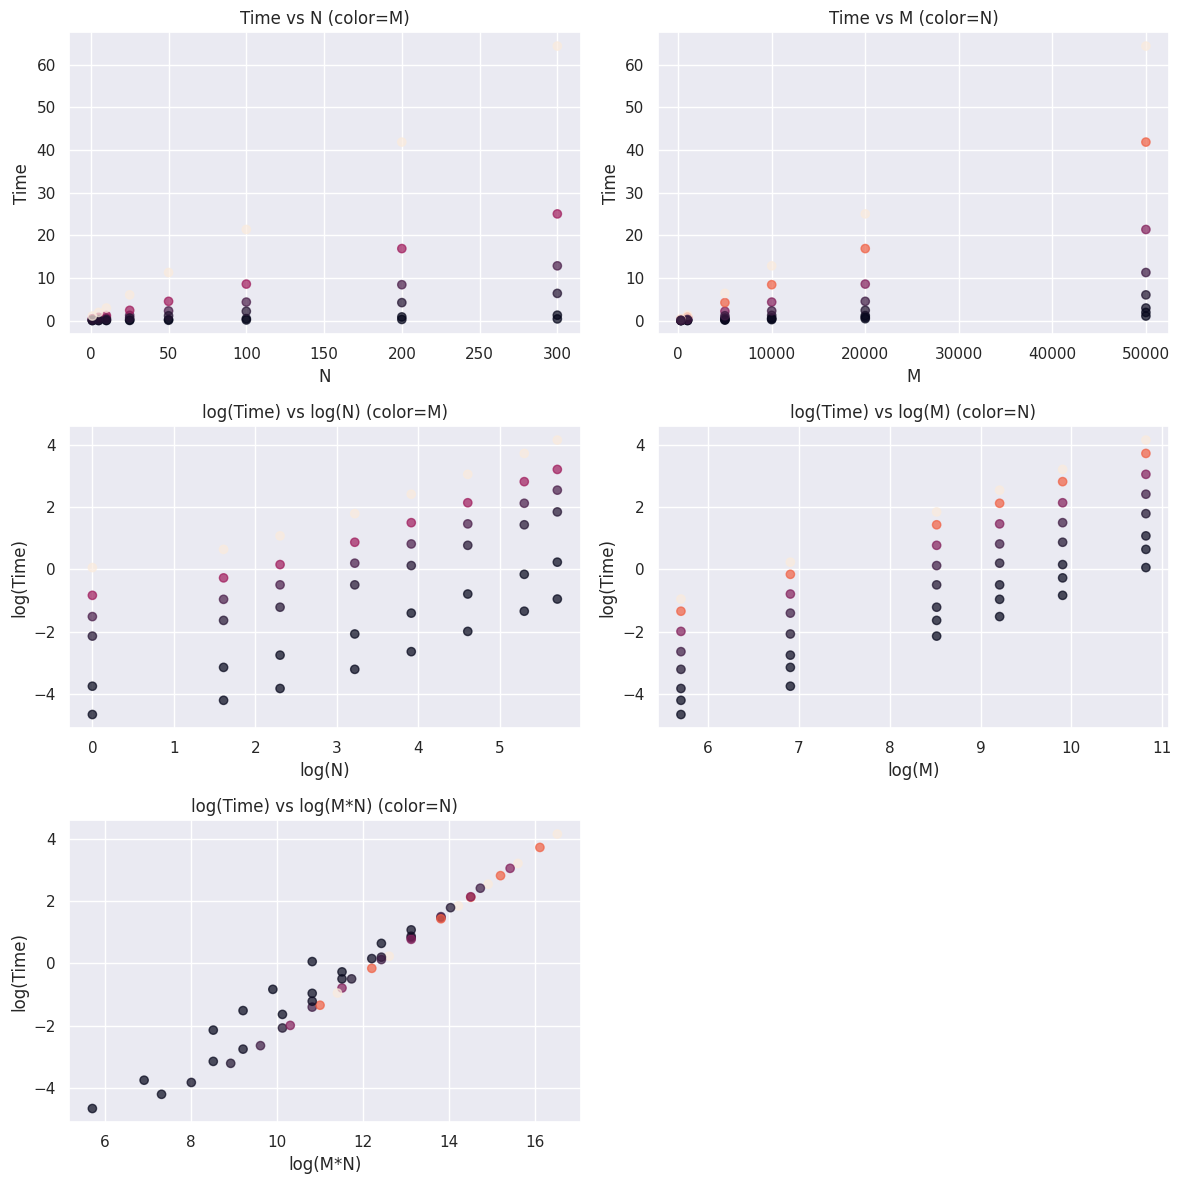

In [42]:
df_results_average["log_Time"] = np.log(df_results_average["Time"])

fig, axs = plt.subplots(3, 2, figsize=(12, 12))

# 1) Time vs N, colored by M
axs[0, 0].scatter(df_results_average["N"], df_results_average["Time"], c=df_results_average["M"], alpha=0.7)
axs[0, 0].set_xlabel("N")
axs[0, 0].set_ylabel("Time")
axs[0, 0].set_title("Time vs N (color=M)")

# 2) Time vs M, colored by N
axs[0, 1].scatter(df_results_average["M"], df_results_average["Time"], c=df_results_average["N"], alpha=0.7)
axs[0, 1].set_xlabel("M")
axs[0, 1].set_ylabel("Time")
axs[0, 1].set_title("Time vs M (color=N)")

# 3) log_Time vs log_N, colored by M
axs[1, 0].scatter(df_results_average["log_N"], df_results_average["log_Time"], c=df_results_average["M"], alpha=0.7)
axs[1, 0].set_xlabel("log(N)")
axs[1, 0].set_ylabel("log(Time)")
axs[1, 0].set_title("log(Time) vs log(N) (color=M)")

# 4) log_Time vs log_M, colored by N
axs[1, 1].scatter(df_results_average["log_M"], df_results_average["log_Time"], c=df_results_average["N"], alpha=0.7)
axs[1, 1].set_xlabel("log(M)")
axs[1, 1].set_ylabel("log(Time)")
axs[1, 1].set_title("log(Time) vs log(M) (color=N)")

# 5) log_Time vs log_MN, colored by N
axs[2, 0].scatter(df_results_average["log_MN"], df_results_average["log_Time"], c=df_results_average["N"], alpha=0.7)
axs[2, 0].set_xlabel("log(M*N)")
axs[2, 0].set_ylabel("log(Time)")
axs[2, 0].set_title("log(Time) vs log(M*N) (color=N)")

# Remove the unused subplot
fig.delaxes(axs[2, 1])

plt.tight_layout()
plt.savefig(output_folder + "plot_Time_MN.pdf", dpi=300)
plt.show()


#### Pareto frontier

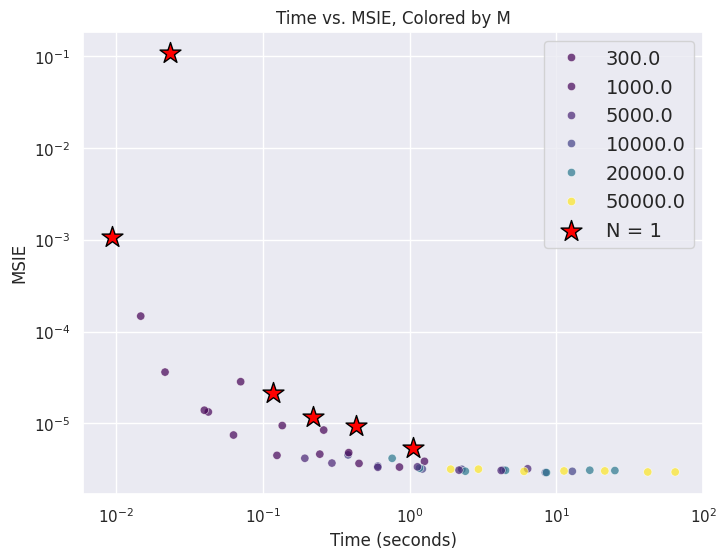

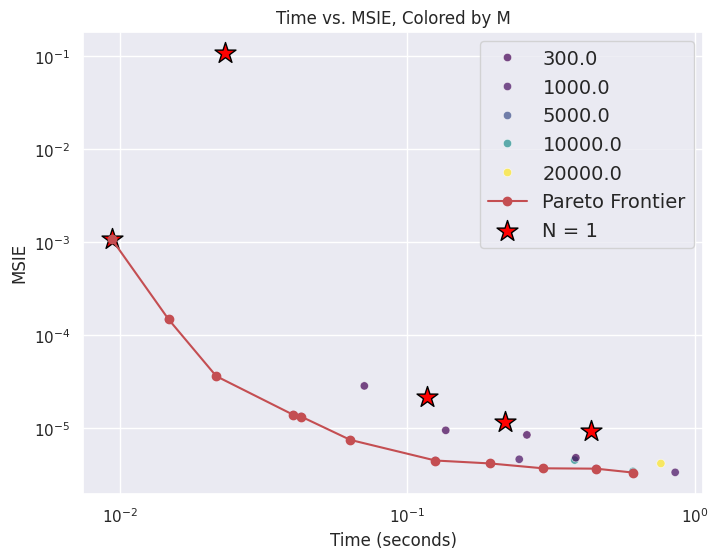

In [43]:
def compute_pareto_front(df, time_col='Time', mse_col='MSIE'):
    # Sort by Time ascending
    df_sorted = df.sort_values(by=time_col, ascending=True)

    # List to store the Pareto front
    pareto_points = []

    # Keep track of the lowest MSE encountered so far
    best_mse_so_far = float('inf')

    for idx, row in df_sorted.iterrows():
        mse_val = row[mse_col]
        if mse_val < best_mse_so_far:
            pareto_points.append(row)
            best_mse_so_far = mse_val

    return pd.DataFrame(pareto_points)

pareto_df = compute_pareto_front(df_results_average)

plt.figure(figsize=(8,6))
sns.scatterplot(data=df_results_average, x='Time', y='MSIE', hue='M', palette='viridis', alpha=0.7)
#plt.plot(pareto_df['Time'], pareto_df['MSIE'], 'r-o', label='Pareto Frontier')

# Now highlight the optimal points
optimal_df = df_results_average[df_results_average['N'] == 1]
plt.scatter(optimal_df['Time'], optimal_df['MSIE'],
            marker='*', s=250, c='red',
            edgecolors='black', linewidths=1,
            label='N = 1')

plt.xlabel('Time (seconds)')
plt.ylabel('MSIE')
plt.yscale('log')
plt.xscale('log')
plt.title('Time vs. MSIE, Colored by M')
plt.legend()
plt.grid(True)
plt.savefig(output_folder + "Time_vs_MSIE_1.pdf", dpi=300)
plt.show()

df_results_sel = df_results_average[df_results_average["Time"] < 1.0]
pareto_df = compute_pareto_front(df_results_sel)

plt.figure(figsize=(8,6))
sns.scatterplot(data=df_results_sel, x='Time', y='MSIE', hue='M', palette='viridis', alpha=0.7)
plt.plot(pareto_df['Time'], pareto_df['MSIE'], 'r-o', label='Pareto Frontier')

# Now highlight the optimal points
optimal_df = df_results_sel[df_results_sel['N'] == 1]
plt.scatter(optimal_df['Time'], optimal_df['MSIE'],
            marker='*', s=250, c='red',
            edgecolors='black', linewidths=1,
            label='N = 1')

plt.xlabel('Time (seconds)')
plt.ylabel('MSIE')
plt.yscale('log')
plt.xscale('log')
plt.title('Time vs. MSIE, Colored by M')
plt.legend()
plt.grid(True)
plt.savefig(output_folder + "Time_vs_MSIE_2.pdf", dpi=300)
plt.show()


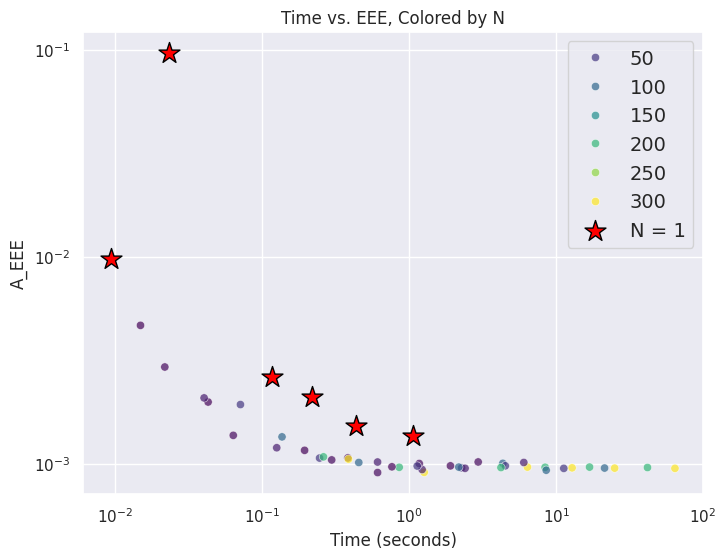

In [44]:
pareto_df = compute_pareto_front(df_results_average, time_col='Time', mse_col='A_EEE')

plt.figure(figsize=(8,6))
sns.scatterplot(data=df_results_average, x='Time', y='A_EEE', hue='N', palette='viridis', alpha=0.7)
#plt.plot(pareto_df['Time'], pareto_df['A_EEE'], 'r-o', label='Pareto Frontier')

# Now highlight the optimal points
optimal_df = df_results_average[df_results_average['N'] == 1]
plt.scatter(optimal_df['Time'], optimal_df['A_EEE'],
            marker='*', s=250, c='red',
            edgecolors='black', linewidths=1,
            label='N = 1')

plt.xlabel('Time (seconds)')
plt.ylabel('A_EEE')
plt.yscale('log')
plt.xscale('log')
plt.title('Time vs. EEE, Colored by N')
plt.legend()
plt.grid(True)
plt.savefig(output_folder + "Time_vs_EEE_1.pdf", dpi=300)
plt.show()

In [45]:
def optimal_M_N_old(T, k, alpha, alpha0, alpha1, alpha2, eps=1e-12, round_nearest = True):
    """
    Compute the pair (M*, N*) that minimizes MSIE
      E[(…)^2] ∼ σ^2 k / [N^α (M−k−1)]
    subject to the time budget
      T = α0 + α1⋅M⋅N + α2⋅M.

    Parameters
    ----------
    T : float
        Total time budget (must exceed α0).
    k : int
        Number of regressors, including constant
    alpha : float
        Exponent in the integration error ( >1 for well‑posed optimum).
    alpha0 : float
        Intercept term (c_st).
    alpha1 : float
        Coefficient on M⋅N.
    alpha2 : float
        Coefficient on M.
    eps : float, optional
        Threshold below which we treat alpha2 as zero.
    round_nearest : boolean, optional
        If true, round to nearest 10

    Returns
    -------
    M_star, N_star : tuple of floats
        Optimal M and N.
    """
    C0 = T - alpha0
    if C0 <= 0:
        raise ValueError("T must exceed alpha0")
    # α2 → 0 limit
    if abs(alpha2) < eps:
        M_star = alpha * (k + 1) / (alpha - 1)
    else:
        A = (alpha - 1) * C0
        B = alpha * C0 * (k + 1)
        # positive root of α2 M^2 + (α-1)C0 M - α C0 (k+1) = 0
        M_star = (-A + np.sqrt(A**2 + 4 * alpha2 * B)) / (2 * alpha2)

    # back out N from the time constraint
    N_star = (C0 - alpha2 * M_star) / (alpha1 * M_star)

    # round to nearest 10
    if round_nearest == True:
         M_star = int(np.round(M_star/10) * 10)
         N_star = int(np.round(N_star/10) * 10)

    return M_star, N_star


def optimal_M_N(T, k, alpha, alpha0, alpha1, alpha2,
                rho=0.0,
                eps=1e-12,
                round_nearest=True,
                effective_sample_size=True):
    """
    Compute the pair (M*, N*) that minimizes MSIE
      E[(…)^2] ∼ σ^2 k / [N^α (M−k−1)]
    subject to the time budget
      T = α0 + α1⋅M⋅N + α2⋅M.

    If effective_sample_size=True, applies AR(1) correction.
    Then, recompute N using the time budget.

    Parameters
    ----------
    T : float
    k : int
    alpha : float (>1)
    alpha0 : float
    alpha1 : float
    alpha2 : float
    rho : float
      AR(1) coefficient for effective sample-size adjustment.
    eps : float
    round_nearest : bool
    effective_sample_size : bool

    Returns
    -------
    M_star, N_star
    """
    C0 = T - alpha0
    if C0 <= 0:
        raise ValueError("T must exceed alpha0")

    # 1) find the M* ignoring serial correlation
    if abs(alpha2) < eps:
        M_star = alpha * (k + 1) / (alpha - 1)
    else:
        A = (alpha - 1) * C0
        B = alpha * C0 * (k + 1)
        # solve α2 M^2 + (α-1)C0 M - α C0 (k+1) = 0
        M_star = (-A + np.sqrt(A**2 + 4 * alpha2 * B)) / (2 * alpha2)

    # 2) back out N* from the time constraint
    N_star = (C0 - alpha2 * M_star) / (alpha1 * M_star)

    # 3) optionally apply AR(1) effective-M correction
    if effective_sample_size:
        if not (-1 < rho < 1):
            raise ValueError("rho must lie in (-1,1) for effective-M")
        # Increase the value of M* by a factor of (1 + rho) / (1 - rho).
        # Because of serial correaltion, each observation of the state is less "valuable"
        M_eff = M_star * (1 + rho**2) / (1 - rho**2)
        # recompute N under same time budget
        N_eff = (C0 - alpha2 * M_eff) / (alpha1 * M_eff)
        M_star, N_star = M_eff, N_eff

    # 4) optionally round
    if round_nearest:
        M_star = int(np.round(M_star / 10) * 10)
        N_star = int(np.round(N_star / 10) * 10)

    return M_star, N_star

# Delta method to calculate uncertainty aroud M *and N*
def se_MN_star_full(
    M_star, N_star, T, k, alpha,
    alpha_0, alpha_M, alpha_MN,
    se_alpha_0, se_alpha_M, se_alpha_MN,
    cov_mat          # 3×3 numpy array from m.cov_params().values
):
    # Precompute
    C0 = T - alpha_0
    b  = (alpha - 1)*C0
    D  = np.sqrt(b*b + 4*alpha_M*alpha*C0*(k+1))

    # 1) partials for M*
    dM_d0 = -1/(2*alpha_M)*((alpha-1)
             - ((alpha-1)**2 *C0 + 2*alpha*alpha_M*(k+1))/D)
    dM_dM = (alpha*C0*(k+1)/D - M_star)/alpha_M
    dM_dMN= 0.0

    grad_M = np.array([dM_d0, dM_dM, dM_dMN])
    var_M  = grad_M @ cov_mat @ grad_M
    se_M   = np.sqrt(var_M)

    # 2) partials for N*
    dN_d0 = (1/(alpha_MN*M_star)
             - (C0 - alpha_M*M_star)/(alpha_MN*(M_star**2))*dM_d0)
    dN_dM = (-1/alpha_MN
             - (C0 - alpha_M*M_star)/(alpha_MN*(M_star**2))*dM_dM)
    dN_dMN= -N_star/alpha_MN

    grad_N = np.array([dN_d0, dN_dM, dN_dMN])
    var_N  = grad_N @ cov_mat @ grad_N
    se_N   = np.sqrt(var_N)

    return se_M, se_N

target_time = 10
for eff_M in [True, False]:
    for alpha_selected in [coef_alpha, 1.0]:
        M_opt, N_opt = optimal_M_N(target_time, params.nb_expl_vars, alpha_selected, c_st, alpha_MN, alpha_M, rho = params.rho_tfp, effective_sample_size = eff_M)

        se_M_opt, se_N_opt = se_MN_star_full(M_opt, N_opt, target_time, params.nb_expl_vars, alpha_selected,
                                            c_st, alpha_M, alpha_MN,
                                            se_c_st, se_alpha_M, se_alpha_MN, cov_mat)
        print(f"alpha: {alpha_selected}. Effective sample size M: {eff_M}")
        print(f"M*: {M_opt} +/- 2 * {se_M_opt}")
        print(f"N*: {N_opt} +/- 2 * {se_N_opt}")


alpha: 0.497288369848498. Effective sample size M: True
M*: 1542630 +/- 2 * 199256.4714848649
N*: 0 +/- 2 * 0.7175357922564058
alpha: 1.0. Effective sample size M: True
M*: 12400 +/- 2 * 1423.813619607653
N*: 190 +/- 2 * 21.193882219058725
alpha: 0.497288369848498. Effective sample size M: False
M*: 338630 +/- 2 * 44261.1977582342
N*: 0 +/- 2 * 0.01600501806250948
alpha: 1.0. Effective sample size M: False
M*: 2720 +/- 2 * 177.63958920967247
N*: 870 +/- 2 * 56.383151039224664


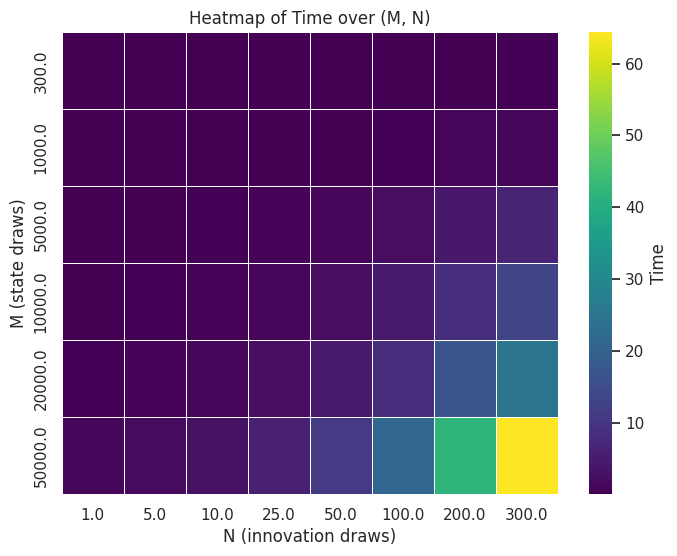

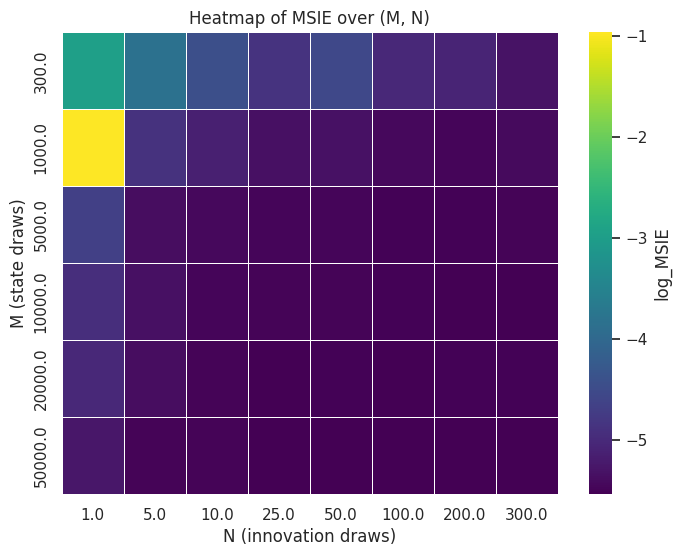

In [46]:
# 1) Pivot MSIE into a matrix with rows=M and columns=N
df_sel = df_results_average[df_results_average["MSIE"] < 1.0].copy()

df_sel["log_MSIE"] = np.log10(df_sel["MSIE"])
df_sel["log_MSIE_Time"] = np.log10(df_sel["MSIE"]/df_sel["Time"])
df_sel["log_MSIE_x_Time"] = np.log10(df_sel["MSIE"]*df_sel["Time"]/10)


# TIME
pivot = df_sel.pivot_table(
    index='M',
    columns='N',
    values='Time',
    aggfunc='mean'        # ensures proper aggregation if duplicates exist
).sort_index().sort_index(axis=1)

# 2) Create a mask of the NaN cells
mask = pivot.isnull()

# 3) Plot with seaborn, masking NaNs
plt.figure(figsize=(8, 6))
sns.heatmap(
    pivot,
    mask=mask,           # hide cells where pivot is NaN
    cmap='viridis',
    cbar_kws={'label': 'Time'},
    linewidths=0.5,
    linecolor='white'
)

plt.xlabel('N (innovation draws)')
plt.ylabel('M (state draws)')
plt.title('Heatmap of Time over (M, N)')
plt.show()

# Accuracy
pivot = df_sel.pivot_table(
    index='M',
    columns='N',
    values='log_MSIE',
    aggfunc='mean'        # ensures proper aggregation if duplicates exist
).sort_index().sort_index(axis=1)

# 2) Create a mask of the NaN cells
mask = pivot.isnull()

# 3) Plot with seaborn, masking NaNs
plt.figure(figsize=(8, 6))
sns.heatmap(
    pivot,
    mask=mask,           # hide cells where pivot is NaN
    cmap='viridis',
    cbar_kws={'label': 'log_MSIE'},
    linewidths=0.5,
    linecolor='white'
)

plt.xlabel('N (innovation draws)')
plt.ylabel('M (state draws)')
plt.title('Heatmap of MSIE over (M, N)')
plt.show()


# Accuracy-Time
pivot = df_sel.pivot_table(
    index='M',
    columns='N',
    values='log_MSIE_x_Time',
    aggfunc='mean'        # ensures proper aggregation if duplicates exist
).sort_index().sort_index(axis=1)

# 2) Create a mask of the NaN cells
mask = pivot.isnull()

# 3) Plot with seaborn, masking NaNs
plt.figure(figsize=(8, 6))
sns.heatmap(
    pivot,
    mask=mask,           # hide cells where pivot is NaN
    cmap='viridis',
    cbar_kws={'label': 'log_MSIE_x_Time'},
    linewidths=0.5,
    linecolor='white'
)

plt.xlabel('N (innovation draws)')
plt.ylabel('M (state draws)')
plt.title('Heatmap of (MSIExTime)/10 over (M, N)')
plt.show()


### Variation around a target time


In [47]:
# Redo regression, but with data close to target times
df_selected = df_results_average[df_results_average["Time"] < 10]

# Accuracy model
m = smf.ols("np.log(MSIE) ~ np.log(N) + np.log(M - k - 1)", data=df_selected).fit()
#coef_alpha = -m.params["np.log(N)"] #Use estimated value
coef_alpha = 1.0 #Use theoretical value
print(coef_alpha)
print(m.summary())

## Simulation + OLS time
# 1. Time moddel
m = smf.ols("Time ~ I(M*N) + M ", data=df_results_average).fit()
print(m.summary())

# 2. Extract point estimates
c_st = m.params["Intercept"]
alpha_MN = m.params["I(M * N)"]      # coeff on M*N
alpha_M  = m.params["M"]             # coeff on M

# 3. Extract standard errors
se_c_st = m.bse["Intercept"]
se_alpha_MN = m.bse["I(M * N)"]      # SE of alpha_MN
se_alpha_M  = m.bse["M"]             # SE of alpha_M

# 4. Extract covariance between the two slopes
cov_M_MN = m.cov_params().loc["M", "I(M * N)"]  # covariance between alpha_M and alpha_MN

# 5. Extra full covariance matrix
print(m.cov_params()) # full var-cov matrix
# Reorder
cov_mat = m.cov_params().loc[['Intercept','M','I(M * N)'], ['Intercept','M','I(M * N)']].values

print("alpha_MN =", alpha_MN, "±", se_alpha_MN)
print("alpha_M  =", alpha_M,  "±", se_alpha_M)
print("Cov(alpha_M, alpha_MN) =", cov_M_MN)


list_N        = []
list_M        = []
list_optimal  = []
list_Time     = []
list_se_N = []
list_se_M = []

if on_Colab == True:
    list_target_times = [0.1, 0.25, 0.5, 1.0, 2.0, 3.0, 4.0, 5.0]
else:
    list_target_times = [1.5, 2.0, 3.0, 4.0, 5.0]

min_M = 50 #Otherwise blows up

for target_time in list_target_times:
    # 1) build candidate grid
    list_N_temp = [1, 10, 100, 1000, 10000]
    N_array     = np.array(list_N_temp)

    # recover M from your linear timing law (without burn-in)
    vals = (target_time - c_st) / (alpha_M + alpha_MN * N_array)

    # 2) correct rounding: apply *10 before comprehension
    M_vals = np.round(vals/10) * 10
    list_M_temp = [int(max(m, min_M)) for m in M_vals]  # ensure M ≥ min_M

    # 3) append the non‐optimal candidates
    list_N       += list_N_temp
    list_M       += list_M_temp
    list_optimal += [0] * len(list_N_temp)
    list_Time    += [target_time] * len(list_N_temp)  # align one‐to‐one
    list_se_N += [0] * len(list_N_temp)
    list_se_M += [0] * len(list_M_temp)

    # 4) compute the theoretical optimum with burn-in
    M_opt, N_opt = optimal_M_N(target_time, params.nb_expl_vars, coef_alpha, c_st, alpha_MN, alpha_M, rho = params.rho_tfp, effective_sample_size = params.effective_sample_size)
    se_M_opt, se_N_opt = se_MN_star_full(M_opt, N_opt, target_time, params.nb_expl_vars, coef_alpha,
                                        c_st, alpha_M, alpha_MN,
                                        se_c_st, se_alpha_M, se_alpha_MN, cov_mat)

    print(f"alpha: {coef_alpha}")
    print(f"M*: {M_opt} +/- 2 * {se_M_opt}")
    print(f"N*: {N_opt} +/- 2 * {se_N_opt}")

    # 5) append the optimal point
    list_N.append(int(np.maximum(1, N_opt)))
    list_M.append(int(M_opt))
    list_optimal.append(1)
    list_Time.append(target_time)
    list_se_N.append(se_N_opt)
    list_se_M.append(se_M_opt)

# 6) build DataFrame
df_MN = pd.DataFrame({
    "M":           list_M,
    "N":           list_N,
    "is_optimal":  list_optimal,
    "target_time": list_Time,
    "se_M":        list_se_M,
    "se_N":        list_se_N
})


1.0
                            OLS Regression Results                            
Dep. Variable:           np.log(MSIE)   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     22.40
Date:                Mon, 11 Aug 2025   Prob (F-statistic):           3.74e-07
Time:                        14:14:28   Log-Likelihood:                -68.603
No. Observations:                  41   AIC:                             143.2
Df Residuals:                      38   BIC:                             148.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -4.5571      

In [48]:
#----------------------------------
tol = 1e-8 # tolerance on parameter vector
gam = 1.0  # smoothing parameter between two iterations
max_iter = params.nb_epochs # max number of iterations
redraw_shocks_every = 1000 #redraw new realizations of innovations (new state and innovation vectors)

slong_test = 100000
init_test = 100
nb_tot_reps = 10 #nb of repetitions, to smooth out randomness and potential issues with measuring timing

# Preallocate arrays for test
a_test            = np.zeros(slong_test)
k_test            = np.zeros(slong_test+1)
mu_test           = np.zeros(slong_test+1)
production_test   = np.zeros(slong_test)
inv_test          = np.zeros(slong_test)
IE           = np.zeros(slong_test)
EEE          = np.zeros(slong_test)
cash_test         = np.zeros(slong_test)
c_test            = np.zeros(slong_test)
X_test            = np.zeros((slong_test, params.nb_expl_vars))
X_next_test       = np.zeros(params.nb_expl_vars)
linear_model_test = np.zeros(slong_test)
y_temp1_test      = np.zeros(len(params.nodes_flat))

# to store restults
results = []
np.random.seed(42)

for (N, M, is_optimal) in zip(list_N, list_M, list_optimal):
    for nb_rep in range(nb_tot_reps):
        #np.random.seed(nb_rep)
        # Innovations for the out-sample test
        e_test = params.std_tfp * np.random.randn(slong_test) #New shocks

        slong = init + M

        b0_current = coeff_array_0.copy()  # initial guess (shape (6,))

        # If using ADAM, need to initialize
        adam_state  = init_adam(len(coeff_array_0))

        # innovation for state vector (not used directly in simulation here
        # for M large, no need to redraw many times.
        e = params.std_tfp * np.random.randn(slong)
        # extra draws for each state: shape (slong, N)
        E = params.std_tfp * np.random.randn(slong, N)

        # Preallocate arrays
        a = np.zeros(slong)
        k      = np.zeros(slong + 1)    # capital path (slong+1 because we update k[i+1])
        mu     = np.zeros(slong + 1)    # Lagrange multiplier on investment constraint
        y_out      = np.zeros(slong)    # simulated y
        production = np.zeros(slong)    # production
        inv = np.zeros(slong)           # investment
        cash     = np.zeros(slong)      # cash in hand
        c = np.zeros(slong)             # consumption
        X_data      = np.zeros((slong, params.nb_expl_vars))   # regressor matrix (6 variables)
        X_next = np.zeros(params.nb_expl_vars) # regressor, next period
        y_temp = np.zeros(N)            # temporary array for innovations

        # Warmup (compilation) first go
        simulate_path_N_inplace(M, init, params.kss, e, E, b0_current,
                                params.beta, params.gamma, params.alpha, params.delta, params.rho_tfp, N,
                                params.nb_expl_vars, params.tol_c, params.basis,
                                params.type_x1_x2, params.kss, params.inv_den_k, params.log_kss, params.inv_den_logk, params.inv_den_a,
                                a, k, mu, y_out, production, inv, cash, c, X_data, X_next, y_temp)

        iter_num = 1
        crit = 1.0
        # Run a fixed number of iterations (or use while crit > tol)
        start_time = time.perf_counter()
        while iter_num < max_iter:
            if iter_num % redraw_shocks_every == 0:
                e[:], E[:,:] = generate_random_arrays(slong, N, params.std_tfp)

            # Simulation:
            simulate_path_N_inplace(M, init, params.kss, e, E, b0_current,
                                params.beta, params.gamma, params.alpha, params.delta, params.rho_tfp, N,
                                params.nb_expl_vars, params.tol_c, params.basis,
                                params.type_x1_x2, params.kss, params.inv_den_k, params.log_kss, params.inv_den_logk, params.inv_den_a,
                                a, k, mu, y_out, production, inv, cash, c, X_data, X_next, y_temp)

            # Remove burnin and last period
            X_reg = X_data[init:-1, :]
            y_reg = y_out[init:-1]

            if params.gradient_descent_approach == False:
                # OLS
                bt, _, _, _ = np.linalg.lstsq(X_reg, y_reg, rcond=None)

                # Parameter update
                b_new = gam * bt + (1 - gam) * b0_current
            else:
                # Gradient-descent approach
                ## Get gradient at current parameter value
                b_new, adam_state = update_b_gradient_based(params, X_reg, y_reg, b0_current, adam_state, iter_num)

            crit = np.max(np.abs(b_new - b0_current))
            b0_current = b_new.copy()

            #print("Iteration:", iter_num, "Conv. crit.:", crit)
            iter_num += 1
        end_time = time.perf_counter()
        elapsed = end_time - start_time

        print(f"Iter {nb_rep}. M = {M}, N = {N}, elapsed time: {elapsed} seconds")
        # Compute residuals and In-sample MSE.
        Res = y_reg - np.dot(X_reg, b0_current)
        MSE = np.mean(Res ** 2)

        # Alternative measure of accuracy
        #mean_abs_ut, mean_square_ut, std_ut, dhm_stat, c_equivalent = dhm_accuracy_test(params, b0_current, e_test)
        # Mean squared integration error and EEE
        evaluate_IE_and_EEE_Gauss_path_inplace(slong_test, params.kss,
                                             e_test, b0_current, params.beta, params.gamma, params.alpha,
                                             params.delta, params.rho_tfp, len(params.nodes_flat),
                                             params.nodes_flat, params.weights, params.nb_expl_vars,
                                             params.tol_c, params.basis,
                                             params.type_x1_x2, params.kss, params.inv_den_k, params.log_kss, params.inv_den_logk, params.inv_den_a,
                                             a_test, k_test, mu_test, production_test, inv_test,
                                             IE, EEE, cash_test, c_test, X_test, X_next_test, linear_model_test,
                                             y_temp1_test)

        MSIE = np.mean(IE[init_test:-1]**2)
        A_EEE = np.mean(np.abs(EEE[init_test:-1]))

        print("Final iteration M:", M, "Iterations:", iter_num, "OLS MSE:", MSE, "MISE:", MSIE, "Average EEE:", A_EEE)
        print("Final b0:", b0_current)

        # Store the results in a dictionary
        results.append({
            "repetition": nb_rep,
            "k": params.nb_expl_vars,
            "M": M,
            "N": N,
            "Time": elapsed,
            "MSE": MSE,
            "MSIE": MSIE,
            "A_EEE": A_EEE,
            "is_optimal": is_optimal
        })

# Create a Pandas DataFrame from the results
df_results_2 = pd.DataFrame(results)
df_results_2.to_csv(output_folder + "df_results_2.csv")
print(df_results_2.head())

Iter 0. M = 5360, N = 1, elapsed time: 0.1241651729997102 seconds
Final iteration M: 5360 Iterations: 50 OLS MSE: 0.0024820129519526144 MISE: 2.141021594325857e-05 Average EEE: 0.002771130526070037
Final b0: [-7.71450985e-02 -2.77751818e-01 -2.24809573e-01  1.83661037e-02
  4.23078501e-03 -5.92044817e-03 -2.40724922e-05 -1.41137010e-03
 -1.65770235e-02  2.03855933e-02]
Iter 1. M = 5360, N = 1, elapsed time: 0.11538583399988056 seconds
Final iteration M: 5360 Iterations: 50 OLS MSE: 0.002399746432699701 MISE: 5.794399884577954e-06 Average EEE: 0.0015605840841796655
Final b0: [-0.07045716 -0.27809431 -0.22782409  0.00887922  0.00162546 -0.00140333
  0.00123671 -0.00400383 -0.017901    0.02926611]
Iter 2. M = 5360, N = 1, elapsed time: 0.117092362999756 seconds
Final iteration M: 5360 Iterations: 50 OLS MSE: 0.0022921701597878115 MISE: 1.3086825767656802e-05 Average EEE: 0.002156281484744493
Final b0: [-0.08316652 -0.25577247 -0.2418576   0.02140692 -0.00796065 -0.00554267
  0.00429153 -0

In [61]:
df_results_2["log_N"]    = np.log(df_results_2["N"])
df_results_2["log_M"]    = np.log(df_results_2["M"])
df_results_2["log_MN"]   = np.log(df_results_2["M"] * df_results_2["N"])

df_results_2["MN_label"] = df_results_2["M"].astype("str") + "-" + df_results_2["N"].astype("str")
df_results_average_2 = df_results_2.groupby("MN_label").mean().reset_index()
# Save to disk
df_results_average_2.to_csv(output_folder + "df_results_average_2.csv")
print(df_results_average_2.head())


pareto_df = compute_pareto_front(df_results_average_2)

plt.figure(figsize=(8,6))
sns.scatterplot(data=df_results_average_2, x='Time', y='MSIE', alpha=0.7)
plt.plot(pareto_df['Time'], pareto_df['MSIE'], 'r-o', label='Pareto Frontier')

# Now highlight the optimal points
#optimal_df_0 = df_results_average_2[df_results_average_2['N'] == 1]
optimal_df = df_results_average_2[df_results_average_2['is_optimal'] == 1]

plt.scatter(optimal_df['Time'], optimal_df['MSIE'],
            marker='*', s=250, c='red',
            edgecolors='black', linewidths=1,
            label='Optimal (M, N)')


df_one = df_results_average_2[df_results_average_2['N'] == 1]
plt.scatter(df_one['Time'], df_one['MSIE'],
            marker='+', s=250, c='red',
            edgecolors='black', linewidths=1,
            label='N = 1')


for T in list_target_times:
    plt.axvline(x = T, color = 'b')

plt.xlabel('Time (seconds)')
plt.ylabel('MSIE')
plt.yscale('log')
#plt.xscale('log')
plt.title('Time vs. MSIE, Colored by N')
plt.legend(loc= "upper right")
plt.grid(True)
plt.savefig(output_folder + "Time_vs_MSIE_3.pdf", dpi=300)
plt.show()

    MN_label  repetition     k         M        N      Time           MSE  \
0  100-10000         4.5  10.0     100.0  10000.0  4.211744  9.115434e-07   
1   105170-1         4.5  10.0  105170.0      1.0  2.117148  2.382397e-03   
2  11540-100         4.5  10.0   11540.0    100.0  5.439743  2.766020e-05   
3   1160-100         4.5  10.0    1160.0    100.0  0.532062  2.689298e-05   
4  1190-1000         4.5  10.0    1190.0   1000.0  5.208631  4.033881e-06   

       MSIE     A_EEE  is_optimal     log_N      log_M     log_MN  
0  0.000008  0.001139         0.0  9.210340   4.605170  13.815511  
1  0.000006  0.001403         0.0  0.000000  11.563333  11.563333  
2  0.000003  0.000965         0.0  4.605170   9.353575  13.958745  
3  0.000004  0.000997         0.0  4.605170   7.056175  11.661345  
4  0.000004  0.000882         0.0  6.907755   7.081709  13.989464  


/tmp/ipython-input-3076141351.py:29: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(df_one['Time'], df_one['MSIE'],


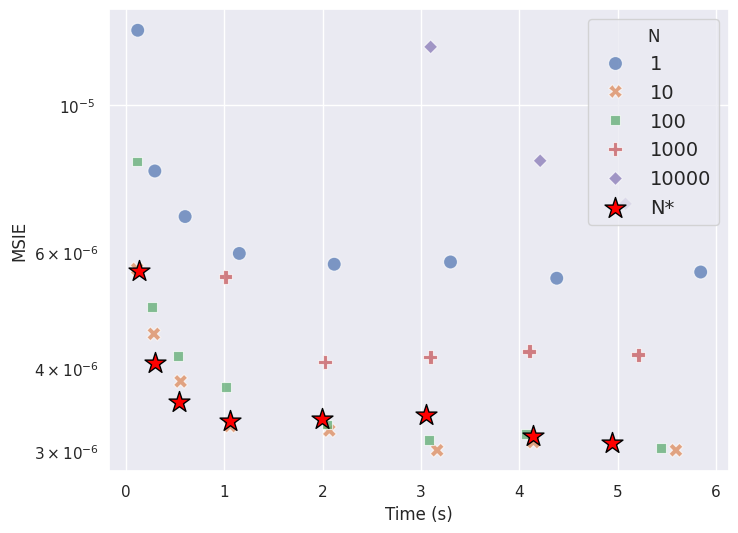

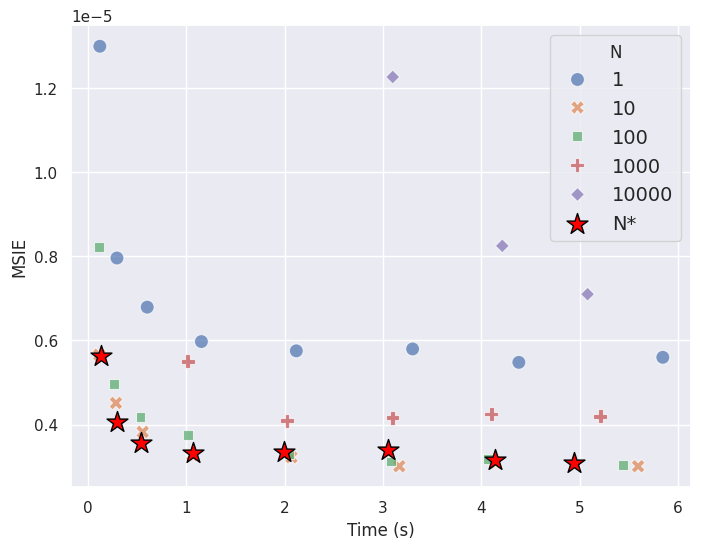

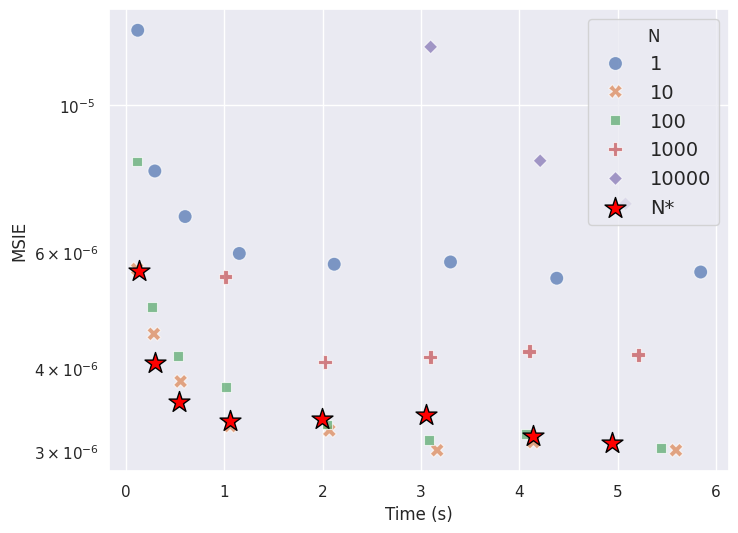

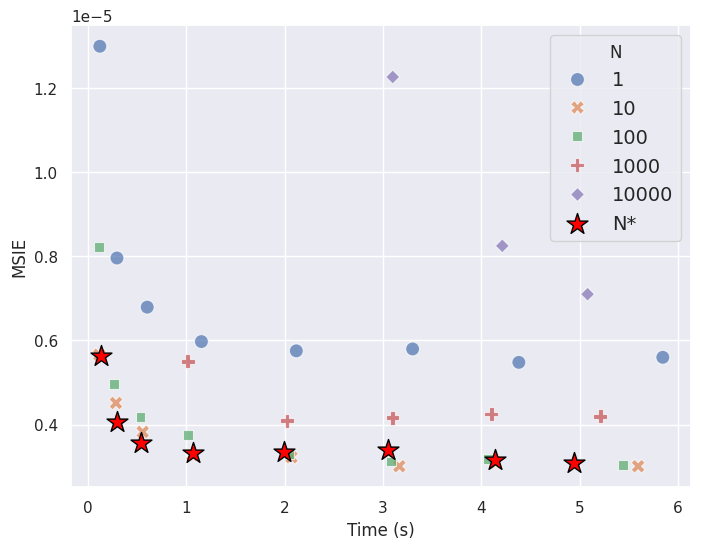

In [62]:
plot_index = 0
for threshold_value in [1e-3, 1e6]: #vary treshold
  for log_yscale in [True, False]: #vary scale
      # Select df for non-optimal
      df = df_results_average_2.copy()
      df = df[df["is_optimal"] == 0]
      df['N_cat'] = df['N'].astype(int).astype(str).astype('category')

      # Now plot:
      plt.figure(figsize=(8,6))
      sns.scatterplot(
          data=df[df["MSIE"] < threshold_value],
          x='Time',
          y='MSIE',
          style='N_cat',
          legend='full',
          hue="N_cat",
          alpha=0.7,
          s=100
      )

      plt.scatter(optimal_df['Time'], optimal_df['MSIE'],
                  marker='*', s=250, c='red',
                  edgecolors='black', linewidths=1,
                  label='N*')

      plt.legend(title='N', loc='best')
      plt.xlabel('Time (s)')
      plt.ylabel('MSIE')

      if log_yscale == True:
          plt.yscale('log')
          #plt.title('Time vs MSIE by N')
          plt.savefig(output_folder + f"Time_vs_MSIE_{4 + plot_index}.pdf", dpi=300)

      plt.show()
      plot_index += 1 #increase plot index

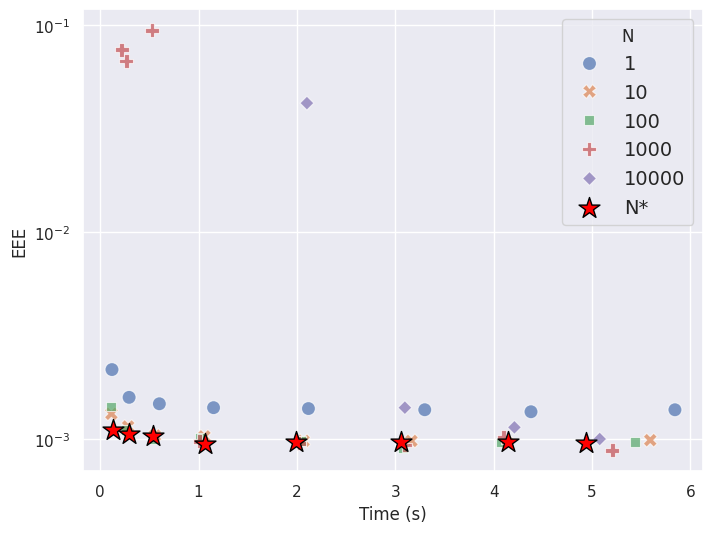

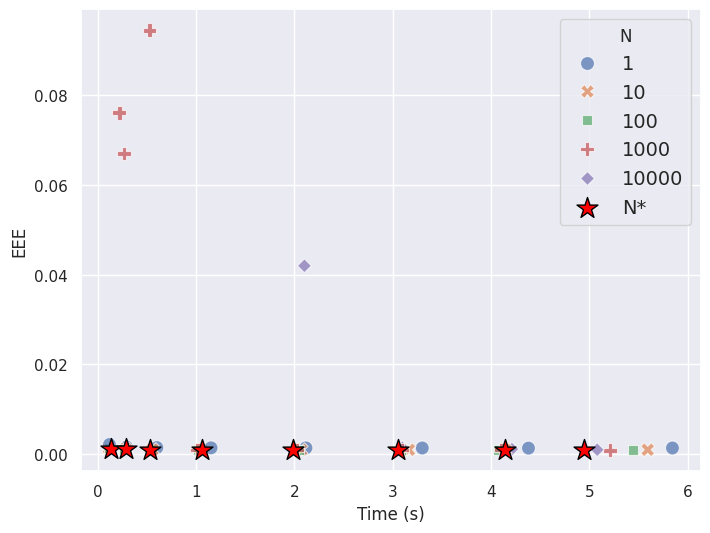

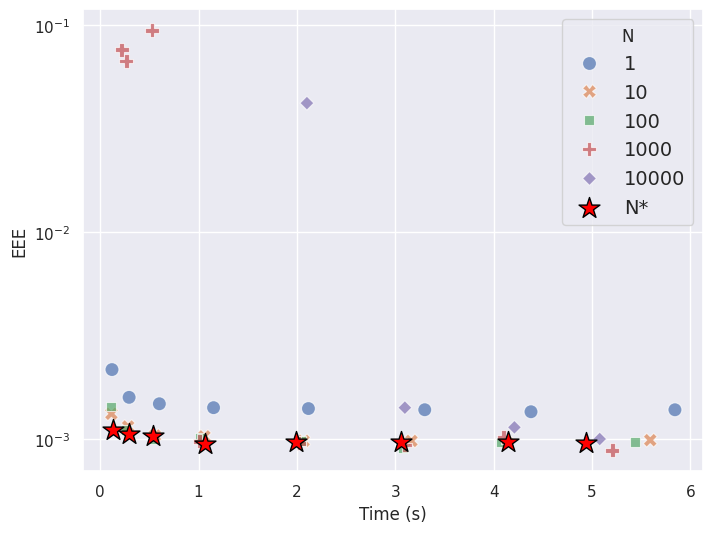

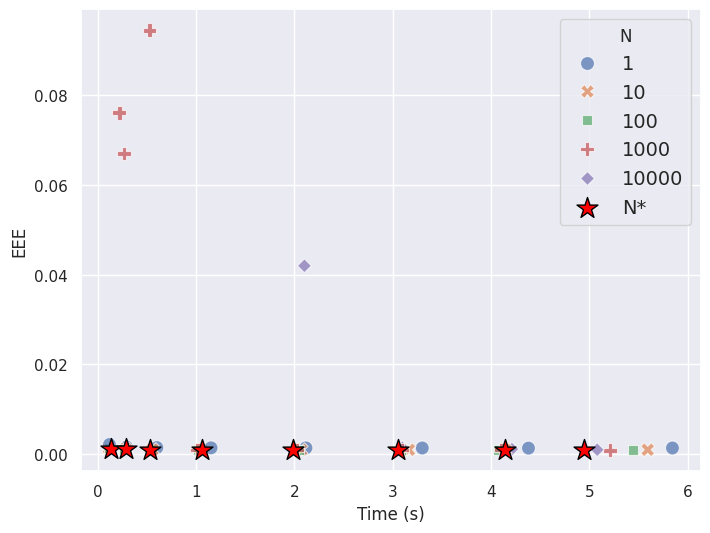

In [63]:
plot_index = 0
for threshold_value in [1e-1, 1e6]: #vary treshold
  for log_yscale in [True, False]: #vary scale
      # Select df for non-optimal
      df = df_results_average_2.copy()
      df = df[df["is_optimal"] == 0]
      df['N_cat'] = df['N'].astype(int).astype(str).astype('category')

      # Now plot:
      plt.figure(figsize=(8,6))
      sns.scatterplot(
          data=df[df["A_EEE"] < threshold_value],
          x='Time',
          y='A_EEE',
          style='N_cat',
          legend='full',
          hue="N_cat",
          alpha=0.7,
          s=100
      )

      plt.scatter(optimal_df['Time'], optimal_df['A_EEE'],
                  marker='*', s=250, c='red',
                  edgecolors='black', linewidths=1,
                  label='N*')

      plt.legend(title='N', loc='best')
      plt.xlabel('Time (s)')
      plt.ylabel('EEE')

      if log_yscale == True:
          plt.yscale('log')
          #plt.title('Time vs MSIE by N')
          plt.savefig(output_folder + f"Time_vs_A_EEE_{plot_index}.pdf", dpi=300)

      plt.show()
      plot_index += 1 #increase plot index

In [64]:
optimal_df

MN_label  repetition     k       M      N      Time       MSE      MSIE  \
7    1250-20         4.5  10.0  1250.0   20.0  0.130762  0.000125  0.000006   
12   1970-30         4.5  10.0  1970.0   30.0  0.291083  0.000083  0.000004   
19   2780-40         4.5  10.0  2780.0   40.0  0.535193  0.000066  0.000004   
21   3920-60         4.5  10.0  3920.0   60.0  1.061445  0.000043  0.000003   
30   5550-80         4.5  10.0  5550.0   80.0  1.988017  0.000034  0.000003   
33  6790-100         4.5  10.0  6790.0  100.0  3.054412  0.000028  0.000003   
38  7840-120         4.5  10.0  7840.0  120.0  4.141811  0.000023  0.000003   
39  8770-130         4.5  10.0  8770.0  130.0  4.942774  0.000021  0.000003   

       A_EEE  is_optimal     log_N     log_M     log_MN  
7   0.001109         1.0  2.995732  7.130899  10.126631  
12  0.001059         1.0  3.401197  7.585789  10.986986  
19  0.001035         1.0  3.688879  7.930206  11.619086  
21  0.000942         1.0  4.094345  8.273847  12.368191  
30  0.000971         1.0  4.382027  8.621553  13.003580  
33  0.000968         1.0  4.605170  8.823206  13.428376  
38  0.000964         1.0  4.787492  8.966994  13.754486  
39  0.000955         1.0  4.867534  9.079092  13.946627

In [65]:
df_results_average_2

MN_label  repetition     k         M        N      Time           MSE  \
0   100-10000         4.5  10.0     100.0  10000.0  4.211744  9.115434e-07   
1    105170-1         4.5  10.0  105170.0      1.0  2.117148  2.382397e-03   
2   11540-100         4.5  10.0   11540.0    100.0  5.439743  2.766020e-05   
3    1160-100         4.5  10.0    1160.0    100.0  0.532062  2.689298e-05   
4   1190-1000         4.5  10.0    1190.0   1000.0  5.208631  4.033881e-06   
5    120-1000         4.5  10.0     120.0   1000.0  0.525895  2.646071e-06   
6   120-10000         4.5  10.0     120.0  10000.0  5.079261  9.428225e-07   
7     1250-20         4.5  10.0    1250.0     20.0  0.130762  1.253073e-04   
8     13240-1         4.5  10.0   13240.0      1.0  0.293141  2.375151e-03   
9    157700-1         4.5  10.0  157700.0      1.0  3.300009  2.386011e-03   
10   17660-10         4.5  10.0   17660.0     10.0  1.058848  2.487703e-04   
11    1800-10         4.5  10.0    1800.0     10.0  0.113169  2.441483e-04   
12    1970-30         4.5  10.0    1970.0     30.0  0.291083  8.319365e-05   
13   210230-1         4.5  10.0  210230.0      1.0  4.380465  2.382284e-03   
14   2310-100         4.5  10.0    2310.0    100.0  1.016236  2.655867e-05   
15    240-100         4.5  10.0     240.0    100.0  0.112297  2.527842e-05   
16   240-1000         4.5  10.0     240.0   1000.0  1.011719  3.642792e-06   
17   262760-1         4.5  10.0  262760.0      1.0  5.844398  2.391296e-03   
18    26370-1         4.5  10.0   26370.0      1.0  0.600852  2.394074e-03   
19    2780-40         4.5  10.0    2780.0     40.0  0.535193  6.575158e-05   
20   35290-10         4.5  10.0   35290.0     10.0  2.067654  2.503078e-04   
21    3920-60         4.5  10.0    3920.0     60.0  1.061445  4.262894e-05   
22    4440-10         4.5  10.0    4440.0     10.0  0.283278  2.442106e-04   
23   4620-100         4.5  10.0    4620.0    100.0  2.046616  2.733338e-05   
24   480-1000         4.5  10.0     480.0   1000.0  2.022782  3.895328e-06   
25    50-1000         4.5  10.0      50.0   1000.0  0.218027  3.035334e-06   
26   50-10000         4.5  10.0      50.0  10000.0  2.101583  4.135746e-07   
27    52640-1         4.5  10.0   52640.0      1.0  1.152055  2.396512e-03   
28   52920-10         4.5  10.0   52920.0     10.0  3.164386  2.505604e-04   
29     5360-1         4.5  10.0    5360.0      1.0  0.119076  2.385672e-03   
30    5550-80         4.5  10.0    5550.0     80.0  1.988017  3.350336e-05   
31    580-100         4.5  10.0     580.0    100.0  0.263190  2.538851e-05   
32    60-1000         4.5  10.0      60.0   1000.0  0.265857  2.396281e-06   
33   6790-100         4.5  10.0    6790.0    100.0  3.054412  2.760819e-05   
34   6920-100         4.5  10.0    6920.0    100.0  3.079831  2.710472e-05   
35   70-10000         4.5  10.0      70.0  10000.0  3.097786  1.020023e-06   
36   70550-10         4.5  10.0   70550.0     10.0  4.143483  2.502798e-04   
37   710-1000         4.5  10.0     710.0   1000.0  3.095151  4.178349e-06   
38   7840-120         4.5  10.0    7840.0    120.0  4.141811  2.338718e-05   
39   8770-130         4.5  10.0    8770.0    130.0  4.942774  2.146176e-05   
40   88180-10         4.5  10.0   88180.0     10.0  5.592910  2.492099e-04   
41    8850-10         4.5  10.0    8850.0     10.0  0.554996  2.493854e-04   
42   9230-100         4.5  10.0    9230.0    100.0  4.069832  2.714938e-05   
43   950-1000         4.5  10.0     950.0   1000.0  4.101320  5.283840e-06   

        MSIE     A_EEE  is_optimal     log_N      log_M     log_MN  
0   0.000008  0.001139         0.0  9.210340   4.605170  13.815511  
1   0.000006  0.001403         0.0  0.000000  11.563333  11.563333  
2   0.000003  0.000965         0.0  4.605170   9.353575  13.958745  
3   0.000004  0.000997         0.0  4.605170   7.056175  11.661345  
4   0.000004  0.000882         0.0  6.907755   7.081709  13.989464  
5        inf  0.094514         0.0  6.907755   4.787492  11.695247  
6   0.00000

In [66]:
df_MN

M      N  is_optimal  target_time         se_M       se_N
0     5360      1           0         0.10     0.000000   0.000000
1     1800     10           0         0.10     0.000000   0.000000
2      240    100           0         0.10     0.000000   0.000000
3       50   1000           0         0.10     0.000000   0.000000
4       50  10000           0         0.10     0.000000   0.000000
5     1250     20           1         0.10   174.157313   5.651260
6    13240      1           0         0.25     0.000000   0.000000
7     4440     10           0         0.25     0.000000   0.000000
8      580    100           0         0.25     0.000000   0.000000
9       60   1000           0         0.25     0.000000   0.000000
10      50  10000           0         0.25     0.000000   0.000000
11    1970     30           1         0.25   243.780670   3.403229
12   26370      1           0         0.50     0.000000   0.000000
13    8850     10           0         0.50     0.000000   0.000000
14    1160    100           0         0.50     0.000000   0.000000
15     120   1000           0         0.50     0.000000   0.000000
16      50  10000           0         0.50     0.000000   0.000000
17    2780     40           1         0.50   330.908253   3.565956
18   52640      1           0         1.00     0.000000   0.000000
19   17660     10           0         1.00     0.000000   0.000000
20    2310    100           0         1.00     0.000000   0.000000
21     240   1000           0         1.00     0.000000   0.000000
22      50  10000           0         1.00     0.000000   0.000000
23    3920     60           1         1.00   457.708925   5.449474
24  105170      1           0         2.00     0.000000   0.000000
25   35290     10           0         2.00     0.000000   0.000000
26    4620    100           0         2.00     0.000000   0.000000
27     480   1000           0         2.00     0.000000   0.000000
28      50  10000           0         2.00     0.000000   0.000000
29    5550     80           1         2.00   642.072750   8.484950
30  157700      1           0         3.00     0.000000   0.000000
31   52920     10           0         3.00     0.000000   0.000000
32    6920    100           0         3.00     0.000000   0.000000
33     710   1000           0         3.00     0.000000   0.000000
34      70  10000           0         3.00     0.000000   0.000000
35    6790    100           1         3.00   783.001344  10.838781
36  210230      1           0         4.00     0.000000   0.000000
37   70550     10           0         4.00     0.000000   0.000000
38    9230    100           0         4.00     0.000000   0.000000
39     950   1000           0         4.00     0.000000   0.000000
40     100  10000           0         4.00     0.000000   0.000000
41    7840    120           1         4.00   902.682939  12.806091
42  262760      1           0         5.00     0.000000   0.000000
43   88180     10           0         5.00     0.000000   0.000000
44   11540    100           0         5.00     0.000000   0.000000
45    1190   1000           0         5.00     0.000000   0.000000
46     120  10000           0         5.00     0.000000   0.000000
47    8770    130           1         5.00  1008.890682  14.508964

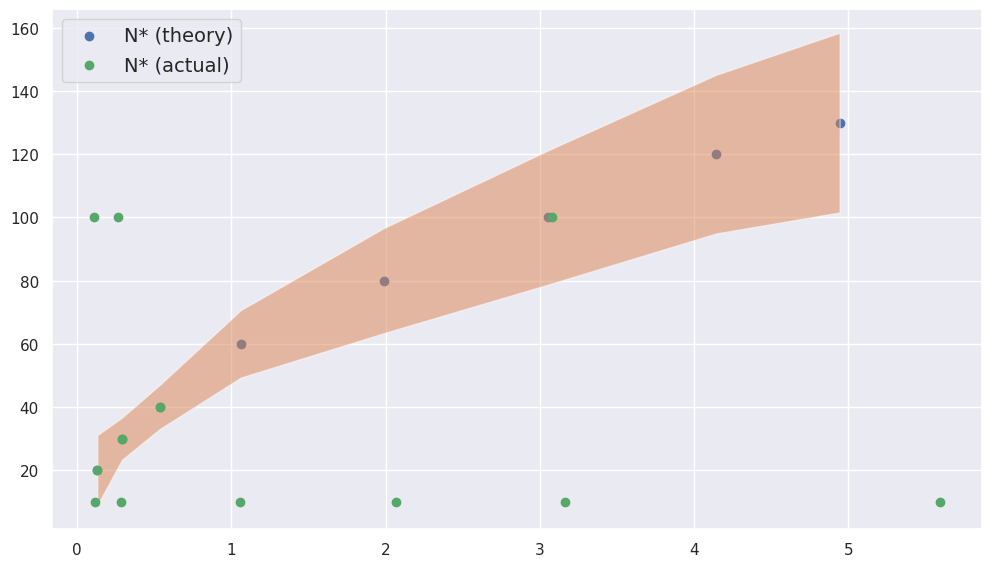

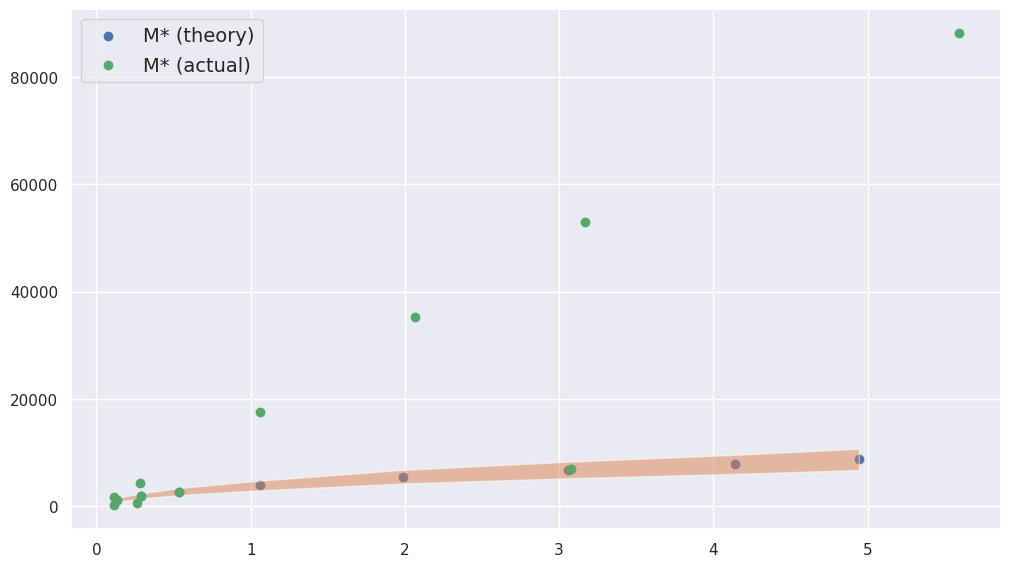

In [67]:
df_MN_sel = df_MN[df_MN["is_optimal"] == 1]
df = df_results_average_2[df_results_average_2["is_optimal"] == True].copy()
df.sort_values("Time", inplace=True)
plt.scatter(df["Time"], df["N"], label="N* (theory)")
plt.fill_between(df["Time"], df_MN_sel['N'] -1.96*df_MN_sel['se_N'], df_MN_sel['N']+ 1.96*df_MN_sel['se_N'], alpha=0.5)

plt.scatter(pareto_df["Time"], pareto_df["N"], label="N* (actual)")
plt.legend()
plt.show()

df = df_results_average_2[df_results_average_2["is_optimal"] == True].copy()
df.sort_values("Time", inplace=True)
plt.scatter(df["Time"], df["M"], label="M* (theory)")
plt.fill_between(df["Time"], df_MN_sel['M'] -1.96*df_MN_sel['se_M'], df_MN_sel['M']+ 1.96*df_MN_sel['se_M'], alpha=0.5)
plt.scatter(pareto_df["Time"], pareto_df["M"], label="M* (actual)")
plt.legend()
plt.show()

---

## Hardware details

In [68]:
!python3 --version

Python 3.11.13


In [69]:
cpuinfo.get_cpu_info()

{'python_version': '3.11.13.final.0 (64 bit)',
 'cpuinfo_version': [9, 0, 0],
 'cpuinfo_version_string': '9.0.0',
 'arch': 'X86_64',
 'bits': 64,
 'count': 8,
 'arch_string_raw': 'x86_64',
 'vendor_id_raw': 'AuthenticAMD',
 'brand_raw': 'AMD EPYC 7B12',
 'hz_advertised_friendly': '2.2500 GHz',
 'hz_actual_friendly': '2.2500 GHz',
 'hz_advertised': [2249998000, 0],
 'hz_actual': [2249998000, 0],
 'model': 49,
 'family': 23,
 'flags': ['3dnowext',
  '3dnowprefetch',
  'abm',
  'adx',
  'aes',
  'apic',
  'arat',
  'avx',
  'avx2',
  'bmi1',
  'bmi2',
  'clflush',
  'clflushopt',
  'clwb',
  'clzero',
  'cmov',
  'cmp_legacy',
  'constant_tsc',
  'cpuid',
  'cr8_legacy',
  'cx16',
  'cx8',
  'de',
  'extd_apicid',
  'f16c',
  'fma',
  'fpu',
  'fsgsbase',
  'fxsr',
  'fxsr_opt',
  'ht',
  'hypervisor',
  'ibpb',
  'ibrs',
  'lahf_lm',
  'lm',
  'mca',
  'mce',
  'misalignsse',
  'mmx',
  'mmxext',
  'movbe',
  'msr',
  'mtrr',
  'nonstop_tsc',
  'nopl',
  'npt',
  'nrip_save',
  'nx',
  '

### Saving and closing on Colab

In [70]:
# Copy to drive
if on_Colab==True:
    drive.mount('/gdrive', force_remount=True)

    zip_filename = f"{output_extension}"  # No '.zip' extension here yet (shutil adds it)
    output_zip_full_path = g_drive_path + zip_filename

    # Compress the folder into the named zip file
    shutil.make_archive(output_zip_full_path, 'zip', output_extension)

    # Unmount Drive safely
    drive.flush_and_unmount()
    print(f'Backup {zip_filename}.zip completed and saved to Google Drive at {g_drive_path}.')


Mounted at /gdrive
Backup irreversible_investment_SGD_Colab_4.zip completed and saved to Google Drive at /gdrive/My Drive/bc_MC_PEA/7.irreversible_investment_SGD/.


In [71]:
disconnect_when_done = False

if on_Colab==True:
    # Wait 2 minutes
    time.sleep(120)

    ## Close session
    from google.colab import runtime
    if disconnect_when_done==True:
      print("Closing runtime")
      runtime.unassign()

---

## References


*  